# Individual Plots from the ROOT files

In [1]:
%reset -f
import ROOT, numpy
import traceback
from datetime import datetime
from array import array  # Correct import for the array

from MyCommonAnalysisFunction_richcap import *

import math
import array
import copy

ROOT.TH1.AddDirectory(0)
ROOT.gStyle.SetTitleOffset(1.3,'y')

ROOT.gStyle.SetGridColor(17)
ROOT.gStyle.SetPadGridX(1)
ROOT.gStyle.SetPadGridY(1)

print(color.BOLD, "\nStarting RG-A SIDIS Analysis\n", color.END)


# getting current date
datetime_object_full = datetime.now()
# print(datetime_object)

startMin_full = datetime_object_full.minute
startHr_full = datetime_object_full.hour

if(datetime_object_full.minute <10):
    timeMin_full = "".join(["0", str(datetime_object_full.minute)])
else:
    timeMin_full = str(datetime_object_full.minute)

    
Date_Day = "".join(["\nStarted running on ", color.BOLD, str(datetime_object_full.month), "-", str(datetime_object_full.day), "-", str(datetime_object_full.year), color.END, " at "])
# printing current time
if(datetime_object_full.hour > 12 and datetime_object_full.hour < 24):
    print("".join([Date_Day, color.BOLD, str((datetime_object_full.hour)-12), ":", timeMin_full, " p.m.", color.END]))
if(datetime_object_full.hour < 12 and datetime_object_full.hour > 0):
    print("".join([Date_Day, color.BOLD, str(datetime_object_full.hour), ":", timeMin_full, " a.m.", color.END]))
if(datetime_object_full.hour == 12):
    print("".join([Date_Day, color.BOLD, str(datetime_object_full.hour), ":", timeMin_full, " p.m.", color.END]))
if(datetime_object_full.hour == 0 or datetime_object_full.hour == 24):
    print("".join([Date_Day, color.BOLD, "12:", str(timeMin_full), " a.m.", color.END]))
print("")

Welcome to JupyROOT 6.22/06
 
Starting RG-A SIDIS Analysis
 

Started running on 6-20-2024 at 12:58 a.m.



.

.

.

## Load RDataFrames

In [2]:
def FileLocation(FileName, Datatype):
    # location = "/lustre19/expphy/volatile/clas12/richcap/SIDIS_Analysis/Histo_Files_ROOT/"
    location = "Histo_Files_ROOT/"
    if(str(Datatype) == 'rdf'):
        file = "".join(["REAL_Data/SIDIS_epip_Data_REC_", str(FileName), ".root"])
    if(str(Datatype) == 'mdf'):
        file = "".join(["Matching_REC_MC/SIDIS_epip_MC_Matched_", str(FileName), ".root"])
    if(str(Datatype) == 'gdf'):
        file = "".join(["GEN_MC/SIDIS_epip_MC_GEN_", str(FileName), ".root"])
    loading = "".join([location, file])
    return loading





################################################################################################################################################################
##==========##==========##     Names of Requested File(s)     ##==========##==========##==========##==========##==========##==========##==========##==========##
################################################################################################################################################################

Smearing_Options = "no_smear"

Common_Name = "Pass_2_5D_Unfold_Test_V7_All"
# Common_Name = "5D_Unfold_Test_V7_All"

Common_Name = "Pass_2_New_Sector_Cut_Test_V3_All"

Common_Name = "Pass_2_New_Sector_Cut_Test_V10_All"

Standard_Histogram_Title_Addition = ""

Pass_Version = "Pass 2" if("Pass_2" in Common_Name) else "Pass 1"
if(Pass_Version not in [""]):
    if(Standard_Histogram_Title_Addition not in [""]):
        Standard_Histogram_Title_Addition = f"{Pass_Version} - {Standard_Histogram_Title_Addition}"
    else:
        Standard_Histogram_Title_Addition = Pass_Version


print(f"{color.BBLUE}\nRunning with {Pass_Version} files\n\n{color.END}")
        
        
# Use unique file(s) for one of datatypes? (If so, set the following if(...) conditions to 'False')

##################################
##   Real (Experimental) Data   ##
##################################
if(True):
#     print("".join([color.BOLD, "\nNot using the common file name for the Real (Experimental) Data...\n", color.END]))
# if(False):
    REAL_File_Name = Common_Name
    REAL_File_Name = REAL_File_Name.replace("_V9_All", "_V10_5311")
else:
    REAL_File_Name = "Pass_2_5D_Unfold_Test_V7_All" if(Pass_Version in ["Pass 2"]) else "5D_Unfold_Test_V7_All"
##################################
##   Real (Experimental) Data   ##
##################################

########################################
##   Reconstructed Monte Carlo Data   ##
########################################
if(True):
    print("".join([color.BOLD, "\nNot using the common file name for the Reconstructed Monte Carlo Data...\n", color.END]))
if(False):
    MC_REC_File_Name = Common_Name
else:
    MC_REC_File_Name = "Unsmeared_Pass_2_5D_Unfold_Test_V7_All"      if(Smearing_Options in ["no_smear"]) else "Pass_2_5D_Unfold_Test_V7_All"
    MC_REC_File_Name = "Unsmeared_Pass_2_New_Sector_Cut_Test_V1_All" if(Smearing_Options in ["no_smear"]) else "Pass_2_New_Sector_Cut_Test_V1_All"
    MC_REC_File_Name = "Unsmeared_Pass_2_New_Sector_Cut_Test_V3_All" if(Smearing_Options in ["no_smear"]) else "Pass_2_New_Sector_Cut_Test_V3_All"
    MC_REC_File_Name = f"Unsmeared_{Common_Name}" if(Smearing_Options in ["no_smear"]) else Common_Name
#     MC_REC_File_Name = MC_REC_File_Name.replace("_V9_All", "_V10_20")
    MC_REC_File_Name = MC_REC_File_Name.replace("_V9_All", "_V10_All")
    if(Pass_Version not in ["Pass 2"]):
        MC_REC_File_Name = MC_REC_File_Name.replace("Pass_2_", "")
########################################
##   Reconstructed Monte Carlo Data   ##
########################################

####################################
##   Generated Monte Carlo Data   ##
####################################
if(True):
    print("".join([color.BOLD, "\nNot using the common file name for the Generated Monte Carlo Data...\n", color.END]))
if(False):
    MC_GEN_File_Name = Common_Name
else:
    MC_GEN_File_Name = "Pass_2_New_Sector_Cut_Test_V9_All"
####################################
##   Generated Monte Carlo Data   ##
####################################


################################################################################################################################################################
##==========##==========##     Names of Requested File(s)     ##==========##==========##==========##==========##==========##==========##==========##==========##
################################################################################################################################################################





################################################################################################################################################################
##==========##==========##     Loading Requested File(s)     ##==========##==========##==========##==========##==========##==========##==========##==========##
################################################################################################################################################################
try:
    rdf = ROOT.TFile(str(FileLocation(str(REAL_File_Name), "rdf")), "READ")
    print("".join(["The total number of histograms available for the", color.BLUE,  " Real (Experimental) Data",       color.END, " in       '", color.BOLD, REAL_File_Name,   color.END, "' is ", color.BOLD, str(len(rdf.GetListOfKeys())), color.END]))
except:
    print("".join([color.Error, "\nERROR IN GETTING THE 'rdf' DATAFRAME...\nTraceback:\n", color.END_R, str(traceback.format_exc()), color.END]))
try:
    mdf = ROOT.TFile(str(FileLocation(str(MC_REC_File_Name), "mdf")), "READ")
    print("".join(["The total number of histograms available for the", color.RED,   " Reconstructed Monte Carlo Data", color.END, " in '",       color.BOLD, MC_REC_File_Name, color.END, "' is ", color.BOLD, str(len(mdf.GetListOfKeys())), color.END]))
except:
    print("".join([color.Error, "\nERROR IN GETTING THE 'mdf' DATAFRAME...\nTraceback:\n", color.END_R, str(traceback.format_exc()), color.END]))
try:
    gdf = ROOT.TFile(str(FileLocation(str(MC_GEN_File_Name), "gdf")), "READ")
    print("".join(["The total number of histograms available for the", color.GREEN, " Generated Monte Carlo Data",     color.END, " in     '",   color.BOLD, MC_GEN_File_Name, color.END, "' is ", color.BOLD, str(len(gdf.GetListOfKeys())), color.END]))
except:
    print("".join([color.Error, "\nERROR IN GETTING THE 'gdf' DATAFRAME...\nTraceback:\n", color.END_R, str(traceback.format_exc()), color.END]))
################################################################################################################################################################
##==========##==========##     Loading Requested File(s)     ##==========##==========##==========##==========##==========##==========##==========##==========##
################################################################################################################################################################


print(f"{color.BOLD}\nPass Version in use is:{color.END}{color.BLUE} {Pass_Version}{color.END_B}\n\n\nDone Loading RDataFrame files...\n\n{color.END}")


Running with Pass 2 files



Not using the common file name for the Reconstructed Monte Carlo Data...


Not using the common file name for the Generated Monte Carlo Data...

The total number of histograms available for the Real (Experimental) Data in       'Pass_2_New_Sector_Cut_Test_V10_All' is 690
The total number of histograms available for the Reconstructed Monte Carlo Data in 'Unsmeared_Pass_2_New_Sector_Cut_Test_V10_All' is 1596
The total number of histograms available for the Generated Monte Carlo Data in     'Pass_2_New_Sector_Cut_Test_V9_All' is 416

Pass Version in use is: Pass 2


Done Loading RDataFrame files...




.

.

.

### Find Histogram from within the RDataFrame(s)

In [3]:
# for mdf_name in mdf.GetListOfKeys():
# #     if("(Var-D1='Hx'" in str(mdf_name.GetName())):
# #     if("pipsec" in str(mdf_name.GetName())):
# #         print(mdf_name.GetName() + "\n")
# #     if("Normal_2D" in str(mdf_name.GetName())):
#     if("PID" in str(mdf_name.GetName())):
#         print(mdf_name.GetName() + "\n")
# #     print(mdf_name)
# #     print(mdf_name.GetName() + "\n")
        
        
# print("Done")

In [4]:
# try:
#     Run_REAL_Search = False
# #     Run_REAL_Search = True

#     Run_MC_REC_Search = False
#     Run_MC_REC_Search = not True

#     Run_MC_GEN_Search = False
# #     Run_MC_GEN_Search = True
    
#     def Search_Condition_Common(name="name"):
#         # if((str(name).find("Title: #splitline{")) != -1):
#         #     name = str(name).replace(str(name).replace(str(name)[:(str(name).find("Title: #splitline{"))], ""), "")
#         name = name.GetName()
        
#         out_list = [True]
        
#         out_list.append("Var-D1='elth'" in str(name))
#         out_list.append("Var-D2='el'"   in str(name))
#         out_list.append("no_cut"    not in str(name))
        
# #         out_list.append("Var-D1='Q2'" in str(name))
# #         out_list.append("Background" in str(name))
# #         out_list.append("Multi"      in str(name))
# # #         out_list.append("Combine"    in str(name))
# #         out_list.append("no_cut" not in str(name))
# #         out_list.append("2D"         in str(name))
# # #         out_list.append("'xB'"     in str(name))
# #         out_list.append("'y_smeared'"         in str(name))
# #         out_list.append("Q2-y-Bin=5" in str(name))
# #         out_list.append("smear"      in str(name))

# #         out_list.append("Q2-y-Bin=17" in str(name))
# #         out_list.append("phi_t" in str(name))
# #         out_list.append("pipsec" in str(name))
# #         out_list.append("'el'" in str(name))

# #         out_list.append("2D" not in str(name))
# #         out_list.append("Multi_Dim_Q2_phi_t" in str(name))
# #         out_list.append("Multi_Dim_" in str(name))
# #         out_list.append("4D" in str(name))
# #         out_list.append("Multi_Dim_Q2_phi_t" in str(name))

# #         out_list.append("no_cut" not in str(name))
# # #         out_list.append("Multi_Dim_z_pT_Bin_y_bin_phi_t" in str(name))
# #         out_list.append("Multi_Dim_" in str(name))
# #         out_list.append("Gen_MM_Cut" not in str(name))
        
# #         out_list.append("Multi_Dim_z_pT_Bin_y_bin_phi_t" not in str(name))
# #         out_list.append("Multi_Dim_Q2_y_Bin_phi_t"       not in str(name))
    
# #         out_list.append("Q2-y-Bin=All"             in str(name))
# #         out_list.append("'Response_Matrix_Normal'" in str(name))
        
#         out = False not in out_list
# #         out = True
# #         out = ("Gen_MM_Cut" not in str(name)) and ("2D" not in str(name))
# #         out = ("2D" not in str(name))
# #         if(out):
# #             print("out_list =", out_list, "\nout =", out)
# #             print("name =", name, "\n")
#         return out

#     if(True in [Run_REAL_Search, Run_MC_REC_Search, Run_MC_GEN_Search]):
#         if(Run_REAL_Search):
#             print("".join([color.BOLD, """

# --------------------------------------------------------------------------------------------------------------------------------------------------------
#         Checking the Real (Experimental) Data files:
#         """, color.END]))
#             REAL_Search_Count = 0
#             REAL_Search_Condition = True
#             for rdf_name in rdf.GetListOfKeys():
#                 # REAL_Search_Condition = ("Response" in str(rdf_name) and "phi" in str(rdf_name) and "1D" in str(rdf_name))
# #                 REAL_Search_Condition = ("Normal_2D" in str(rdf_name) and "cut_Complete_SIDIS" in str(rdf_name))
#                 # REAL_Search_Condition = ("Normal_2D" not in str(rdf_name) and "cut_Complete_EDIS" in str(rdf_name))
# #                 REAL_Search_Condition = ("Response_Matrix" in str(rdf_name))
#                 if(REAL_Search_Condition and Search_Condition_Common(name=rdf_name)):
#                     REAL_Search_Count += 1
# #                     print("".join(["\n   Histo ", str(REAL_Search_Count), ")\t", color.BLUE, str(rdf_name.GetName()), "\n\t-----   object type: ", str(type(rdf.Get(rdf_name.GetName()))), color.END]))
#                     # print("".join(["\n   Histo ", str(REAL_Search_Count), ")\t", color.BLUE, str(rdf_name.GetName()), "\n\t-----   object type: ", str((rdf.Get(rdf_name.GetName()))), color.END]))
# #                     print("".join(["\n   Histo ", str(REAL_Search_Count), ")\t", color.BLUE, str(rdf_name.GetName()), color.END]))
#                     print("".join(["\n   Histo ", str(REAL_Search_Count), ")\t", color.BLUE, str(rdf_name.GetName()), color.END, color.BOLD, "\n\t-----   object type: ", color.BLUE, str(type(rdf.Get(rdf_name.GetName()))), color.END]))
#             print("".join([color.BOLD, """
#         TOTAL REAL = """, str(REAL_Search_Count), """
#         Done checking the Real (Experimental) Data files
# --------------------------------------------------------------------------------------------------------------------------------------------------------

#         """, color.END]))
#         else:
#             print("Not Checking the Real (Experimental) Data files...")

#         if(Run_MC_REC_Search):
#             print("".join([color.BOLD, """

# --------------------------------------------------------------------------------------------------------------------------------------------------------
#         Checking the Reconstructed Monte Carlo Data files:
#         """, color.END]))
#             MC_REC_Search_Count = 0
#             for mdf_name in mdf.GetListOfKeys():
#                 MC_REC_Search_Condition = True
# #                 MC_REC_Search_Condition = ("Normal_2D" in str(mdf_name) and "cut_Complete_SIDIS" in str(mdf_name))
# #                 MC_REC_Search_Condition = ("(Smear-Type='')" in str(mdf_name) and "[Q2-y-Bin=All" in str(mdf_name) and "cut_Complete_SIDIS" in str(mdf_name))
# #                 MC_REC_Search_Condition = ("Response_Matrix_Normal" in str(mdf_name) and "cut_Complete_SIDIS" in str(mdf_name) and "'xB'" in str(mdf_name))
# #                 MC_REC_Search_Condition = ("Response_Matrix_Normal" in str(mdf_name) and "Combined_phi_t_Q2" in str(mdf_name))
#                 # MC_REC_Search_Condition = ("Mom_Cor_Code" in str(mdf_name))# and "phi_t" in str(mdf_name) and "no_cut" in str(mdf_name))
#                 if(MC_REC_Search_Condition and Search_Condition_Common(name=mdf_name)):
#                     MC_REC_Search_Count += 1
#                     # print("".join(["\n   Histo ", str(MC_REC_Search_Count), ")\t", color.RED, str(mdf_name.GetName()), "   -----   object type: ", str(type(mdf.Get(mdf_name.GetName()))), color.END]))
#                     # print("".join(["\n   Histo ", str(MC_REC_Search_Count), ")\t", color.RED, str(mdf_name.GetName()), color.END]))
#                     print("".join(["\n   Histo ", str(MC_REC_Search_Count), ")\n\t", color.RED, str(mdf_name.GetName()), color.END, color.BOLD, "\n\t object type: ", color.RED, str(type(mdf.Get(mdf_name.GetName()))), color.END]))
#                     print("mdf_name.GetTitle() =", mdf_name.GetTitle())
# #                     print("".join(["\n   Histo ", str(MC_REC_Search_Count), ")\n\t", color.RED, str(mdf_name.GetName()), color.END]))
#             print("".join([color.BOLD, """
#         TOTAL MC REC = """, str(MC_REC_Search_Count), """
#         Done checking the Reconstructed Monte Carlo Data files
# --------------------------------------------------------------------------------------------------------------------------------------------------------

#         """, color.END]))
#         else:
#             print("Not Checking the Reconstructed Monte Carlo Data files...")

#         if(Run_MC_GEN_Search):
#             print("".join([color.BOLD, """

# --------------------------------------------------------------------------------------------------------------------------------------------------------
#         Checking the Generated Monte Carlo Data files:
#         """, color.END]))
#             MC_GEN_Search_Count = 0
#             MC_GEN_Search_Condition = True
#             for gdf_name in gdf.GetListOfKeys():
#                 # MC_GEN_Search_Condition = ("Response" in str(gdf_name) and "phi" in str(gdf_name) and "1D" in str(gdf_name))
#                 if(MC_GEN_Search_Condition and Search_Condition_Common(name=gdf_name)):
#                     MC_GEN_Search_Count += 1
#                     # print("".join(["\n   Histo ", str(MC_GEN_Search_Count), ")\t", color.GREEN, str(gdf_name.GetName()), "   -----   object type: ", str(type(gdf.Get(gdf_name.GetName()))), color.END]))
#                     print("".join(["\n   Histo ", str(MC_GEN_Search_Count), ")\t", color.GREEN, str(gdf_name.GetName()), color.END]))
# #                     print("".join(["\n   Histo ", str(MC_GEN_Search_Count), ")\t", color.GREEN, str(gdf_name.GetName()), "".join(["\n\t-----   object type: ", str((gdf.Get(gdf_name.GetName())))]) if("0x(nil)" in str((gdf.Get(str(gdf_name.GetName()))))) else "\n\tGOOD", color.END]))
#             print("".join([color.BOLD, """
#         TOTAL MC GEN = """, str(MC_GEN_Search_Count), """
#         Done checking the Generated Monte Carlo Data files
# --------------------------------------------------------------------------------------------------------------------------------------------------------

#         """, color.END]))
#         else:
#             print("Not Checking the Generated Monte Carlo Data files...")

#     else:
#         print("Not checking any of the data files...")

#     print("\nDONE CHECKING FILES\n")
# except:
#     print("".join([color.RED, color.BOLD, "ERROR CHECKING FILES\nTraceback:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))

.

.

.

## Creating Sector Contribution Plots

Histo_rdf_Title = #splitline{#splitline{Experimental Data #phi_{h}}{#splitline{Q^{2}-y Bin: 3 #topbar z-P_{T} Bin: 22 #topbar #pi^{+} Pion Sector All}{Pass Version: #color[4]{Pass 2}}}}{}
Standard_Histogram_Title_Addition = Pass 2
Done


Warning in <TCanvas::Constructor>: Deleting canvas with same name: Name


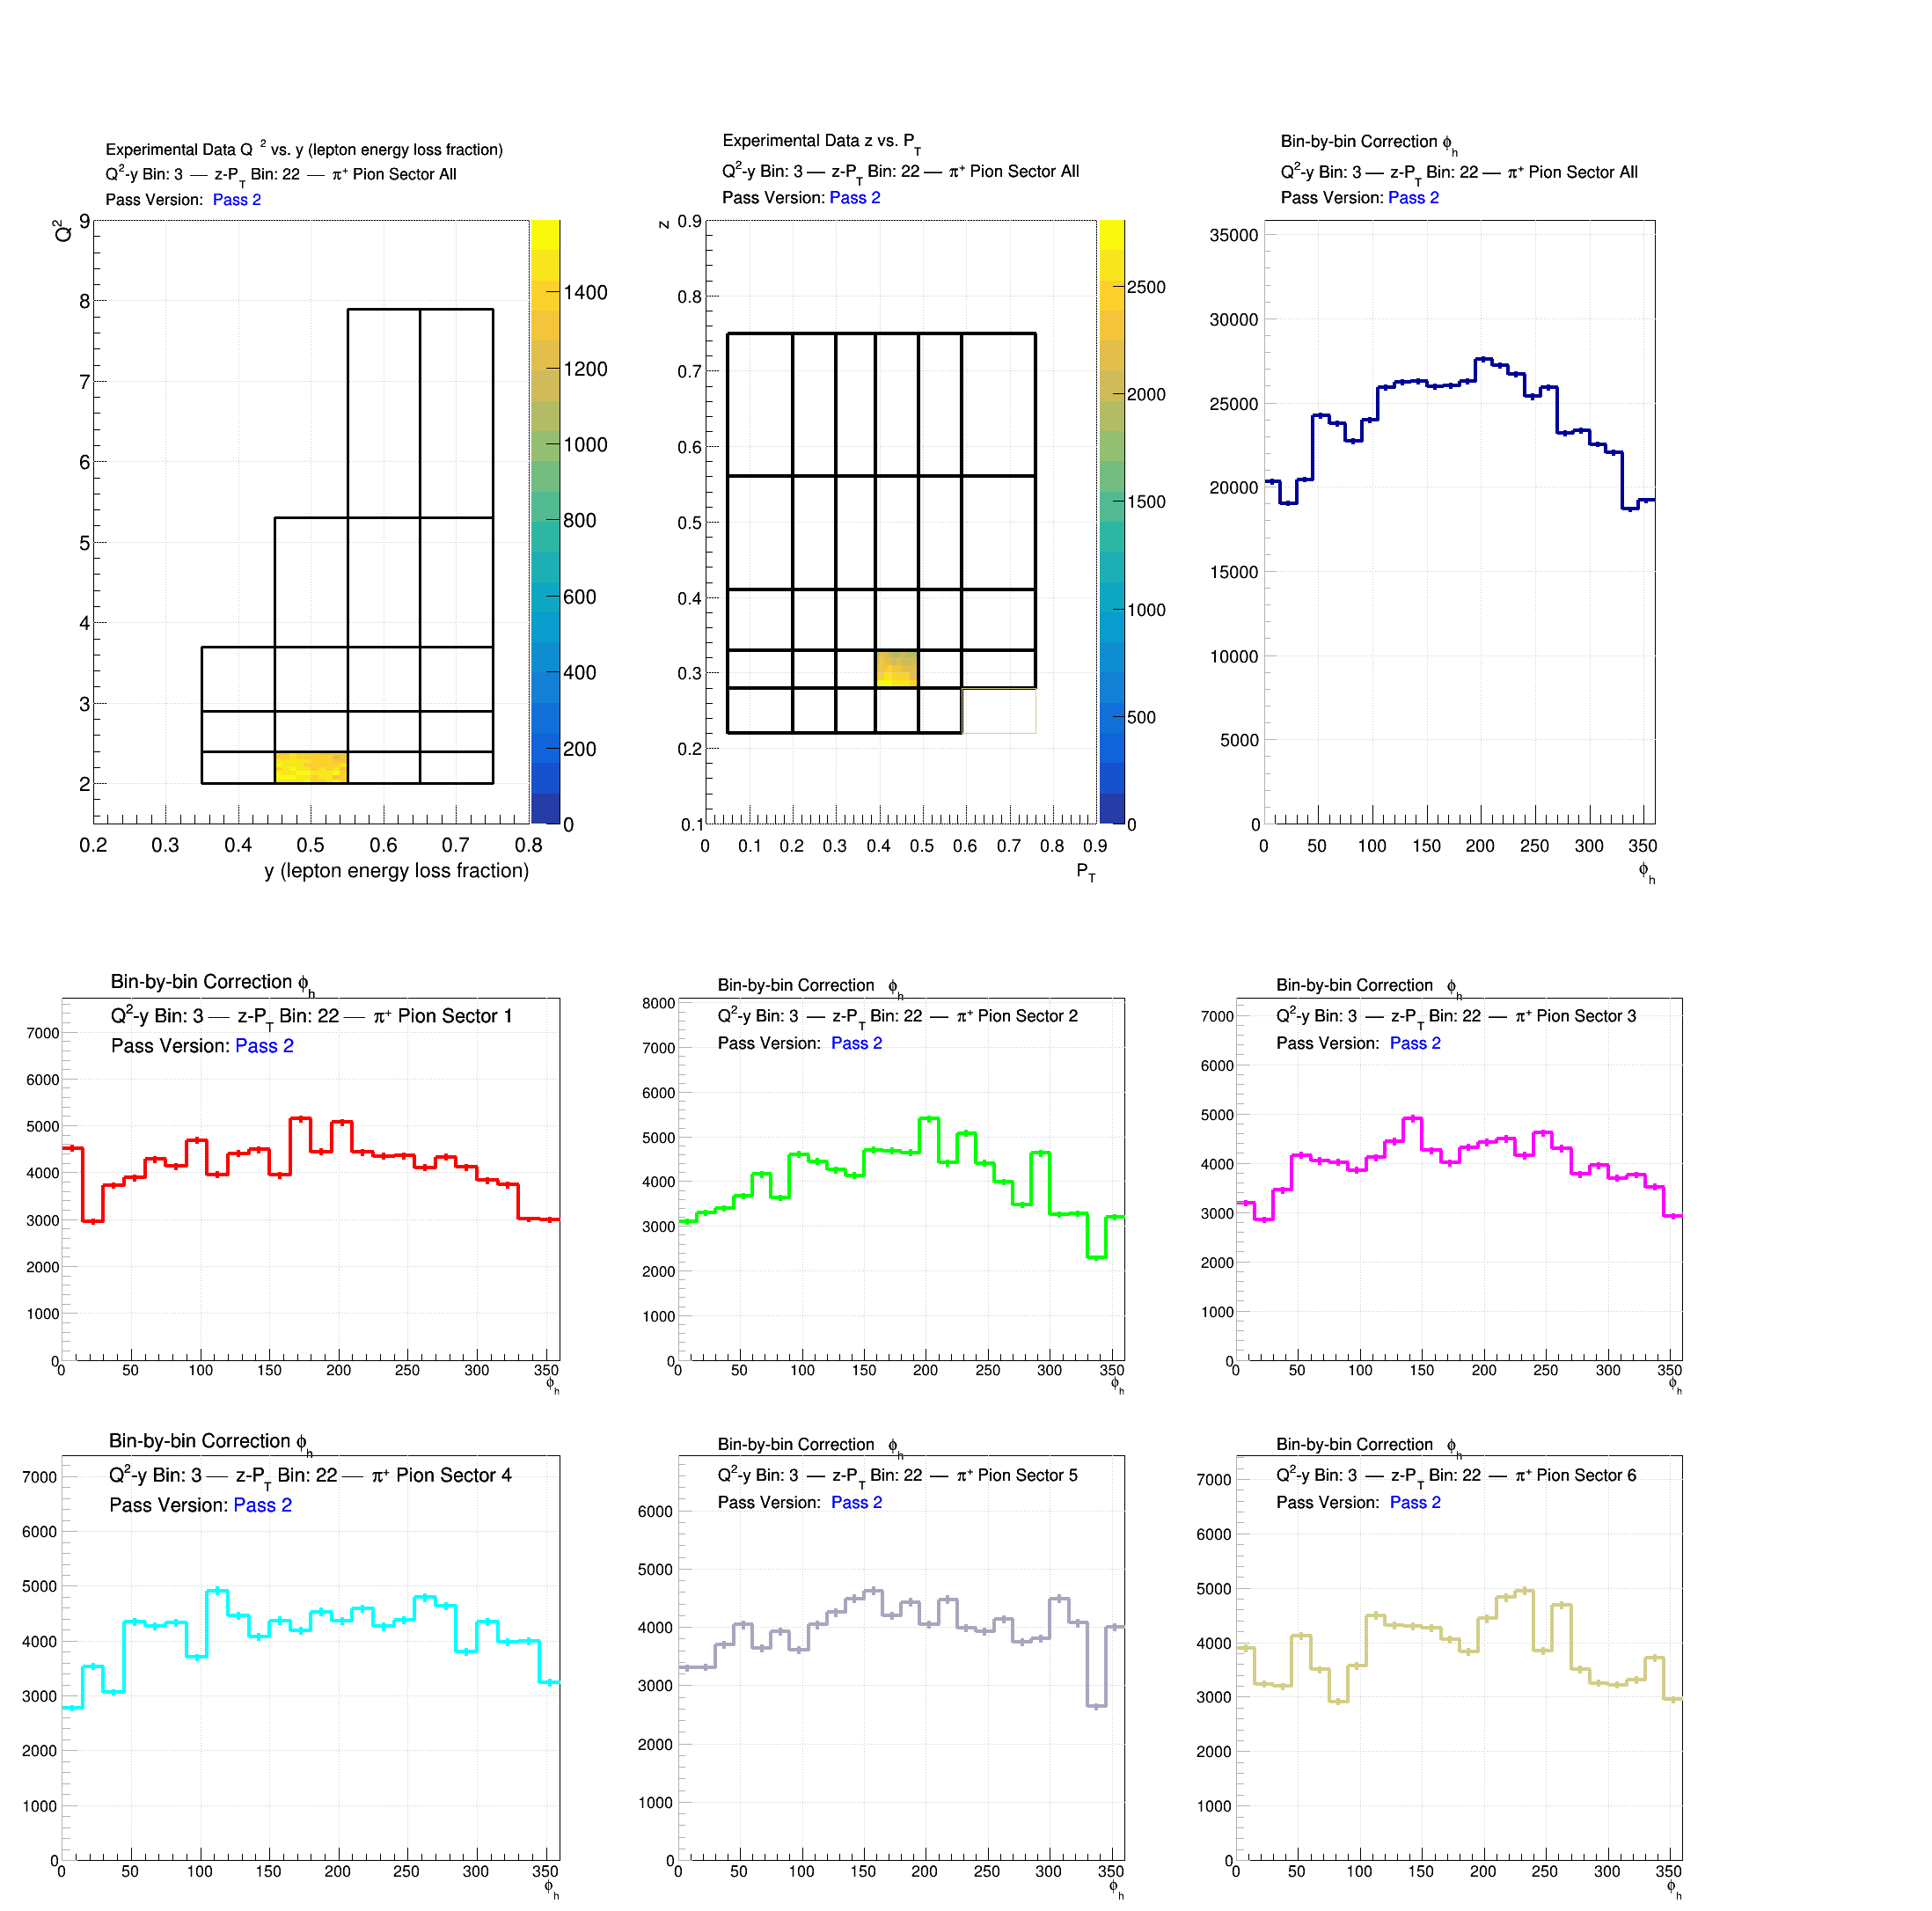

In [9]:
cut = "cut_Complete_SIDIS_eS6o"
cut = "cut_Complete_SIDIS"

Q2_y_Bin = "All"
Q2_y_Bin = "3"
Histo_Name_mdf = f"((Histo-Group='Normal_2D'), (Data-Type='mdf'), (Data-Cut='{cut}'), (Smear-Type=''), (Binning-Type='Y_bin'-[Q2-y-Bin={Q2_y_Bin}, z-PT-Bin=All]), (Var-D1='pipsec'-[NumBins=8, MinBin=-0.5, MaxBin=7.5]), (Var-D2='phi_t'-[NumBins=24, MinBin=0, MaxBin=360]))"
Histo_Name_rdf = str(Histo_Name_mdf.replace("mdf", "rdf"))
Histo_Name_gdf = str(Histo_Name_mdf.replace("mdf", "gdf")).replace(f"{cut}", "no_cut")
Histo_Name_bdf = str(Histo_Name_mdf.replace("Normal_2D", "Normal_Background_2D"))

Histo_Name_Q2_y_mdf = f"((Histo-Group='Normal_2D'), (Data-Type='mdf'), (Data-Cut='{cut}'), (Smear-Type=''), (Binning-Type='Y_bin'-[Q2-y-Bin={Q2_y_Bin}, z-PT-Bin=All]), (Var-D1='Q2'-[NumBins=280, MinBin=0, MaxBin=14]), (Var-D2='y'-[NumBins=100, MinBin=0, MaxBin=1]))"
Histo_Name_Q2_y_rdf = str(Histo_Name_Q2_y_mdf.replace("mdf", "rdf"))
Histo_Name_Q2_y_gdf = str(Histo_Name_Q2_y_mdf.replace("mdf", "gdf")).replace(f"{cut}", "no_cut")
Histo_Name_Q2_y_bdf = str(Histo_Name_Q2_y_mdf.replace("Normal_2D", "Normal_Background_2D"))

Histo_Name_z_pT_mdf = f"((Histo-Group='Normal_2D'), (Data-Type='mdf'), (Data-Cut='{cut}'), (Smear-Type=''), (Binning-Type='Y_bin'-[Q2-y-Bin={Q2_y_Bin}, z-PT-Bin=All]), (Var-D1='z'-[NumBins=120, MinBin=0, MaxBin=1.2]), (Var-D2='pT'-[NumBins=200, MinBin=0, MaxBin=2.0]))"
Histo_Name_z_pT_rdf = str(Histo_Name_z_pT_mdf.replace("mdf", "rdf"))
Histo_Name_z_pT_gdf = str(Histo_Name_z_pT_mdf.replace("mdf", "gdf")).replace(f"{cut}", "no_cut")
Histo_Name_z_pT_bdf = str(Histo_Name_z_pT_mdf.replace("Normal_2D", "Normal_Background_2D"))

Histo_mdf_3D      = mdf.Get(str(Histo_Name_mdf))
Histo_bdf_3D      = mdf.Get(str(Histo_Name_bdf))
Histo_rdf_3D      = rdf.Get(str(Histo_Name_rdf))
Histo_gdf_3D      = gdf.Get(str(Histo_Name_gdf))

Histo_mdf_Q2_y_3D = mdf.Get(str(Histo_Name_Q2_y_mdf))
Histo_bdf_Q2_y_3D = mdf.Get(str(Histo_Name_Q2_y_bdf))
Histo_rdf_Q2_y_3D = rdf.Get(str(Histo_Name_Q2_y_rdf))
Histo_gdf_Q2_y_3D = gdf.Get(str(Histo_Name_Q2_y_gdf))

Histo_mdf_z_pT_3D = mdf.Get(str(Histo_Name_z_pT_mdf))
Histo_bdf_z_pT_3D = mdf.Get(str(Histo_Name_z_pT_bdf))
Histo_rdf_z_pT_3D = rdf.Get(str(Histo_Name_z_pT_rdf))
Histo_gdf_z_pT_3D = gdf.Get(str(Histo_Name_z_pT_gdf))


Histo_mdf_Title_OG = str(Histo_mdf_3D.GetTitle()).replace("#pi^{+} Sector vs. ", "")
Histo_rdf_Title_OG = str(Histo_rdf_3D.GetTitle()).replace("#pi^{+} Sector vs. ", "")
Histo_gdf_Title_OG = str(Histo_gdf_3D.GetTitle()).replace("#pi^{+} Sector vs. ", "")
Histo_bdf_Title_OG = str(Histo_bdf_3D.GetTitle()).replace("#pi^{+} Sector vs. ", "")


Histo_mdf_Q2_y_Title = str(Histo_mdf_Q2_y_3D.GetTitle())
Histo_bdf_Q2_y_Title = str(Histo_bdf_Q2_y_3D.GetTitle())
Histo_rdf_Q2_y_Title = str(Histo_rdf_Q2_y_3D.GetTitle())
Histo_gdf_Q2_y_Title = str(Histo_gdf_Q2_y_3D.GetTitle())

Histo_mdf_z_pT_Title = str(Histo_mdf_z_pT_3D.GetTitle())
Histo_bdf_z_pT_Title = str(Histo_bdf_z_pT_3D.GetTitle())
Histo_rdf_z_pT_Title = str(Histo_rdf_z_pT_3D.GetTitle())
Histo_gdf_z_pT_Title = str(Histo_gdf_z_pT_3D.GetTitle())


z_pT_Bin_Unfold = 22
# z_pT_Bin_Unfold = "All"
Particle_Sector = "#pi^{+} Pion Sector"
Sector = "All"
if(Sector not in ["All", 0]):
    New_Bin_Title = "".join(["".join(["}{#splitline{Q^{2}-y Bin: ", str(Q2_y_Bin), "".join([" #topbar z-P_{T} Bin: ", str(z_pT_Bin_Unfold)]) if(z_pT_Bin_Unfold not in [0]) else "", f" #topbar {Particle_Sector} {Sector}"]) if(str(Q2_y_Bin) not in ["All", "0", 0]) else "".join(["}{#splitline{", Particle_Sector, " ", str(Sector)]),  "}{Pass Version: #color[", str(root_color.Blue), "]{", str(Standard_Histogram_Title_Addition), "}}"])
else:
    New_Bin_Title = "".join(["".join(["}{#splitline{Q^{2}-y Bin: ", str(Q2_y_Bin), "".join([" #topbar z-P_{T} Bin: ", str(z_pT_Bin_Unfold)]) if(z_pT_Bin_Unfold not in [0]) else ""]) if(str(Q2_y_Bin) not in ["All", "0", 0]) else "".join(["}{Pass Version: #color[", str(root_color.Blue), "]{", str(Standard_Histogram_Title_Addition), "}"])])
    
New_Bin_Title = "".join(["".join(["}{#splitline{Q^{2}-y Bin: ", str(Q2_y_Bin), "".join([" #topbar z-P_{T} Bin: ", str(z_pT_Bin_Unfold)]) if(z_pT_Bin_Unfold not in [0]) else "", f" #topbar {Particle_Sector} {Sector}"]) if(str(Q2_y_Bin) not in ["All", "0", 0]) else "".join(["}{#splitline{", Particle_Sector, " ", str(Sector)]),  "}{Pass Version: #color[", str(root_color.Blue), "]{", str(Standard_Histogram_Title_Addition), "}}"])
Histo_mdf_Title = Histo_mdf_Title_OG.replace("".join(["}{Q^{2}-y Bin: ", str(Q2_y_Bin)]), New_Bin_Title)
Histo_rdf_Title = Histo_rdf_Title_OG.replace("".join(["}{Q^{2}-y Bin: ", str(Q2_y_Bin)]), New_Bin_Title)
Histo_gdf_Title = Histo_gdf_Title_OG.replace("".join(["}{Q^{2}-y Bin: ", str(Q2_y_Bin)]), New_Bin_Title)
Histo_bdf_Title = Histo_bdf_Title_OG.replace("".join(["}{Q^{2}-y Bin: ", str(Q2_y_Bin)]), New_Bin_Title)


Histo_mdf_Q2_y_Title = Histo_mdf_Q2_y_Title.replace("".join(["}{Q^{2}-y Bin: ", str(Q2_y_Bin)]), New_Bin_Title)
Histo_bdf_Q2_y_Title = Histo_bdf_Q2_y_Title.replace("".join(["}{Q^{2}-y Bin: ", str(Q2_y_Bin)]), New_Bin_Title)
Histo_rdf_Q2_y_Title = Histo_rdf_Q2_y_Title.replace("".join(["}{Q^{2}-y Bin: ", str(Q2_y_Bin)]), New_Bin_Title)
Histo_gdf_Q2_y_Title = Histo_gdf_Q2_y_Title.replace("".join(["}{Q^{2}-y Bin: ", str(Q2_y_Bin)]), New_Bin_Title)

Histo_mdf_z_pT_Title = Histo_mdf_z_pT_Title.replace("".join(["}{Q^{2}-y Bin: ", str(Q2_y_Bin)]), New_Bin_Title)
Histo_bdf_z_pT_Title = Histo_bdf_z_pT_Title.replace("".join(["}{Q^{2}-y Bin: ", str(Q2_y_Bin)]), New_Bin_Title)
Histo_rdf_z_pT_Title = Histo_rdf_z_pT_Title.replace("".join(["}{Q^{2}-y Bin: ", str(Q2_y_Bin)]), New_Bin_Title)
Histo_gdf_z_pT_Title = Histo_gdf_z_pT_Title.replace("".join(["}{Q^{2}-y Bin: ", str(Q2_y_Bin)]), New_Bin_Title)

Histo_mdf_Title      = Histo_mdf_Title.replace(     "Cut: Complete Set of SIDIS Cuts", "")
Histo_rdf_Title      = Histo_rdf_Title.replace(     "Cut: Complete Set of SIDIS Cuts", "")
Histo_mdf_Q2_y_Title = Histo_mdf_Q2_y_Title.replace("Cut: Complete Set of SIDIS Cuts", "")
Histo_rdf_Q2_y_Title = Histo_rdf_Q2_y_Title.replace("Cut: Complete Set of SIDIS Cuts", "")
Histo_mdf_z_pT_Title = Histo_mdf_z_pT_Title.replace("Cut: Complete Set of SIDIS Cuts", "")
Histo_rdf_z_pT_Title = Histo_rdf_z_pT_Title.replace("Cut: Complete Set of SIDIS Cuts", "")
print(f"Histo_rdf_Title = {Histo_rdf_Title}")
print(f"Standard_Histogram_Title_Addition = {Standard_Histogram_Title_Addition}")


if(z_pT_Bin_Unfold in [0, "All"]):
    Histo_mdf_3D.GetXaxis().SetRangeUser(1, 50)
    Histo_rdf_3D.GetXaxis().SetRangeUser(1, 50)
    Histo_gdf_3D.GetXaxis().SetRangeUser(1, 50)
    Histo_bdf_3D.GetXaxis().SetRangeUser(1, 50)
    
    Histo_mdf_Q2_y_3D.GetXaxis().SetRangeUser(1, 50)
    Histo_bdf_Q2_y_3D.GetXaxis().SetRangeUser(1, 50)
    Histo_rdf_Q2_y_3D.GetXaxis().SetRangeUser(1, 50)
    Histo_gdf_Q2_y_3D.GetXaxis().SetRangeUser(1, 50)
    Histo_mdf_z_pT_3D.GetXaxis().SetRangeUser(1, 50)
    Histo_bdf_z_pT_3D.GetXaxis().SetRangeUser(1, 50)
    Histo_rdf_z_pT_3D.GetXaxis().SetRangeUser(1, 50)
    Histo_gdf_z_pT_3D.GetXaxis().SetRangeUser(1, 50)
    
else:
    Histo_mdf_3D.GetXaxis().SetRangeUser(z_pT_Bin_Unfold, z_pT_Bin_Unfold)
    Histo_rdf_3D.GetXaxis().SetRangeUser(z_pT_Bin_Unfold, z_pT_Bin_Unfold)
    Histo_gdf_3D.GetXaxis().SetRangeUser(z_pT_Bin_Unfold, z_pT_Bin_Unfold)
    Histo_bdf_3D.GetXaxis().SetRangeUser(z_pT_Bin_Unfold, z_pT_Bin_Unfold)
    
    Histo_mdf_Q2_y_3D.GetXaxis().SetRangeUser(z_pT_Bin_Unfold, z_pT_Bin_Unfold)
    Histo_bdf_Q2_y_3D.GetXaxis().SetRangeUser(z_pT_Bin_Unfold, z_pT_Bin_Unfold)
    Histo_rdf_Q2_y_3D.GetXaxis().SetRangeUser(z_pT_Bin_Unfold, z_pT_Bin_Unfold)
    Histo_gdf_Q2_y_3D.GetXaxis().SetRangeUser(z_pT_Bin_Unfold, z_pT_Bin_Unfold)
    Histo_mdf_z_pT_3D.GetXaxis().SetRangeUser(z_pT_Bin_Unfold, z_pT_Bin_Unfold)
    Histo_bdf_z_pT_3D.GetXaxis().SetRangeUser(z_pT_Bin_Unfold, z_pT_Bin_Unfold)
    Histo_rdf_z_pT_3D.GetXaxis().SetRangeUser(z_pT_Bin_Unfold, z_pT_Bin_Unfold)
    Histo_gdf_z_pT_3D.GetXaxis().SetRangeUser(z_pT_Bin_Unfold, z_pT_Bin_Unfold)

    
# Generated histogram should always integrate the sectors
Histo_gdf_3D.GetYaxis().SetRangeUser(0, 7)
if(Sector in [0, "All"]):    
    Histo_mdf_3D.GetYaxis().SetRangeUser(0, 7)
    Histo_rdf_3D.GetYaxis().SetRangeUser(0, 7)
    Histo_bdf_3D.GetYaxis().SetRangeUser(0, 7)
else:
    Histo_mdf_3D.GetYaxis().SetRangeUser(Sector, Sector)
    Histo_rdf_3D.GetYaxis().SetRangeUser(Sector, Sector)
    Histo_bdf_3D.GetYaxis().SetRangeUser(Sector, Sector)

Histo_mdf_2D  = Histo_mdf_3D.Project3D("z")
Histo_rdf_2D  = Histo_rdf_3D.Project3D("z")
Histo_gdf_2D  = Histo_gdf_3D.Project3D("z")
Histo_bdf_2D  = Histo_bdf_3D.Project3D("z")

Histo_mdf_2D.SetName("Histo_mdf_2D")
Histo_rdf_2D.SetName("Histo_rdf_2D")
Histo_gdf_2D.SetName("Histo_gdf_2D")
Histo_bdf_2D.SetName("Histo_bdf_2D")

Histo_mdf_2D.SetTitle(Histo_mdf_Title)
Histo_rdf_2D.SetTitle(Histo_rdf_Title)
Histo_gdf_2D.SetTitle(Histo_gdf_Title)
Histo_bdf_2D.SetTitle(Histo_bdf_Title)


Histo_Acceptance = Histo_mdf_2D.Clone("Histo_Acceptance")
Histo_Acceptance.Add(Histo_bdf_2D)
Histo_Acceptance.Divide(Histo_gdf_2D)
Histo_BBB_2D = Histo_rdf_2D.Clone("Histo_BBB_2D")
Histo_BBB_2D.Divide(Histo_Acceptance)
Histo_BBB_2D.SetTitle(str(Histo_rdf_Title.replace("Experimental Data", "Bin-by-bin Correction")).replace("Cut: Complete Set of SIDIS Cuts", ""))


Histo_mdf_Q2_y_2D = Histo_mdf_Q2_y_3D.Project3D("yz")
Histo_bdf_Q2_y_2D = Histo_bdf_Q2_y_3D.Project3D("yz")
Histo_rdf_Q2_y_2D = Histo_rdf_Q2_y_3D.Project3D("yz")
Histo_gdf_Q2_y_2D = Histo_gdf_Q2_y_3D.Project3D("yz")

Histo_mdf_Q2_y_2D.SetTitle(Histo_mdf_Q2_y_Title)
Histo_bdf_Q2_y_2D.SetTitle(Histo_bdf_Q2_y_Title)
Histo_rdf_Q2_y_2D.SetTitle(Histo_rdf_Q2_y_Title)
Histo_gdf_Q2_y_2D.SetTitle(Histo_gdf_Q2_y_Title)

Histo_mdf_z_pT_2D = Histo_mdf_z_pT_3D.Project3D("yz")
Histo_bdf_z_pT_2D = Histo_bdf_z_pT_3D.Project3D("yz")
Histo_rdf_z_pT_2D = Histo_rdf_z_pT_3D.Project3D("yz")
Histo_gdf_z_pT_2D = Histo_gdf_z_pT_3D.Project3D("yz")

Histo_mdf_z_pT_2D.SetTitle(Histo_mdf_z_pT_Title)
Histo_bdf_z_pT_2D.SetTitle(Histo_bdf_z_pT_Title)
Histo_rdf_z_pT_2D.SetTitle(Histo_rdf_z_pT_Title)
Histo_gdf_z_pT_2D.SetTitle(Histo_gdf_z_pT_Title)


Histo_All = {}
Particle_Sector = "#pi^{+} Pion Sector"
for Sector in [1, 2, 3, 4, 5, 6]:
    New_Bin_Title = "".join(["".join(["}{#splitline{Q^{2}-y Bin: ", str(Q2_y_Bin), "".join([" #topbar z-P_{T} Bin: ", str(z_pT_Bin_Unfold)]) if(z_pT_Bin_Unfold not in [0]) else "", f" #topbar {Particle_Sector} {Sector}"]) if(str(Q2_y_Bin) not in ["All", "0", 0]) else "".join(["}{#splitline{", Particle_Sector, " ", str(Sector)]),  "}{Pass Version: #color[", str(root_color.Blue), "]{", str(Standard_Histogram_Title_Addition), "}}"])
    Histo_mdf_Title = Histo_mdf_Title_OG.replace("".join(["}{Q^{2}-y Bin: ", str(Q2_y_Bin)]), New_Bin_Title)
    Histo_rdf_Title = Histo_rdf_Title_OG.replace("".join(["}{Q^{2}-y Bin: ", str(Q2_y_Bin)]), New_Bin_Title)
    Histo_gdf_Title = Histo_gdf_Title_OG.replace("".join(["}{Q^{2}-y Bin: ", str(Q2_y_Bin)]), New_Bin_Title)
    Histo_bdf_Title = Histo_bdf_Title_OG.replace("".join(["}{Q^{2}-y Bin: ", str(Q2_y_Bin)]), New_Bin_Title)
    Histo_mdf_3D.GetYaxis().SetRangeUser(Sector, Sector)
    Histo_rdf_3D.GetYaxis().SetRangeUser(Sector, Sector)
    Histo_gdf_3D.GetYaxis().SetRangeUser(Sector, Sector)
    Histo_bdf_3D.GetYaxis().SetRangeUser(Sector, Sector)
    
    Histo_All[f"Histo_mdf_2D_{Sector}"]  = Histo_mdf_3D.Project3D("z")
    Histo_All[f"Histo_rdf_2D_{Sector}"]  = Histo_rdf_3D.Project3D("z")
    Histo_All[f"Histo_gdf_2D_{Sector}"]  = Histo_gdf_3D.Project3D("z")
    Histo_All[f"Histo_bdf_2D_{Sector}"]  = Histo_bdf_3D.Project3D("z")

    Histo_All[f"Histo_mdf_2D_{Sector}"].SetTitle(Histo_mdf_Title)
    Histo_All[f"Histo_rdf_2D_{Sector}"].SetTitle(Histo_rdf_Title)
    Histo_All[f"Histo_gdf_2D_{Sector}"].SetTitle(Histo_gdf_Title)
    Histo_All[f"Histo_bdf_2D_{Sector}"].SetTitle(Histo_bdf_Title)
    
    Histo_All[f"Histo_mdf_2D_{Sector}"].SetName(f"Histo_mdf_2D_{Sector}")
    Histo_All[f"Histo_rdf_2D_{Sector}"].SetName(f"Histo_rdf_2D_{Sector}")
    Histo_All[f"Histo_gdf_2D_{Sector}"].SetName(f"Histo_gdf_2D_{Sector}")
    Histo_All[f"Histo_bdf_2D_{Sector}"].SetName(f"Histo_bdf_2D_{Sector}")
    
    Histo_All[f"Histo_Acceptance_{Sector}"] = Histo_All[f"Histo_mdf_2D_{Sector}"].Clone(f"Histo_Acceptance_{Sector}")
    Histo_All[f"Histo_Acceptance_{Sector}"].Add(Histo_All[f"Histo_bdf_2D_{Sector}"])
    Histo_All[f"Histo_Acceptance_{Sector}"].Divide(Histo_All[f"Histo_gdf_2D_{Sector}"])
    Histo_All[f"Histo_BBB_2D_{Sector}"] = Histo_All[f"Histo_rdf_2D_{Sector}"].Clone(f"Histo_BBB_1D_{Sector}")
    Histo_All[f"Histo_BBB_2D_{Sector}"].Divide(Histo_All[f"Histo_Acceptance_{Sector}"])
    Histo_All[f"Histo_BBB_2D_{Sector}"].SetTitle(str(Histo_rdf_Title.replace("Experimental Data", "Bin-by-bin Correction").replace("Cut: Complete Set of SIDIS Cuts", "")))
    
    

canvas_main  = Canvas_Create(Name="Name", Num_Columns=1, Num_Rows=2, Size_X=2200, Size_Y=2200, cd_Space=0)
canvas_upper = canvas_main.cd(1)
canvas_lower = canvas_main.cd(2)
canvas_upper.Divide(3, 1, 0, 0)
canvas_lower.Divide(3, 2, 0, 0)
# ROOT.gPad.SetLogz(1)
canvas_main.Draw()

Draw_Canvas(canvas=canvas_upper, cd_num=1, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
Histo_rdf_Q2_y_2D.Draw("colz")
Q2_y_borders = {}
for Q2_Y_Bin_ii in range(1, 18, 1):
    Q2_y_borders[Q2_Y_Bin_ii] = Draw_Q2_Y_Bins(Input_Bin=Q2_Y_Bin_ii)
    for line in Q2_y_borders[Q2_Y_Bin_ii]:
        line.Draw("same")
Histo_rdf_Q2_y_2D.GetXaxis().SetRangeUser(0.2, 0.8)
Histo_rdf_Q2_y_2D.GetYaxis().SetRangeUser(1.5, 9)
Draw_Canvas(canvas=canvas_upper, cd_num=2, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
Histo_rdf_z_pT_2D.Draw("colz")
Histo_rdf_z_pT_2D.GetXaxis().SetRangeUser(0,   0.9)
Histo_rdf_z_pT_2D.GetYaxis().SetRangeUser(0.1, 0.9)
if(Q2_y_Bin not in ["All", "0", 0]):
    Draw_z_pT_Bins_With_Migration(Q2_y_Bin_Num_In=int(Q2_y_Bin), Set_Max_Y=1.2, Set_Max_X=1.2, Plot_Orientation_Input="z_pT")


Draw_Canvas(canvas=canvas_upper, cd_num=3, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
Histo_BBB_2D.SetLineWidth(4)
Histo_BBB_2D.Draw("same hist E0")
Histo_BBB_2D.GetYaxis().SetRangeUser(0, 1.3*(Histo_BBB_2D.GetBinContent(Histo_BBB_2D.GetMaximumBin())))
draw_type = "BBB"
for Sector in [1, 2, 3, 4, 5, 6]:
    color_of_sector      = Sector + 1
    if(color_of_sector  >= 4):
        color_of_sector += 1
    if(color_of_sector  >= 5):
        color_of_sector += 1
    if(color_of_sector  >= 8):
        color_of_sector += 1
    if(color_of_sector  >= 9):
        color_of_sector += 1
    if(color_of_sector  >= 10):
        color_of_sector += 30
#         print(color_of_sector)
    Histo_All[f"Histo_{draw_type}_2D_{Sector}"].SetLineColor(color_of_sector)
    Histo_All[f"Histo_{draw_type}_2D_{Sector}"].SetLineWidth(4)
#     Draw_Canvas(canvas=canvas_upper, cd_num=3, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
#     Histo_All[f"Histo_{draw_type}_2D_{Sector}"].GetYaxis().SetRangeUser(0, 1.2*(Histo_All[f"Histo_{draw_type}_2D_{Sector}"].GetBinContent(Histo_All[f"Histo_{draw_type}_2D_{Sector}"].GetMaximumBin())))
#     Histo_All[f"Histo_{draw_type}_2D_{Sector}"].Draw("same hist E0")
    
    
    Draw_Canvas(canvas=canvas_lower, cd_num=Sector, left_add=0.1, right_add=0.1, up_add=0.1, down_add=0.1)
    Histo_All[f"Histo_{draw_type}_2D_{Sector}"].GetYaxis().SetRangeUser(0, 1.5*(Histo_All[f"Histo_{draw_type}_2D_{Sector}"].GetBinContent(Histo_All[f"Histo_{draw_type}_2D_{Sector}"].GetMaximumBin())))
    Histo_All[f"Histo_{draw_type}_2D_{Sector}"].Draw("same hist E0")
    
    
# Draw_Canvas(canvas=canvas, cd_num=4, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
# Histo_rdf_2D.Draw("colz")
# Draw_Canvas(canvas=canvas, cd_num=5, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
# Histo_mdf_2D.Draw("colz")
# Draw_Canvas(canvas=canvas, cd_num=6, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
# Histo_gdf_2D.Draw("colz")

# Draw_Canvas(canvas=canvas, cd_num=4, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
# # Histo_ratio_2D.GetXaxis().SetRangeUser(-400, 0)
# # Histo_ratio_2D.GetYaxis().SetRangeUser(20, 400)
# Histo_ratio_2D.Draw("colz")

# Draw_Canvas(canvas=canvas, cd_num=5, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
# Histo_ratio_2D_Log = Histo_ratio_2D.Clone("Logscale")
# Histo_ratio_2D_Log.SetTitle("".join(["#splitline{", str(Histo_ratio_2D.GetTitle()), "}{#scale[1.5]{Log Scale}}"]))
# Histo_ratio_2D_Log.Draw("colz")
# ROOT.gPad.SetLogz(1)

# # Draw_Canvas(canvas=canvas, cd_num=6, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
# # # Histo_ratio_2D.GetXaxis().SetRangeUser(-400, 0)
# # # Histo_ratio_2D.GetYaxis().SetRangeUser(20, 400)
# # Histo_ratio_2D.Draw("lego")
# # # ROOT.gPad.SetLogz(1)
print("Done")

# print(f"Histo_mdf_Total = {Histo_mdf_Total}")
# print(f"Histo_rdf_Total = {Histo_rdf_Total}")
# print(f"Histo_gdf_Total = {Histo_gdf_Total}")


#splitline{#splitline{Monte Carlo Data (GEN) #phi_{h}}{#splitline{Q^{2}-y Bin: 3 #topbar z-P_{T} Bin: All}}{Cut: No Cuts}

In [5]:
# Q2_xB_Bin_Unfold = 0
# z_pT_Bin_Unfold = 0
# Particle_Sector = "#pi^{+} Pion Sector"
# Sector = 1
# New_Bin_Title = "".join(["".join(["}{#splitline{Q^{2}-y Bin: ", str(Q2_xB_Bin_Unfold), "".join([" #topbar z-P_{T} Bin: ", str(z_pT_Bin_Unfold)]) if(z_pT_Bin_Unfold not in [0]) else "", f" #topbar {Particle_Sector} {Sector}"]) if(str(Q2_xB_Bin_Unfold) not in ["All", "0", 0]) else "".join(["}{#splitline{", Particle_Sector, " ", str(Sector)]),  "}{Pass Version: #color[", str(root_color.Blue), "]{", str(Standard_Histogram_Title_Addition), "}}"])# if(str(Q2_xB_Bin_Unfold) not in ["All", "0", 0]) else "}"])
# print(New_Bin_Title)

## Making Plots

Histo_gdf_Title = #splitline{#splitline{Monte Carlo Data (GEN) #phi_{h}}{#splitline{#pi^{+} Pion Sector 1}{Pass Version: #color[4]{Pass 2}}}}{Cut: No Cuts}
Standard_Histogram_Title_Addition = Pass 2
Done


Warning in <TCanvas::Constructor>: Deleting canvas with same name: Name


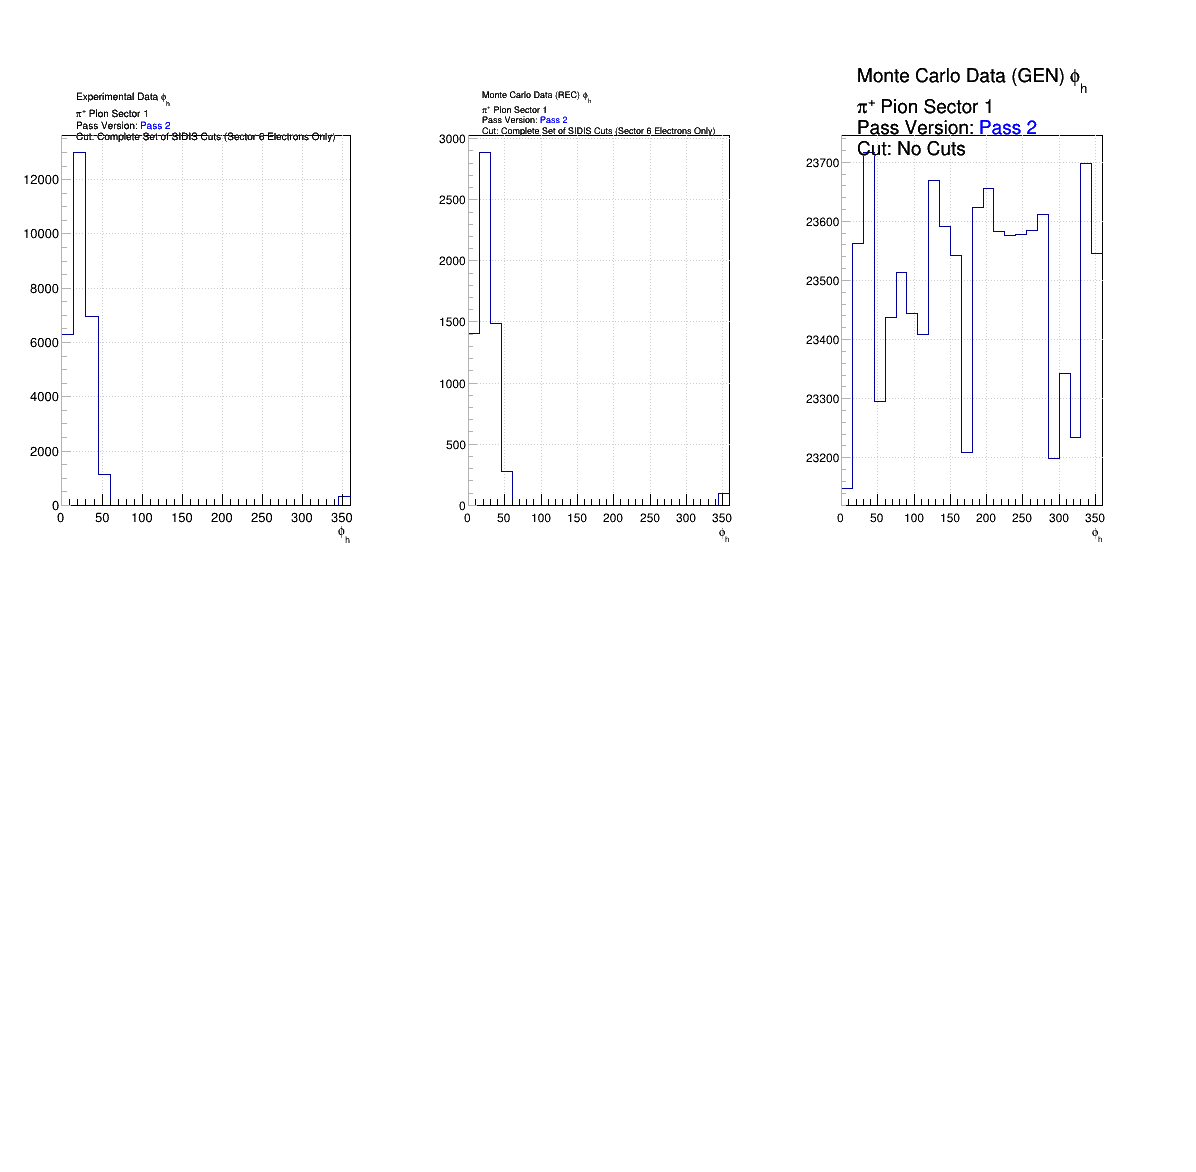

In [9]:
cut = "cut_Complete_SIDIS_eS6o"
# cut = "cut_Complete_SIDIS"

Q2_y_Bin = "All"
Q2_y_Bin = "1"
Histo_Name_mdf = f"((Histo-Group='Normal_2D'), (Data-Type='mdf'), (Data-Cut='{cut}'), (Smear-Type=''), (Binning-Type='Y_bin'-[Q2-y-Bin={Q2_y_Bin}, z-PT-Bin=All]), (Var-D1='pipsec'-[NumBins=8, MinBin=-0.5, MaxBin=7.5]), (Var-D2='phi_t'-[NumBins=24, MinBin=0, MaxBin=360]))"
# Histo_Name_mdf = str(Histo_Name_mdf.replace("mdf", "mdf")).replace("cut_Complete_SIDIS", "no_cut")
Histo_Name_rdf = str(Histo_Name_mdf.replace("mdf", "rdf"))
# Histo_Name_rdf = str(Histo_Name_rdf.replace(f"{cut}", "cut_Complete_SIDIS"))
Histo_Name_gdf = str(Histo_Name_mdf.replace("mdf", "gdf")).replace(f"{cut}", "no_cut")
Histo_Name_gdf = str(Histo_Name_gdf.replace("mdf", "gdf")).replace("cut_Complete_SIDIS",      "no_cut")

Histo_mdf_3D   = mdf.Get(str(Histo_Name_mdf))
Histo_rdf_3D   = rdf.Get(str(Histo_Name_rdf))
Histo_gdf_3D   = gdf.Get(str(Histo_Name_gdf))


Histo_mdf_Title = str(Histo_mdf_3D.GetTitle()).replace("#pi^{+} Sector vs. ", "")
Histo_rdf_Title = str(Histo_rdf_3D.GetTitle()).replace("#pi^{+} Sector vs. ", "")
Histo_gdf_Title = str(Histo_gdf_3D.GetTitle()).replace("#pi^{+} Sector vs. ", "")

# Histo_mdf_Title = Histo_mdf_Title.replace("".join(["}{Q^{2}-y Bin: ", str(Q2_y_Bin)]), "".join(["".join(["}{#splitline{Q^{2}-y Bin: ", str(Q2_y_Bin)]) if(Q2_y_Bin not in ["All"]) else "",  "}{Pass Version: #color[", str(root_color.Blue), "]{", str(Standard_Histogram_Title_Addition), "}}" if(Q2_y_Bin not in ["All"]) else "}"]))
# Histo_rdf_Title = Histo_rdf_Title.replace("".join(["}{Q^{2}-y Bin: ", str(Q2_y_Bin)]), "".join(["".join(["}{#splitline{Q^{2}-y Bin: ", str(Q2_y_Bin)]) if(Q2_y_Bin not in ["All"]) else "",  "}{Pass Version: #color[", str(root_color.Blue), "]{", str(Standard_Histogram_Title_Addition), "}}" if(Q2_y_Bin not in ["All"]) else "}"]))
# Histo_gdf_Title = Histo_gdf_Title.replace("".join(["}{Q^{2}-y Bin: ", str(Q2_y_Bin)]), "".join(["".join(["}{#splitline{Q^{2}-y Bin: ", str(Q2_y_Bin)]) if(Q2_y_Bin not in ["All"]) else "",  "}{Pass Version: #color[", str(root_color.Blue), "]{", str(Standard_Histogram_Title_Addition), "}}" if(Q2_y_Bin not in ["All"]) else "}"]))

Q2_xB_Bin_Unfold = 0#Q2_y_Bin
z_pT_Bin_Unfold = 0
Particle_Sector = "#pi^{+} Pion Sector"
Sector = 1
New_Bin_Title = "".join(["".join(["}{#splitline{Q^{2}-y Bin: ", str(Q2_xB_Bin_Unfold), "".join([" #topbar z-P_{T} Bin: ", str(z_pT_Bin_Unfold)]) if(z_pT_Bin_Unfold not in [0]) else "", f" #topbar {Particle_Sector} {Sector}"]) if(str(Q2_xB_Bin_Unfold) not in ["All", "0", 0]) else "".join(["}{#splitline{", Particle_Sector, " ", str(Sector)]),  "}{Pass Version: #color[", str(root_color.Blue), "]{", str(Standard_Histogram_Title_Addition), "}}"])# if(str(Q2_xB_Bin_Unfold) not in ["All", "0", 0]) else "}"])
Histo_mdf_Title = Histo_mdf_Title.replace("".join(["}{Q^{2}-y Bin: ", str(Q2_y_Bin)]), New_Bin_Title)
Histo_rdf_Title = Histo_rdf_Title.replace("".join(["}{Q^{2}-y Bin: ", str(Q2_y_Bin)]), New_Bin_Title)
Histo_gdf_Title = Histo_gdf_Title.replace("".join(["}{Q^{2}-y Bin: ", str(Q2_y_Bin)]), New_Bin_Title)
print(f"Histo_gdf_Title = {Histo_gdf_Title}")
print(f"Standard_Histogram_Title_Addition = {Standard_Histogram_Title_Addition}")


if(z_pT_Bin_Unfold in [0, "All"]):
    Histo_mdf_3D.GetXaxis().SetRangeUser(1, 50)
    Histo_rdf_3D.GetXaxis().SetRangeUser(1, 50)
    Histo_gdf_3D.GetXaxis().SetRangeUser(1, 50)
else:
    Histo_mdf_3D.GetXaxis().SetRangeUser(z_pT_Bin_Unfold, z_pT_Bin_Unfold)
    Histo_rdf_3D.GetXaxis().SetRangeUser(z_pT_Bin_Unfold, z_pT_Bin_Unfold)
    Histo_gdf_3D.GetXaxis().SetRangeUser(z_pT_Bin_Unfold, z_pT_Bin_Unfold)

if(Sector in [0, "All"]):    
    Histo_mdf_3D.GetYaxis().SetRangeUser(0, 7)
    Histo_rdf_3D.GetYaxis().SetRangeUser(0, 7)
    Histo_gdf_3D.GetYaxis().SetRangeUser(0, 7)
else:
    Histo_mdf_3D.GetYaxis().SetRangeUser(Sector, Sector)
    Histo_rdf_3D.GetYaxis().SetRangeUser(Sector, Sector)
    Histo_gdf_3D.GetYaxis().SetRangeUser(Sector, Sector)

# Histo_mdf_3D.GetZaxis().SetRangeUser(300, 400)
# Histo_rdf_3D.GetZaxis().SetRangeUser(300, 400)
# Histo_gdf_3D.GetZaxis().SetRangeUser(300, 400)

Histo_mdf_2D  = Histo_mdf_3D.Project3D("z")
Histo_rdf_2D  = Histo_rdf_3D.Project3D("z")
Histo_gdf_2D  = Histo_gdf_3D.Project3D("z")

Histo_mdf_2D.SetTitle(Histo_mdf_Title)
Histo_rdf_2D.SetTitle(Histo_rdf_Title)
Histo_gdf_2D.SetTitle(Histo_gdf_Title)

# Histo_mdf_2D.RebinX(2)
# Histo_rdf_2D.RebinX(2)
# Histo_gdf_2D.RebinX(2)
# Histo_mdf_2D.RebinY(2)
# Histo_rdf_2D.RebinY(2)
# Histo_gdf_2D.RebinY(2)

# Histo_mdf_2D.RebinX(5)
# Histo_rdf_2D.RebinX(5)
# Histo_gdf_2D.RebinX(5)
# Histo_mdf_2D.RebinY(5)
# Histo_rdf_2D.RebinY(5)
# Histo_gdf_2D.RebinY(5)


# Histo_mdf_2D.RebinX(10)
# Histo_rdf_2D.RebinX(10)
# Histo_gdf_2D.RebinX(10)
# Histo_mdf_2D.RebinY(10)
# Histo_rdf_2D.RebinY(10)
# Histo_gdf_2D.RebinY(10)


# Histo_mdf_Total = Histo_mdf_2D.GetEntries()
# Histo_rdf_Total = Histo_rdf_2D.GetEntries()
# Histo_gdf_Total = Histo_gdf_2D.GetEntries()


# Histo_mdf_2D.Scale(1/Histo_mdf_Total)
# Histo_rdf_2D.Scale(1/Histo_rdf_Total)
# Histo_gdf_2D.Scale(1/Histo_gdf_Total)


# Histo_ratio_2D = Histo_rdf_2D.Clone("Histo_ratio_2D")

# for x_bin in range(0,      Histo_ratio_2D.GetNbinsX() + 1):
#     for y_bin in range(0,  Histo_ratio_2D.GetNbinsY() + 1):
#         Histo_rdf_value  = Histo_rdf_2D.GetBinContent(x_bin, y_bin)
#         Histo_mdf_value  = Histo_mdf_2D.GetBinContent(x_bin, y_bin)
# #         Histo_rdf_value  = round(Histo_rdf_value, 6)
# #         Histo_mdf_value  = round(Histo_mdf_value, 6)
#         if(Histo_rdf_value == 0):
#             percent_diff = 100 if(Histo_mdf_value != 0) else 0
#             # if(percent_diff == 100):
#             #     print(f"{color.Error}Empty rdf with Histo_mdf_value*Histo_mdf_Total = {color.END_B}{Histo_mdf_value*Histo_mdf_Total}{color.END}")
#         else:
#             percent_diff = (abs(Histo_rdf_value - Histo_mdf_value)/Histo_rdf_value)*100
# #             percent_diff = ((Histo_rdf_value - Histo_mdf_value)/Histo_rdf_value)*100
# #             percent_diff = ((Histo_mdf_value - Histo_rdf_value)/Histo_rdf_value)*100
# #         if(percent_diff > 200):
# #             percent_diff = 500
# #         elif(percent_diff < 80):
# #             percent_diff = 0
# #         if(percent_diff < 80 and percent_diff > 20):
# #             percent_diff = 20
# #         if(percent_diff < 20):
# #             percent_diff = 0
# #         if(percent_diff > 1000):
# #             print(f"{color.Error}Large err rdf with Histo_mdf_value*Histo_mdf_Total = {color.END_B}{Histo_mdf_value*Histo_mdf_Total}{color.END}")
# #         if(percent_diff >= 100):
# #             percent_diff =  200
# #         if(percent_diff < -100):
# #             percent_diff = -200
# #         if(percent_diff > 90):
# #             percent_diff = 200
# #         if(percent_diff < 0):
# #             percent_diff = 0
#         Histo_ratio_2D.SetBinContent(x_bin, y_bin, percent_diff)

# # Histo_ratio_2D.Add(Histo_mdf_2D, -1)
# # Histo_ratio_2D.Divide(Histo_rdf_2D)

# Histo_ratio_2D.SetTitle("#splitline{#scale[2]{Normalized % Dif between Data and MC}}{#scale[1.75]{(Data - MC)/Data}}")
# Histo_ratio_2D.GetZaxis().SetTitle("% Dif")

canvas = Canvas_Create(Name="Name", Num_Columns=3, Num_Rows=2, Size_X=1200, Size_Y=1200, cd_Space=0)
# ROOT.gPad.SetLogz(1)
canvas.Draw()

# canvas.cd(1)
Draw_Canvas(canvas=canvas, cd_num=1, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
Histo_rdf_2D.Draw("colz")
# canvas.cd(2)
Draw_Canvas(canvas=canvas, cd_num=2, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
Histo_mdf_2D.Draw("colz")
# canvas.cd(3)
Draw_Canvas(canvas=canvas, cd_num=3, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
Histo_gdf_2D.Draw("colz")

# Draw_Canvas(canvas=canvas, cd_num=4, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
# # Histo_ratio_2D.GetXaxis().SetRangeUser(-400, 0)
# # Histo_ratio_2D.GetYaxis().SetRangeUser(20, 400)
# Histo_ratio_2D.Draw("colz")

# Draw_Canvas(canvas=canvas, cd_num=5, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
# Histo_ratio_2D_Log = Histo_ratio_2D.Clone("Logscale")
# Histo_ratio_2D_Log.SetTitle("".join(["#splitline{", str(Histo_ratio_2D.GetTitle()), "}{#scale[1.5]{Log Scale}}"]))
# Histo_ratio_2D_Log.Draw("colz")
# ROOT.gPad.SetLogz(1)

# # Draw_Canvas(canvas=canvas, cd_num=6, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
# # # Histo_ratio_2D.GetXaxis().SetRangeUser(-400, 0)
# # # Histo_ratio_2D.GetYaxis().SetRangeUser(20, 400)
# # Histo_ratio_2D.Draw("lego")
# # # ROOT.gPad.SetLogz(1)
print("Done")

# print(f"Histo_mdf_Total = {Histo_mdf_Total}")
# print(f"Histo_rdf_Total = {Histo_rdf_Total}")
# print(f"Histo_gdf_Total = {Histo_gdf_Total}")


In [6]:
# def print_max_bin_coordinates(histogram):
#     max_content = float('-inf')
#     max_x, max_y = 0, 0
#     # Loop over all bins in the histogram (excluding underflow/overflow)
#     for ix in range(1, histogram.GetNbinsX() + 1):
#         for iy in range(1, histogram.GetNbinsY() + 1):
#             content = histogram.GetBinContent(ix, iy)
#             if(content > max_content):
#                 max_content = content
#                 max_x = histogram.GetXaxis().GetBinCenter(ix)
#                 max_y = histogram.GetYaxis().GetBinCenter(iy)

#     print(f"Maximum bin content is {max_content} at x = {max_x}, y = {max_y}")
#     print(f"{max_x}, {max_y}")
# #     print(f"Largest bin content is at x = {x_center}, y = {y_center}")
#     return [max_x, max_y]
# #     return [max_content, max_x, max_y]


In [7]:
# def apply_circular_cut(histogram, center_x, center_y, radius, sector=1):
#     """Apply a circular cut and zero out bins outside the circle."""
#     for binx in range(1, histogram.GetNbinsX() + 1):
#         for biny in range(1, histogram.GetNbinsY() + 1):
#             x = histogram.GetXaxis().GetBinCenter(binx)
#             y = histogram.GetYaxis().GetBinCenter(biny)
#             Cut_Condition = False
#             if(sector == 1 or True):
#                 Cut_Condition = (y < (-0.4803)*x + (19.0945)) or (y > (0.5236)*x + (-27.0866))
#                 Cut_Condition = not ((y > (-0.4803)*x + (19.0945)) and (y < (0.5236)*x + (-27.0866)))
#             if(sector == 2):
# #                 Cut_Condition = (y < (0.6749)*x + (17.7778)) or (y > (49.0)*x + (-1287.0))
# #                 Cut_Condition = (y < (0.6749)*x + (17.7778)) or (y > (33.8333)*x + (-877.5))
# #                 Cut_Condition = (y < (0.6749)*x + (17.7778)) or (y > (33.832)*x + (-877.4638))
                
#                 Cut_Condition = Cut_Condition and not ((y > (0.6749)*x + (17.7778)) and (y < (33.832)*x + (-877.4638)))
#                 # Cut_Condition = Cut_Condition or (((y < (0.6749)*x + (17.7778)) or (y > (49.0)*x + (-1287.0))) and (x > 0 and y > 0))
#             if(sector == 3):
#                 Cut_Condition = (y < (-0.6327)*x + (29.1837)) or (y > (-19.0)*x + (-430.0))
#                 Cut_Condition = (y < (-0.6471)*x + (28.8224)) or (y > (-19.0)*x + (-430.0))
#                 Cut_Condition = (y < (-0.6442)*x + (29.6081)) or (y > (-19.0013)*x + (-430.0535))
                
#                 Cut_Condition = not ((y > (-0.6442)*x + (29.6081)) and (y < (-19.0013)*x + (-430.0535)))
#                 # Cut_Condition = Cut_Condition or (((y < (-0.6327)*x + (29.1837)) or (y > (-19.0)*x + (-430.0))) and (x < 0 and y > 0))
#             if(sector == 4):
#                 Cut_Condition = (y < (0.4717)*x + (16.5094)) or (y > (-0.4717)*x + (-16.5094))
                
#                 Cut_Condition = not ((y > (0.4717)*x + (16.5094)) and (y < (-0.4717)*x + (-16.5094)))
#                 # Cut_Condition = Cut_Condition or (((y < (0.4717)*x + (16.5094)) or (y > (-0.4717)*x + (-16.5094))) and (x < 0))
#             if(sector == 5):
#                 Cut_Condition = (y > (0.6878)*x + (-21.1814)) or (y < (10.8519)*x + (212.5926))
#                 Cut_Condition = (y > (0.6907)*x + (-20.4237)) or (y < (11.2692)*x + (233.4615))
#                 Cut_Condition = (y > (0.6864)*x + (-21.5254)) or (y < (11.2308)*x + (231.5385))
#                 Cut_Condition = (y > (0.6809)*x + (-22.9787)) or (y < (11.6)*x + (250.0))
#                 Cut_Condition = (y > (0.6692)*x + (-26.0021)) or (y < (11.6)*x + (250.0))
#                 Cut_Condition = (y > (0.6689)*x + (-26.0758)) or (y < (11.6194)*x + (250.9717))
#                 Cut_Condition = (y > 0) or (y < (12.6543)*x + (302.716))
#                 Cut_Condition = (y > (0.669)*x + (-26.0705)) or (y < (12.6372)*x + (301.8584))
                
#                 Cut_Condition = not ((y < (0.669)*x + (-26.0705)) and (y > (12.6372)*x + (301.8584)))
#             if(sector == 6):
#                 Cut_Condition = (y > (-0.6102)*x + (-27.2362)) or (y < (-17.2353)*x + (238.7647))
#                 Cut_Condition = (y > (-0.6063)*x + (-28.2992)) or (y < (-17.1765)*x + (236.8235))
#                 Cut_Condition = (y > (-0.6047)*x + (-28.7194)) or (y < (-18.1875)*x + (270.1875))
#                 Cut_Condition = (y > (-0.5908)*x + (-32.4752)) or (y < (-18.1875)*x + (270.1875))
#                 Cut_Condition = (y > (-0.5908)*x + (-32.4752)) or (y < (-21.0)*x + (363.0))
#                 Cut_Condition = (y > (-0.5909)*x + (-32.4477)) or (y < (-21.0059)*x + (363.1938))
                
#                 Cut_Condition = not ((y < (-0.5909)*x + (-32.4477)) and (y > (-21.0059)*x + (363.1938)))
                
# #             Cut_Condition = Cut_Condition or (histogram.GetBinContent(binx, biny) < 800)

#             Cut_Condition = Cut_Condition or ((x - center_x)**2 + (y - center_y)**2 > radius**2)            
#             # Check if the bin center is outside the circle
#             if(Cut_Condition):
#                 histogram.SetBinContent(binx, biny, 0)  # Set bin content to zero
#     return histogram

In [8]:
# import ROOT
# ROOT.gStyle.SetOptStat("i")
# def apply_circular_cut(histogram, center_x, center_y, radius, sector=1):
#     """Apply a circular cut and zero out bins outside the circle."""
#     for binx in range(1, histogram.GetNbinsX() + 1):
#         for biny in range(1, histogram.GetNbinsY() + 1):
#             x = histogram.GetXaxis().GetBinCenter(binx)
#             y = histogram.GetYaxis().GetBinCenter(biny)
#             Cut_Condition = ((x - center_x)**2 + (y - center_y)**2 < radius**2) and (sector in [1, 2, 3, 4, 5, 6, 0, "All"])
#             if(sector in [1, 0, "All"]):
#                 Cut_Condition = Cut_Condition and not ((y > (-0.4803)*x + (19.0945)) and (y < (0.5236)*x + (-27.0866)))
#             if(sector in [2, 0, "All"]):
#                 Cut_Condition = Cut_Condition and not ((y > (0.6749)*x + (17.7778)) and (y < (33.832)*x + (-877.4638)))
#             if(sector in [3, 0, "All"]):
# #             if(sector in [3]):
#                 Cut_Condition = Cut_Condition and not ((y > (-0.6442)*x + (29.6081)) and (y < (-19.0013)*x + (-430.0535)))
#             if(sector in [4, 0, "All"]):
# #             if(sector in [4]):
#                 Cut_Condition = Cut_Condition and not ((y > (0.4717)*x + (16.5094)) and (y < (-0.4717)*x + (-16.5094)))
# #             if(sector in [5]):
#             if(sector in [5, 0, "All"]):
#                 Cut_Condition = Cut_Condition and not ((y < (0.669)*x + (-26.0705)) and (y > (12.6372)*x + (301.8584)))
# #             if(sector in [6]):
#             if(sector in [6, 0, "All"]):
#                 Cut_Condition = Cut_Condition and not ((y < (-0.5909)*x + (-32.4477)) and (y > (-21.0059)*x + (363.1938)))
#             Cut_Condition = Cut_Condition or ((x - center_x)**2 + (y - center_y)**2 > radius**2) # Check if the bin center is outside the circle
#             # Cut_Condition = Cut_Condition and not (histogram.GetBinContent(binx, biny) > 800)
#             if(Cut_Condition):
#                 histogram.SetBinContent(binx, biny, 0)  # Set bin content to zero
#     return histogram



# # Define the center and radius of the circle for the cut
# center_x, center_y, radius = 0, 0, 325

# # center_x, center_y, radius = 0, 0, 150

# SECTOR_List = [1, 2, 3, 4, 5, 6]
# SECTOR_List = ["All"]
# SECTOR_List = [3]
# canvas, h1, h2, lines = {}, {}, {}, {}
# for SECTOR in SECTOR_List:
#     h1[SECTOR] = Histo_ratio_2D.Clone(f"h1_{SECTOR}")
# #     h1[SECTOR] = Histo_rdf_2D.Clone(f"h1_{SECTOR}")
# #     h1[SECTOR].Scale(Histo_rdf_Total)

#     # h1[SECTOR] = Histo_mdf_2D.Clone(f"h1_{SECTOR}")
#     # h1[SECTOR].Scale(Histo_mdf_Total)
#     lines[SECTOR] = []
#     if(SECTOR in [1, 0, "All"]):
#         lines[SECTOR].append(ROOT.TLine(46, -3, 300, -125))
#         lines[SECTOR].append(ROOT.TLine(46, -3, 300,  130))
# #         h1[SECTOR].GetXaxis().SetRangeUser(25, 400)
# #         h1[SECTOR].GetYaxis().SetRangeUser(-150, 150)
#     if(SECTOR in [2, 0, "All"]):
#         lines[SECTOR].append(ROOT.TLine( 27, 36, 270,   200))
#         lines[SECTOR].append(ROOT.TLine( 27, 36, 35.69, 330))
# #         h1[SECTOR].GetXaxis().SetRangeUser(0, 300)
# #         h1[SECTOR].GetYaxis().SetRangeUser(0, 400)
#     if(SECTOR in [3, 0, "All"]):
#         lines[SECTOR].append(ROOT.TLine(-25.04, 45.74, -275, 206.776))
#         lines[SECTOR].append(ROOT.TLine(-25.04, 45.74, -40,  330))
# #         h1[SECTOR].GetXaxis().SetRangeUser(-300, 0)
# #         h1[SECTOR].GetYaxis().SetRangeUser(0,  400)
#     if(SECTOR in [4, 0, "All"]):
#         lines[SECTOR].append(ROOT.TLine(-35, 0, -300, -125))
#         lines[SECTOR].append(ROOT.TLine(-35, 0, -300,  125))
# #         h1[SECTOR].GetXaxis().SetRangeUser(-400, -25)
# #         h1[SECTOR].GetYaxis().SetRangeUser(-150, 150)
#     if(SECTOR in [5, 0, "All"]):
#         lines[SECTOR].append(ROOT.TLine(-27.4, -44.4, -260, -200))
#         lines[SECTOR].append(ROOT.TLine(-27.4, -44.4, -50,  -330))
# #         h1[SECTOR].GetXaxis().SetRangeUser(-300, 0)
# #         h1[SECTOR].GetYaxis().SetRangeUser(-400, 0)
# #         h1[SECTOR].GetYaxis().SetRangeUser(-150, 0)
#     if(SECTOR in [6, 0, "All"]):
#         lines[SECTOR].append(ROOT.TLine(19.38, -43.9, 270, -192))
#         lines[SECTOR].append(ROOT.TLine(19.38, -43.9, 33,  -330))
# #         h1[SECTOR].GetXaxis().SetRangeUser(0, 300)
# #         h1[SECTOR].GetYaxis().SetRangeUser(-400, 0)
# #         h1[SECTOR].GetYaxis().SetRangeUser(-150, 0)



#     h1[SECTOR].SetTitle("".join(["#splitline{Sector ", str(SECTOR), "}{", str(h1[SECTOR].GetTitle()), "}"]))
#     h2[SECTOR] = h1[SECTOR].Clone(f"h2_{SECTOR}")

#     print(f"\nRUNNING FOR SECTOR {SECTOR}")
#     print("\tBefore:")
#     max_x, max_y = print_max_bin_coordinates(h2[SECTOR])

#     # h2.GetXaxis().SetRangeUser(-300, 0)
#     # h2.GetYaxis().SetRangeUser(0,  400)
#     # Apply the cut
#     h2[SECTOR] = apply_circular_cut(h2[SECTOR], center_x, center_y, radius, sector=SECTOR)

#     # h2 = Histo_ratio_2D

#     # Draw the histogram
#     # canvas = ROOT.TCanvas("c1", "Canvas", 800, 600)
#     canvas[SECTOR] = Canvas_Create(Name=f"Name_{SECTOR}", Num_Columns=2, Num_Rows=1, Size_X=1200, Size_Y=800, cd_Space=0)
#     Draw_Canvas(canvas=canvas[SECTOR], cd_num=1, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
#     h1[SECTOR].Draw("colz")
#     h1[SECTOR]
# #     ROOT.gPad.SetLogz(1)
#     Draw_Canvas(canvas=canvas[SECTOR], cd_num=2, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
#     h2[SECTOR].Draw("COLZ")
#     # h2[SECTOR].RebinX(20)
#     # h2[SECTOR].RebinY(20)
# #     ROOT.gPad.SetLogz(1)
    
#     print("\tAfter:")
#     max_x, max_y = print_max_bin_coordinates(h2[SECTOR])
#     line_Max = ROOT.TLine(0, 0, max_x, max_y)
#     line_Max.SetLineColor(ROOT.kGreen)
#     line_Max.SetLineWidth(2)
#     line_Max.Draw("same")
    


#     circle, functions_intercept = {}, {}
#     for CD_NUM in [1, 2]:
#         Draw_Canvas(canvas=canvas[SECTOR], cd_num=CD_NUM, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
#         # Set line attributes
#         # Draw a circle centered at ('center_x', 'center_y') with a radius of 'radius'
#         circle[CD_NUM] = ROOT.TEllipse(center_x, center_y, radius)
#         circle[CD_NUM].SetFillStyle(0)  # Set the fill style to 0 (hollow)
#         circle[CD_NUM].SetLineColor(ROOT.kRed)  # Set the line color to red
#         circle[CD_NUM].SetLineWidth(2)  # Set the line width
#         circle[CD_NUM].Draw("SAME")  # Draw the circle on the same canvas as the histogram
#         for ii, line in enumerate(lines[SECTOR]):
#             line.SetLineColor(ROOT.kRed)
#             line.SetLineWidth(2)
#             line.Draw("same")  # Draw line on the same canvas as the histogram
#             x1, y1, x2, y2 = line.GetX1(), line.GetY1(), line.GetX2(), line.GetY2()
#             # Calculate slope (m) and intercept (c) of the line
#             slope = (y2 - y1) / (x2 - x1) if (x2 - x1) != 0 else "undefined"
#             intercept = y1 - slope * x1 if slope != "undefined" else "undefined"
#             if(CD_NUM in [1]):
#                 sign = ("\n                Cut_Condition = (y <" if(ii < 1) else "or (y >") if(SECTOR not in [5, 6]) else ("\n                Cut_Condition = (y >" if(ii < 1) else "or (y <")
# #                 print(f"{sign} ({round(slope, 4)})*x + ({round(intercept, 4)}))")
# #             functions_intercept[f"A_{CD_NUM}"] = slope
# #             functions_intercept[f"B_{CD_NUM}"] = intercept

# #     if(functions_intercept["A_1"] != functions_intercept["A_2"]):
# #         x_intercept = (functions_intercept["B_2"] - functions_intercept["B_1"])/(functions_intercept["A_1"] - functions_intercept["A_2"])
# #     else:
# #         x_intercept = 0
# #     y_intercept = functions_intercept["A_1"]*x_intercept + functions_intercept["B_1"]
# #     print(f"Lines to intersect at (x, y) = {x_intercept}, {y_intercept}")
    
#     # Update the canvas to see the result
#     ROOT.gStyle.SetOptStat("i")
#     canvas[SECTOR].Update()
#     canvas[SECTOR].Draw()


In [3]:
# import ROOT
# ROOT.gStyle.SetOptStat("i")
# def apply_circular_cut(histogram, center_x, center_y, radius, radius_inner=False, sector=1):
#     """Apply a circular cut and zero out bins outside the circle."""
#     for binx in range(1, histogram.GetNbinsX() + 1):
#         for biny in range(1, histogram.GetNbinsY() + 1):
#             x = histogram.GetXaxis().GetBinCenter(binx)
#             y = histogram.GetYaxis().GetBinCenter(biny)
#             Cut_Condition = ((x - center_x)**2 + (y - center_y)**2 < radius**2) and (sector in [1, 2, 3, 4, 5, 6, 0, "All"])
#             if(sector in [1, 0, "All"]):
# #                 Cut_Condition = Cut_Condition and not ((y > (-0.4803)*x + (19.0945)) and (y < (0.5236)*x + (-27.0866)))
#                 Cut_Condition = Cut_Condition and not ((y > (-0.5)*x + (25.0)) and (y < (0.5241)*x + (-27.2289)))
#             if(sector in [2, 0, "All"]):
# #                 Cut_Condition = Cut_Condition and not ((y > (0.6749)*x + (17.7778)) and (y < (33.832)*x + (-877.4638)))
# #                 Cut_Condition = Cut_Condition and not ((y > (0.6513)*x + (24.1597)) and (y < (77.2358)*x + (-2426.5447)))
#                 Cut_Condition = Cut_Condition and not ((y > (0.6439)*x + (26.145)) and (y < (76.7615)*x + (-2409.6186)))
#             if(sector in [3, 0, "All"]):
# #             if(sector in [3]):
#                 # Cut_Condition = Cut_Condition and not ((y > (-0.6442)*x + (29.6081)) and (y < (-19.0013)*x + (-430.0535)))
# #                 Cut_Condition = Cut_Condition and not ((y > (-0.6306)*x + (33.3576)) and (y < (-23.3244)*x + (-602.9766)))
#                 Cut_Condition = Cut_Condition and not ((y > (-0.6292)*x + (33.7585)) and (y < (-23.2943)*x + (-601.7726)))
#             if(sector in [4, 0, "All"]):
# #             if(sector in [4]):
# #                 Cut_Condition = Cut_Condition and not ((y > (0.4717)*x + (16.5094)) and (y < (-0.4717)*x + (-16.5094)))
#                 Cut_Condition = Cut_Condition and not ((y > (0.5)*x + (25.0)) and (y < (-0.5)*x + (-25.0)))
# #             if(sector in [5]):
#             if(sector in [5, 0, "All"]):
# #                 Cut_Condition = Cut_Condition and not ((y < (0.669)*x + (-26.0705)) and (y > (12.6372)*x + (301.8584)))
#                 Cut_Condition = Cut_Condition and not ((y < (0.6494)*x + (-31.1688)) and (y > (13.3333)*x + (336.6667)))
# #             if(sector in [6]):
#             if(sector in [6, 0, "All"]):
# #                 Cut_Condition = Cut_Condition and not ((y < (-0.5909)*x + (-32.4477)) and (y > (-21.0059)*x + (363.1938)))
#                 Cut_Condition = Cut_Condition and not ((y < (-0.5796)*x + (-35.5102)) and (y > (-35.0)*x + (825.0)))
#             Cut_Condition = Cut_Condition or ((x - center_x)**2 + (y - center_y)**2 > radius**2) # Check if the bin center is outside the circle
#             if(radius_inner):
#                 Cut_Condition = Cut_Condition or ((x - center_x)**2 + (y - center_y)**2 < radius_inner**2)
#             # Cut_Condition = Cut_Condition and not (histogram.GetBinContent(binx, biny) > 800)
#             if(Cut_Condition):
#                 histogram.SetBinContent(binx, biny, 0)  # Set bin content to zero
#     return histogram



# # Define the center and radius of the circle for the cut
# center_x, center_y, radius, radius_inner = 0, 0, 310, 75
# center_x, center_y, radius, radius_inner = 0, 0, 325, 75
# # center_x, center_y, radius = 0, 0, 79
# # center_x, center_y, radius = 0, 0, 250

# SECTOR_List = [1, 2, 3, 4, 5, 6]
# SECTOR_List = [1, 2, 3, 4, 5, 6, "All"]
# # SECTOR_List = ["All"]
# # SECTOR_List = [1]
# canvas, h1, h2, lines, line_Max, circle = {}, {}, {}, {}, {}, {}
# for SECTOR in SECTOR_List:
#     h1[SECTOR] = Histo_ratio_2D.Clone(f"h1_{SECTOR}")
# #     h1[SECTOR] = Histo_rdf_2D.Clone(f"h1_{SECTOR}")
# #     h1[SECTOR].Scale(Histo_rdf_Total)

#     # h1[SECTOR] = Histo_mdf_2D.Clone(f"h1_{SECTOR}")
#     # h1[SECTOR].Scale(Histo_mdf_Total)
#     lines[SECTOR] = []
#     if(SECTOR in [1, 0, "All"]):
#         lines[SECTOR].append([ROOT.TLine(46, -3, 300, -125), ROOT.kRed])
#         lines[SECTOR].append([ROOT.TLine(46, -3, 300,  130), ROOT.kRed])
        
#         lines[SECTOR].append([ROOT.TLine(51, -0.5, 300, -125), ROOT.kViolet])
#         lines[SECTOR].append([ROOT.TLine(51, -0.5, 300,  130), ROOT.kViolet])
#         h1[SECTOR].GetXaxis().SetRangeUser(25, 400)
#         h1[SECTOR].GetYaxis().SetRangeUser(-150, 150)
#     if(SECTOR in [2, 0, "All"]):
#         lines[SECTOR].append([ROOT.TLine( 27, 36, 270,   200), ROOT.kRed])
#         lines[SECTOR].append([ROOT.TLine( 27, 36, 35.69, 330), ROOT.kRed])
        
# #         lines[SECTOR].append([ROOT.TLine(32, 45, 270,   200), ROOT.kViolet])
# #         lines[SECTOR].append([ROOT.TLine(32, 45, 35.69, 330), ROOT.kViolet])
#         lines[SECTOR].append([ROOT.TLine(32, 46.75, 270,   200), ROOT.kViolet])
#         lines[SECTOR].append([ROOT.TLine(32, 46.75, 35.69, 330), ROOT.kViolet])
#         h1[SECTOR].GetXaxis().SetRangeUser(0, 300)
#         h1[SECTOR].GetYaxis().SetRangeUser(0, 400)
#     if(SECTOR in [3, 0, "All"]):
#         lines[SECTOR].append([ROOT.TLine(-25.04, 45.74, -275, 206.776), ROOT.kRed])
#         lines[SECTOR].append([ROOT.TLine(-25.04, 45.74, -40,  330), ROOT.kRed])
        
# #         lines[SECTOR].append(ROOT.TLine(-28.04, 51.04, -275, 206.776))
# #         lines[SECTOR].append(ROOT.TLine(-28.04, 51.04, -40,  330))
#         lines[SECTOR].append([ROOT.TLine(-28.04, 51.4, -275, 206.776), ROOT.kViolet])
#         lines[SECTOR].append([ROOT.TLine(-28.04, 51.4, -40,  330), ROOT.kViolet])
#         h1[SECTOR].GetXaxis().SetRangeUser(-300, 0)
#         h1[SECTOR].GetYaxis().SetRangeUser(0,  400)
#     if(SECTOR in [4, 0, "All"]):
#         lines[SECTOR].append([ROOT.TLine(-35, 0, -300, -125), ROOT.kRed])
#         lines[SECTOR].append([ROOT.TLine(-35, 0, -300,  125), ROOT.kRed])
        
#         lines[SECTOR].append([ROOT.TLine(-50, 0, -300, -125), ROOT.kViolet])
#         lines[SECTOR].append([ROOT.TLine(-50, 0, -300,  125), ROOT.kViolet])
#         h1[SECTOR].GetXaxis().SetRangeUser(-400, -25)
#         h1[SECTOR].GetYaxis().SetRangeUser(-150, 150)
#     if(SECTOR in [5, 0, "All"]):
#         lines[SECTOR].append([ROOT.TLine(-27.4, -44.4, -260, -200), ROOT.kRed])
#         lines[SECTOR].append([ROOT.TLine(-27.4, -44.4, -50,  -330), ROOT.kRed])
        
#         lines[SECTOR].append([ROOT.TLine(-29, -50, -260, -200), ROOT.kViolet])
#         lines[SECTOR].append([ROOT.TLine(-29, -50, -50,  -330), ROOT.kViolet])
#         h1[SECTOR].GetXaxis().SetRangeUser(-300, 0)
#         h1[SECTOR].GetYaxis().SetRangeUser(-400, 0)
# #         h1[SECTOR].GetYaxis().SetRangeUser(-150, 0)
#     if(SECTOR in [6, 0, "All"]):
#         lines[SECTOR].append([ROOT.TLine(19.38, -43.9, 270, -192), ROOT.kRed])
#         lines[SECTOR].append([ROOT.TLine(19.38, -43.9, 33,  -330), ROOT.kRed])
        
#         lines[SECTOR].append([ROOT.TLine(25, -50, 270, -192), ROOT.kViolet])
#         lines[SECTOR].append([ROOT.TLine(25, -50, 33,  -330), ROOT.kViolet])
#         h1[SECTOR].GetXaxis().SetRangeUser(0, 300)
#         h1[SECTOR].GetYaxis().SetRangeUser(-400, 0)
# #         h1[SECTOR].GetYaxis().SetRangeUser(-150, 0)

#     if(SECTOR in [0, "All"]):
#         h1[SECTOR].GetXaxis().SetRangeUser(-400, 400)
#         h1[SECTOR].GetYaxis().SetRangeUser(-400, 400)



#     h1[SECTOR].SetTitle("".join(["#splitline{Sector ", str(SECTOR), "}{", str(h1[SECTOR].GetTitle()), "}"]))
#     h2[SECTOR] = h1[SECTOR].Clone(f"h2_{SECTOR}")

#     print(f"\nRUNNING FOR SECTOR {SECTOR}")
#     print("\tBefore:")
#     max_x, max_y = print_max_bin_coordinates(h2[SECTOR])

#     # h2.GetXaxis().SetRangeUser(-300, 0)
#     # h2.GetYaxis().SetRangeUser(0,  400)
#     # Apply the cut
#     h2[SECTOR] = apply_circular_cut(h2[SECTOR], center_x, center_y, radius, radius_inner, sector=SECTOR)

#     # h2 = Histo_ratio_2D

#     # Draw the histogram
#     # canvas = ROOT.TCanvas("c1", "Canvas", 800, 600)
#     canvas[SECTOR] = Canvas_Create(Name=f"Name_{SECTOR}", Num_Columns=2, Num_Rows=1, Size_X=1600, Size_Y=1200, cd_Space=0)
#     Draw_Canvas(canvas=canvas[SECTOR], cd_num=1, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
#     h1[SECTOR].Draw("colz")
#     ROOT.gPad.SetLogz(1)
#     Draw_Canvas(canvas=canvas[SECTOR], cd_num=2, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
#     h2[SECTOR].Draw("COLZ")
#     # h2[SECTOR].RebinX(20)
#     # h2[SECTOR].RebinY(20)
#     ROOT.gPad.SetLogz(1)
    
#     print("\tAfter:")
#     max_x, max_y = print_max_bin_coordinates(h2[SECTOR])
#     line_Max[SECTOR] = ROOT.TLine(0, 0, max_x, max_y)
#     line_Max[SECTOR].SetLineColor(ROOT.kGreen)
#     line_Max[SECTOR].SetLineWidth(2)
# #     line_Max[SECTOR].Draw("same")
    


# #     circle, functions_intercept = {}, {}
#     for CD_NUM in [1, 2]:
#         Draw_Canvas(canvas=canvas[SECTOR], cd_num=CD_NUM, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
#         # Set line attributes
#         # Draw a circle centered at ('center_x', 'center_y') with a radius of 'radius'
#         circle[f"{SECTOR}_{CD_NUM}"] = ROOT.TEllipse(center_x, center_y, radius)
#         circle[f"{SECTOR}_{CD_NUM}"].SetFillStyle(0)  # Set the fill style to 0 (hollow)
#         circle[f"{SECTOR}_{CD_NUM}"].SetLineColor(ROOT.kRed)  # Set the line color to red
#         circle[f"{SECTOR}_{CD_NUM}"].SetLineWidth(2)  # Set the line width
#         circle[f"{SECTOR}_{CD_NUM}"].Draw("SAME")  # Draw the circle on the same canvas as the histogram
        
#         circle[f"Inner_{SECTOR}_{CD_NUM}"] = ROOT.TEllipse(center_x, center_y, radius_inner)
#         circle[f"Inner_{SECTOR}_{CD_NUM}"].SetFillStyle(3644)
#         circle[f"Inner_{SECTOR}_{CD_NUM}"].SetFillColor(ROOT.kViolet)
#         circle[f"Inner_{SECTOR}_{CD_NUM}"].SetLineColor(ROOT.kViolet)
#         circle[f"Inner_{SECTOR}_{CD_NUM}"].SetLineWidth(1)
#         circle[f"Inner_{SECTOR}_{CD_NUM}"].Draw("SAME")
        
#         for ii, line in enumerate(lines[SECTOR]):
#             # line.SetLineColor(ROOT.kRed)
#             # line.SetLineWidth(1)
#             # line.Draw("same")  # Draw line on the same canvas as the histogram
#             line[0].SetLineColor(line[1])
#             line[0].SetLineWidth(1)
#             line[0].Draw("same")  # Draw line on the same canvas as the histogram
#             x1, y1, x2, y2 = line[0].GetX1(), line[0].GetY1(), line[0].GetX2(), line[0].GetY2()
#             # Calculate slope (m) and intercept (c) of the line
#             slope = (y2 - y1) / (x2 - x1) if (x2 - x1) != 0 else "undefined"
#             intercept = y1 - slope * x1 if slope != "undefined" else "undefined"
#             # if(CD_NUM in [1]):
#             if((CD_NUM in [1]) and (len(SECTOR_List) in [1]) and (line[1] in [ROOT.kViolet])):
#                 sign = ("\n                Cut_Condition = Cut_Condition and not ((y >" if(ii%2 == 0) else "and (y <") if(SECTOR not in [5, 6]) else ("\n                Cut_Condition = Cut_Condition and not ((y <" if(ii%2 == 0) else "and (y >")
#                 print(f"{sign} ({round(slope, 4)})*x + ({round(intercept, 4)}))")
# #             functions_intercept[f"A_{CD_NUM}"] = slope
# #             functions_intercept[f"B_{CD_NUM}"] = intercept

# #     if(functions_intercept["A_1"] != functions_intercept["A_2"]):
# #         x_intercept = (functions_intercept["B_2"] - functions_intercept["B_1"])/(functions_intercept["A_1"] - functions_intercept["A_2"])
# #     else:
# #         x_intercept = 0
# #     y_intercept = functions_intercept["A_1"]*x_intercept + functions_intercept["B_1"]
# #     print(f"Lines to intersect at (x, y) = {x_intercept}, {y_intercept}")
    
#     # Update the canvas to see the result
#     ROOT.gStyle.SetOptStat("i")
#     canvas[SECTOR].Update()
#     canvas[SECTOR].Draw()
    
# print(")")


In [10]:
# def Draw_With_Cuts(Histo_rdf_2D, Histo_mdf_2D, Histo_gdf_2D, Histo_ratio_2D):

# canvas, h1, h2, lines = {}, {}, {}, {}
# for SECTOR in SECTOR_List:
#     h1[SECTOR] = Histo_ratio_2D.Clone(f"h1_{SECTOR}")
# #     h1[SECTOR] = Histo_rdf_2D.Clone(f"h1_{SECTOR}")
# #     h1[SECTOR].Scale(Histo_rdf_Total)

#     # h1[SECTOR] = Histo_mdf_2D.Clone(f"h1_{SECTOR}")
#     # h1[SECTOR].Scale(Histo_mdf_Total)
#     lines[SECTOR] = []
#     if(SECTOR in [1, 0, "All"]):
#         lines[SECTOR].append(ROOT.TLine(46, -3, 300, -125))
#         lines[SECTOR].append(ROOT.TLine(46, -3, 300,  130))
# #         h1[SECTOR].GetXaxis().SetRangeUser(25, 400)
# #         h1[SECTOR].GetYaxis().SetRangeUser(-150, 150)
#     if(SECTOR in [2, 0, "All"]):
#         lines[SECTOR].append(ROOT.TLine( 27, 36, 270,   200))
#         lines[SECTOR].append(ROOT.TLine( 27, 36, 35.69, 330))
# #         h1[SECTOR].GetXaxis().SetRangeUser(0, 300)
# #         h1[SECTOR].GetYaxis().SetRangeUser(0, 400)
#     if(SECTOR in [3, 0, "All"]):
#         lines[SECTOR].append(ROOT.TLine(-25.04, 45.74, -275, 206.776))
#         lines[SECTOR].append(ROOT.TLine(-25.04, 45.74, -40,  330))
# #         h1[SECTOR].GetXaxis().SetRangeUser(-300, 0)
# #         h1[SECTOR].GetYaxis().SetRangeUser(0,  400)
#     if(SECTOR in [4, 0, "All"]):
#         lines[SECTOR].append(ROOT.TLine(-35, 0, -300, -125))
#         lines[SECTOR].append(ROOT.TLine(-35, 0, -300,  125))
# #         h1[SECTOR].GetXaxis().SetRangeUser(-400, -25)
# #         h1[SECTOR].GetYaxis().SetRangeUser(-150, 150)
#     if(SECTOR in [5, 0, "All"]):
#         lines[SECTOR].append(ROOT.TLine(-27.4, -44.4, -260, -200))
#         lines[SECTOR].append(ROOT.TLine(-27.4, -44.4, -50,  -330))
# #         h1[SECTOR].GetXaxis().SetRangeUser(-300, 0)
# #         h1[SECTOR].GetYaxis().SetRangeUser(-400, 0)
# #         h1[SECTOR].GetYaxis().SetRangeUser(-150, 0)
#     if(SECTOR in [6, 0, "All"]):
#         lines[SECTOR].append(ROOT.TLine(19.38, -43.9, 270, -192))
#         lines[SECTOR].append(ROOT.TLine(19.38, -43.9, 33,  -330))
# #         h1[SECTOR].GetXaxis().SetRangeUser(0, 300)
# #         h1[SECTOR].GetYaxis().SetRangeUser(-400, 0)
# #         h1[SECTOR].GetYaxis().SetRangeUser(-150, 0)



#     h1[SECTOR].SetTitle("".join(["#splitline{Sector ", str(SECTOR), "}{", str(h1[SECTOR].GetTitle()), "}"]))
#     h2[SECTOR] = h1[SECTOR].Clone(f"h2_{SECTOR}")

#     print(f"\nRUNNING FOR SECTOR {SECTOR}")
#     print("\tBefore:")
#     max_x, max_y = print_max_bin_coordinates(h2[SECTOR])

#     # h2.GetXaxis().SetRangeUser(-300, 0)
#     # h2.GetYaxis().SetRangeUser(0,  400)
#     # Apply the cut
#     h2[SECTOR] = apply_circular_cut(h2[SECTOR], center_x, center_y, radius, sector=SECTOR)

#     # h2 = Histo_ratio_2D

#     # Draw the histogram
#     # canvas = ROOT.TCanvas("c1", "Canvas", 800, 600)
#     canvas[SECTOR] = Canvas_Create(Name=f"Name_{SECTOR}", Num_Columns=2, Num_Rows=1, Size_X=1200, Size_Y=800, cd_Space=0)
#     Draw_Canvas(canvas=canvas[SECTOR], cd_num=1, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
#     h1[SECTOR].Draw("colz")
#     h1[SECTOR]
# #     ROOT.gPad.SetLogz(1)
#     Draw_Canvas(canvas=canvas[SECTOR], cd_num=2, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
#     h2[SECTOR].Draw("COLZ")
#     # h2[SECTOR].RebinX(20)
#     # h2[SECTOR].RebinY(20)
# #     ROOT.gPad.SetLogz(1)
    
#     print("\tAfter:")
#     max_x, max_y = print_max_bin_coordinates(h2[SECTOR])
#     line_Max = ROOT.TLine(0, 0, max_x, max_y)
#     line_Max.SetLineColor(ROOT.kGreen)
#     line_Max.SetLineWidth(2)
#     line_Max.Draw("same")
    


#     circle, functions_intercept = {}, {}
#     for CD_NUM in [1, 2]:
#         Draw_Canvas(canvas=canvas[SECTOR], cd_num=CD_NUM, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
#         # Set line attributes
#         # Draw a circle centered at ('center_x', 'center_y') with a radius of 'radius'
#         circle[CD_NUM] = ROOT.TEllipse(center_x, center_y, radius)
#         circle[CD_NUM].SetFillStyle(0)  # Set the fill style to 0 (hollow)
#         circle[CD_NUM].SetLineColor(ROOT.kRed)  # Set the line color to red
#         circle[CD_NUM].SetLineWidth(2)  # Set the line width
#         circle[CD_NUM].Draw("SAME")  # Draw the circle on the same canvas as the histogram
#         for ii, line in enumerate(lines[SECTOR]):
#             line.SetLineColor(ROOT.kRed)
#             line.SetLineWidth(2)
#             line.Draw("same")  # Draw line on the same canvas as the histogram
#             x1, y1, x2, y2 = line.GetX1(), line.GetY1(), line.GetX2(), line.GetY2()
#             # Calculate slope (m) and intercept (c) of the line
#             slope = (y2 - y1) / (x2 - x1) if (x2 - x1) != 0 else "undefined"
#             intercept = y1 - slope * x1 if slope != "undefined" else "undefined"
#             if(CD_NUM in [1]):
#                 sign = ("\n                Cut_Condition = (y <" if(ii < 1) else "or (y >") if(SECTOR not in [5, 6]) else ("\n                Cut_Condition = (y >" if(ii < 1) else "or (y <")
# #                 print(f"{sign} ({round(slope, 4)})*x + ({round(intercept, 4)}))")
# #             functions_intercept[f"A_{CD_NUM}"] = slope
# #             functions_intercept[f"B_{CD_NUM}"] = intercept

# #     if(functions_intercept["A_1"] != functions_intercept["A_2"]):
# #         x_intercept = (functions_intercept["B_2"] - functions_intercept["B_1"])/(functions_intercept["A_1"] - functions_intercept["A_2"])
# #     else:
# #         x_intercept = 0
# #     y_intercept = functions_intercept["A_1"]*x_intercept + functions_intercept["B_1"]
# #     print(f"Lines to intersect at (x, y) = {x_intercept}, {y_intercept}")
    
#     # Update the canvas to see the result
#     ROOT.gStyle.SetOptStat("i")
#     canvas[SECTOR].Update()
#     canvas[SECTOR].Draw()





average_h1 = 17.16195
average_h2 = 15.24895
ave_difference = 1.913%
Done


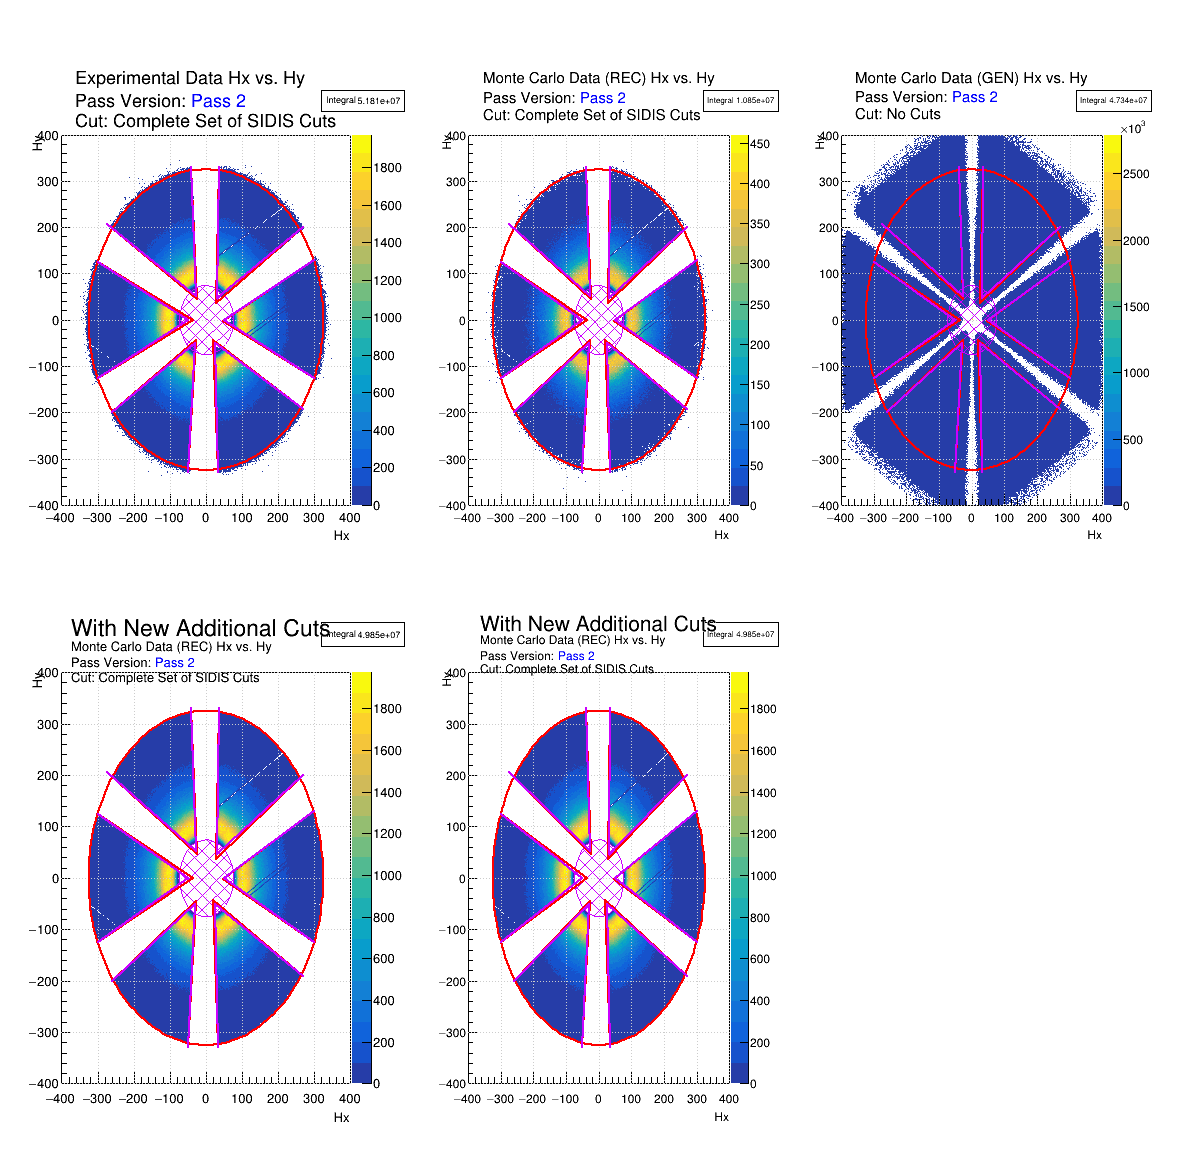

In [108]:
# def grab_histogram_average(histogram):
#     integral = histogram.Integral(1, histogram.GetNbinsX(), 1, histogram.GetNbinsY())
#     num_bins = histogram.GetNbinsX() * histogram.GetNbinsY()
#     average_content = integral / num_bins if num_bins != 0 else 0
#     return average_content

# h1 = Histo_ratio_2D.Clone("h1")
# lines = []
# # lines.append(ROOT.TLine(46,     -3,     300,  -125))
# # lines.append(ROOT.TLine(46,     -3,     300,   130))
# # lines.append(ROOT.TLine(27,     36,     270,   200))
# # lines.append(ROOT.TLine(27,     36,     35.69, 330))
# # lines.append(ROOT.TLine(-25.04, 45.74, -275,   206.776))
# # lines.append(ROOT.TLine(-25.04, 45.74, -40,    330))
# # lines.append(ROOT.TLine(-35,     0,    -300,  -125))
# # lines.append(ROOT.TLine(-35,     0,    -300,   125))
# # lines.append(ROOT.TLine(-27.4, -44.4,  -260,  -200))
# # lines.append(ROOT.TLine(-27.4, -44.4,  -50,   -330))
# # lines.append(ROOT.TLine(19.38, -43.9,   270,  -192))
# # lines.append(ROOT.TLine(19.38, -43.9,   33,   -330))

# lines = []
# # if(SECTOR in [1, 0, "All"]):
# lines.append([ROOT.TLine( 46,   -3,       300, -125),     ROOT.kRed])
# lines.append([ROOT.TLine( 46,   -3,       300,  130),     ROOT.kRed])
# lines.append([ROOT.TLine( 51,   -0.5,     300, -125),     ROOT.kViolet])
# lines.append([ROOT.TLine( 51,   -0.5,     300,  130),     ROOT.kViolet])
# # if(SECTOR in [2, 0, "All"]):
# lines.append([ROOT.TLine( 27,    36,      270,  200),     ROOT.kRed])
# lines.append([ROOT.TLine( 27,    36,    35.69,  330),     ROOT.kRed])
# lines.append([ROOT.TLine( 32,    46.75,   270,  200),     ROOT.kViolet])
# lines.append([ROOT.TLine( 32,    46.75, 35.69,  330),     ROOT.kViolet])
# # if(SECTOR in [3, 0, "All"]):
# lines.append([ROOT.TLine(-25.04, 45.74,  -275,  206.776), ROOT.kRed])
# lines.append([ROOT.TLine(-25.04, 45.74,   -40,  330),     ROOT.kRed])
# lines.append([ROOT.TLine(-28.04, 51.4,   -275,  206.776), ROOT.kViolet])
# lines.append([ROOT.TLine(-28.04, 51.4,    -40,  330),     ROOT.kViolet])
# # if(SECTOR in [4, 0, "All"]):
# lines.append([ROOT.TLine(-35,        0,  -300, -125),     ROOT.kRed])
# lines.append([ROOT.TLine(-35,        0,  -300,  125),     ROOT.kRed])
# lines.append([ROOT.TLine(-50,        0,  -300, -125),     ROOT.kViolet])
# lines.append([ROOT.TLine(-50,        0,  -300,  125),     ROOT.kViolet])
# # if(SECTOR in [5, 0, "All"]):
# lines.append([ROOT.TLine(-27.4,  -44.4,  -260, -200),     ROOT.kRed])
# lines.append([ROOT.TLine(-27.4,  -44.4,   -50, -330),     ROOT.kRed])
# lines.append([ROOT.TLine(-29,    -50,    -260, -200),     ROOT.kViolet])
# lines.append([ROOT.TLine(-29,    -50,     -50, -330),     ROOT.kViolet])
# # if(SECTOR in [6, 0, "All"]):
# lines.append([ROOT.TLine( 19.38, -43.9, 270, -192),       ROOT.kRed])
# lines.append([ROOT.TLine( 19.38, -43.9, 33,  -330),       ROOT.kRed])
# lines.append([ROOT.TLine( 25,    -50, 270, -192),         ROOT.kViolet])
# lines.append([ROOT.TLine( 25,    -50, 33,  -330),         ROOT.kViolet])

# h2 = h1.Clone("h2")
# h2.SetTitle("".join(["#splitline{#scale[1.8]{With New Additional Cuts}}{", str(h1.GetTitle()), "}"]))
# h1.SetTitle("".join(["#splitline{#scale[1.8]{Without Additional Cuts}}{",  str(h1.GetTitle()), "}"]))

# # Histo_mdf_2D.Scale(Histo_mdf_Total)
# # Histo_rdf_2D.Scale(Histo_rdf_Total)
# # Histo_gdf_2D.Scale(Histo_gdf_Total)

# Histo_rdf_2D_Clone = Histo_rdf_2D.Clone(f"{Histo_rdf_2D.GetName()}_Clone")
# Histo_mdf_2D_Clone = Histo_mdf_2D.Clone(f"{Histo_mdf_2D.GetName()}_Clone")

# Histo_rdf_2D_Cut = Histo_rdf_2D_Clone.Clone("Histo_rdf_2D_Cut")
# Histo_rdf_2D_Cut.SetTitle("".join(["#splitline{#scale[1.8]{With New Additional Cuts}}{",  str(Histo_mdf_2D_Clone.GetTitle()), "}"]))
# Histo_rdf_2D_Clone.SetTitle("".join(["#splitline{#scale[1.8]{Without Additional Cuts}}{", str(Histo_mdf_2D_Clone.GetTitle()), "}"]))
# Histo_mdf_2D_Cut = Histo_rdf_2D_Clone.Clone("Histo_mdf_2D_Cut")
# Histo_mdf_2D_Cut.SetTitle("".join(["#splitline{#scale[1.8]{With New Additional Cuts}}{",  str(Histo_mdf_2D_Clone.GetTitle()), "}"]))
# Histo_rdf_2D_Clone.SetTitle("".join(["#splitline{#scale[1.8]{Without Additional Cuts}}{", str(Histo_mdf_2D_Clone.GetTitle()), "}"]))


# center_x, center_y, radius, radius_inner = 0, 0, 325, 75
# # Apply the cut
# h2 = apply_circular_cut(h2, center_x, center_y, radius, sector="All")
# Histo_rdf_2D_Cut = apply_circular_cut(Histo_rdf_2D_Cut, center_x, center_y, radius, radius_inner, sector="All")
# Histo_mdf_2D_Cut = apply_circular_cut(Histo_mdf_2D_Cut, center_x, center_y, radius, radius_inner, sector="All")


# canvas = Canvas_Create(Name="Name_New", Num_Columns=3, Num_Rows=2, Size_X=1200, Size_Y=1200, cd_Space=0)
# # ROOT.gPad.SetLogz(1)
# canvas.Draw()

# Draw_Canvas(canvas=canvas, cd_num=1, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
# Histo_rdf_2D.Draw("colz")
# Draw_Canvas(canvas=canvas, cd_num=2, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
# Histo_mdf_2D.Draw("colz")
# Draw_Canvas(canvas=canvas, cd_num=3, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
# Histo_gdf_2D.Draw("colz")

# Draw_Canvas(canvas=canvas, cd_num=4, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
# Histo_rdf_2D_Cut.Draw("colz")
# Draw_Canvas(canvas=canvas, cd_num=5, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
# Histo_mdf_2D_Cut.Draw("colz")
# # Draw_Canvas(canvas=canvas, cd_num=6, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
# # Histo_gdf_2D_Cut.Draw("colz")

# # Draw_Canvas(canvas=canvas, cd_num=4, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
# # h1.Draw("colz")
# # ROOT.gPad.SetLogz(1)
# # print("\tBefore Cut:")
# # max_x, max_y = print_max_bin_coordinates(h1)
# # line_Max_1 = ROOT.TLine(0, 0, max_x, max_y)
# # line_Max_1.SetLineColor(ROOT.kGreen)
# # line_Max_1.SetLineWidth(2)
# # # line_Max_1.Draw("same")

# # Draw_Canvas(canvas=canvas, cd_num=5, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
# # h2.Draw("colz")
# # ROOT.gPad.SetLogz(1)

# # print("\tAfter Cut:")
# # max_x, max_y = print_max_bin_coordinates(h2)
# # line_Max_2 = ROOT.TLine(0, 0, max_x, max_y)
# # line_Max_2.SetLineColor(ROOT.kGreen)
# # line_Max_2.SetLineWidth(2)
# # # line_Max_2.Draw("same")


# average_h1 = grab_histogram_average(h1)
# average_h2 = grab_histogram_average(h2)

# print("\n\n")
# print(f"{color.BOLD}average_h1 = {color.END}{round(average_h1, 5)}")
# print(f"{color.BOLD}average_h2 = {color.END}{round(average_h2, 5)}")
# ave_difference = (average_h1 - average_h2)#/average_h1)*100
# print(f"{color.BOLD}ave_difference = {color.END}{round(ave_difference, 5)}%")

# circle = {}
# for CD_NUM in [1, 2, 3, 4, 5]:
#     Draw_Canvas(canvas=canvas, cd_num=CD_NUM, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
#     circle[CD_NUM] = ROOT.TEllipse(center_x, center_y, radius)
#     circle[CD_NUM].SetFillStyle(0)
#     circle[CD_NUM].SetLineColor(ROOT.kRed)
#     circle[CD_NUM].SetLineWidth(2)
#     circle[CD_NUM].Draw("SAME")
#     circle[f"Inner_{CD_NUM}"] = ROOT.TEllipse(center_x, center_y, radius_inner)
#     circle[f"Inner_{CD_NUM}"].SetFillStyle(3644)
#     circle[f"Inner_{CD_NUM}"].SetFillColor(ROOT.kViolet)
#     circle[f"Inner_{CD_NUM}"].SetLineColor(ROOT.kViolet)
#     circle[f"Inner_{CD_NUM}"].SetLineWidth(1)
#     circle[f"Inner_{CD_NUM}"].Draw("SAME")
#     for ii, line in enumerate(lines):
#         line[0].SetLineColor(line[1])
#         line[0].SetLineWidth(2)
#         line[0].Draw("same")

# # Update the canvas to see the result
# ROOT.gStyle.SetOptStat("i")
# canvas.Update()
# canvas.Draw()

# print("Done")

In [12]:
# def Draw_With_Cuts(Histo_rdf_2D, Histo_mdf_2D, Histo_gdf_2D, Histo_ratio_2D):
#     h1 = Histo_ratio_2D.Clone("h1")
#     lines = []
#     lines.append(ROOT.TLine(46,     -3,     300,  -125))
#     lines.append(ROOT.TLine(46,     -3,     300,   130))
#     lines.append(ROOT.TLine(27,     36,     270,   200))
#     lines.append(ROOT.TLine(27,     36,     35.69, 330))
#     lines.append(ROOT.TLine(-25.04, 45.74, -275,   206.776))
#     lines.append(ROOT.TLine(-25.04, 45.74, -40,    330))
#     lines.append(ROOT.TLine(-35,     0,    -300,  -125))
#     lines.append(ROOT.TLine(-35,     0,    -300,   125))
#     lines.append(ROOT.TLine(-27.4, -44.4,  -260,  -200))
#     lines.append(ROOT.TLine(-27.4, -44.4,  -50,   -330))
#     lines.append(ROOT.TLine(19.38, -43.9,   270,  -192))
#     lines.append(ROOT.TLine(19.38, -43.9,   33,   -330))

#     h2 = h1.Clone("h2")
#     h2.SetTitle("".join(["#splitline{With New Additional Cuts}{", str(h1.GetTitle()), "}"]))
    
#     print("\tBefore Cut:")
#     max_x, max_y = print_max_bin_coordinates(h2)

#     center_x, center_y, radius = 0, 0, 325
#     # Apply the cut
#     h2 = apply_circular_cut(h2, center_x, center_y, radius, sector="All")

#     canvas = Canvas_Create(Name="Name_New", Num_Columns=3, Num_Rows=2, Size_X=1200, Size_Y=1200, cd_Space=0)
#     # ROOT.gPad.SetLogz(1)
#     canvas.Draw()
    
#     Draw_Canvas(canvas=canvas, cd_num=1, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
#     Histo_rdf_2D.Draw("colz")
#     Draw_Canvas(canvas=canvas, cd_num=2, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
#     Histo_mdf_2D.Draw("colz")
#     Draw_Canvas(canvas=canvas, cd_num=3, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
#     Histo_gdf_2D.Draw("colz")
    
#     Draw_Canvas(canvas=canvas, cd_num=4, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
#     Histo_ratio_2D.Draw("colz")
#     # ROOT.gPad.SetLogz(1)
#     Draw_Canvas(canvas=canvas, cd_num=5, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
#     h2.Draw("colz")
#     # ROOT.gPad.SetLogz(1)
    
#     print("\tAfter Cut:")
# #     max_x, max_y = print_max_bin_coordinates(h2)
# #     line_Max = ROOT.TLine(0, 0, max_x, max_y)
# #     line_Max.SetLineColor(ROOT.kGreen)
# #     line_Max.SetLineWidth(2)
# #     line_Max.Draw("same")
    
#     circle = {}
#     for CD_NUM in [1, 2, 3, 4, 5]:
#         Draw_Canvas(canvas=canvas, cd_num=CD_NUM, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
#         circle[CD_NUM] = ROOT.TEllipse(center_x, center_y, radius)
#         circle[CD_NUM].SetFillStyle(0)
#         circle[CD_NUM].SetLineColor(ROOT.kRed)
#         circle[CD_NUM].SetLineWidth(2)
#         circle[CD_NUM].Draw("SAME")
#         for ii, line in enumerate(lines):
#             line.SetLineColor(ROOT.kRed)
#             line.SetLineWidth(2)
#             line.Draw("same")
    
#     # Update the canvas to see the result
#     ROOT.gStyle.SetOptStat("i")
#     canvas.Update()
#     canvas.Draw()
# #     return canvas

    
# # new_canvas = 
# Draw_With_Cuts(Histo_rdf_2D, Histo_mdf_2D, Histo_gdf_2D, Histo_ratio_2D)

# # new_canvas.Draw()

# print("Done")

Done
Histo_mdf_Total = 10849980.0
Histo_rdf_Total = 51812108.0
Histo_gdf_Total = 47335551.0


Warning in <TCanvas::Constructor>: Deleting canvas with same name: Name_New


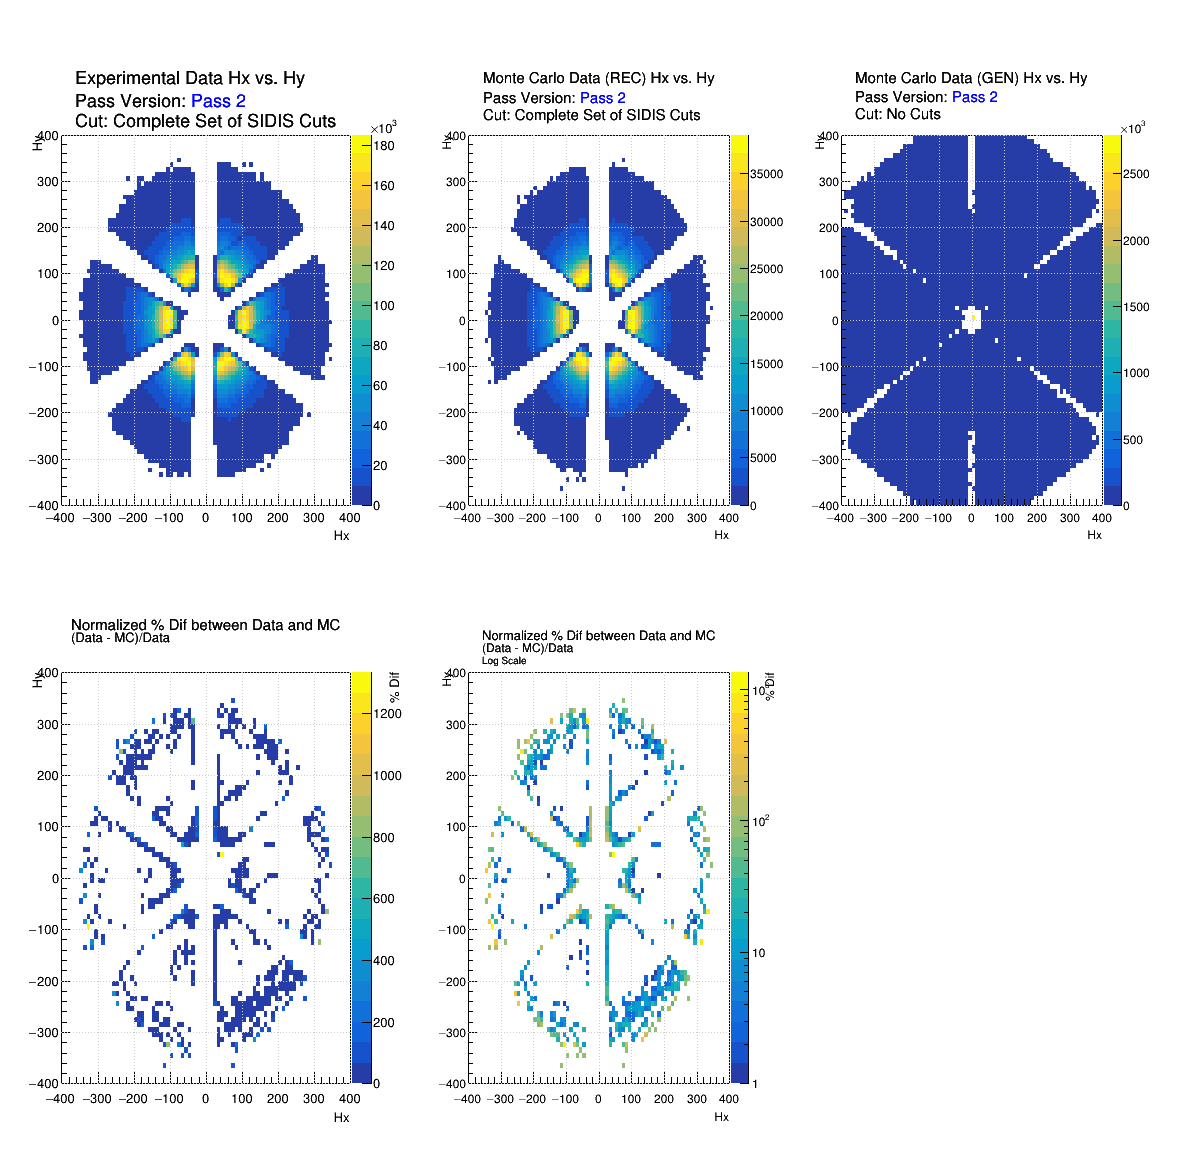

In [ ]:
# canvas = Canvas_Create(Name="Name_New", Num_Columns=3, Num_Rows=2, Size_X=1200, Size_Y=1200, cd_Space=0)
# # ROOT.gPad.SetLogz(1)
# canvas.Draw()

# Draw_Canvas(canvas=canvas, cd_num=1, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
# Histo_rdf_2D.Draw("colz")
# Draw_Canvas(canvas=canvas, cd_num=2, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
# Histo_mdf_2D.Draw("colz")
# Draw_Canvas(canvas=canvas, cd_num=3, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
# Histo_gdf_2D.Draw("colz")

# Draw_Canvas(canvas=canvas, cd_num=4, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
# Histo_ratio_2D.Draw("colz")

# Draw_Canvas(canvas=canvas, cd_num=5, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
# Histo_ratio_2D_Log = Histo_ratio_2D.Clone("Logscale")
# Histo_ratio_2D_Log.SetTitle("".join(["#splitline{", str(Histo_ratio_2D.GetTitle()), "}{#scale[1.5]{Log Scale}}"]))
# Histo_ratio_2D_Log.Draw("colz")
# ROOT.gPad.SetLogz(1)

# # Draw_Canvas(canvas=canvas, cd_num=6, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
# # # Histo_ratio_2D.GetXaxis().SetRangeUser(-400, 0)
# # # Histo_ratio_2D.GetYaxis().SetRangeUser(20, 400)
# # Histo_ratio_2D.Draw("lego")
# # # ROOT.gPad.SetLogz(1)
# print("Done")

# print(f"Histo_mdf_Total = {Histo_mdf_Total}")
# print(f"Histo_rdf_Total = {Histo_rdf_Total}")
# print(f"Histo_gdf_Total = {Histo_gdf_Total}")


In [14]:
# """
# Cut_Condition = ((x - center_x)**2 + (y - center_y)**2 < radius**2)
# and (not ((y > (-0.4803)*x +  (19.0945)) and (y <   (0.5236)*x +  (-27.0866))))
# and (not ((y >  (0.6749)*x +  (17.7778)) and (y <   (33.832)*x + (-877.4638))))
# and (not ((y > (-0.6442)*x +  (29.6081)) and (y < (-19.0013)*x + (-430.0535))))
# and (not ((y >  (0.4717)*x +  (16.5094)) and (y <  (-0.4717)*x +  (-16.5094))))
# and (not ((y <   (0.669)*x + (-26.0705)) and (y >  (12.6372)*x +  (301.8584))))
# and (not ((y < (-0.5909)*x + (-32.4477)) and (y > (-21.0059)*x +  (363.1938))))
# or              ((x - center_x)**2 + (y - center_y)**2 > radius**2)"""

# # test = """radius = ((x*x) + (y*y));
# test = """Cut_Condition = '(radius < (325*325))
# and (not ((y  > (-0.4803)*x +  (19.0945)) and (y <   (0.5236)*x +  (-27.0866))))
# and (not ((y  >  (0.6749)*x +  (17.7778)) and (y <   (33.832)*x + (-877.4638))))
# and (not ((y  > (-0.6442)*x +  (29.6081)) and (y < (-19.0013)*x + (-430.0535))))
# and (not ((y  >  (0.4717)*x +  (16.5094)) and (y <  (-0.4717)*x +  (-16.5094))))
# and (not ((y  <   (0.669)*x + (-26.0705)) and (y >  (12.6372)*x +  (301.8584))))
# and (not ((y  < (-0.5909)*x + (-32.4477)) and (y > (-21.0059)*x +  (363.1938)))))
# or (radius > (325*325))'"""

# test = str(test.replace("x", "Hx")).replace("y", "Hy")
# test = test.replace("and", "&&")
# test = test.replace("or",  "||")
# test = test.replace("not ", "!")
# test = test.replace("\n", " ")
# test = test.replace(";", ";\n\n")
# test = test.replace("radius", "((Hx*Hx) + (Hy*Hy))")
# while("  " in test):
#     test = test.replace("  ", " ")
# print(test)

## PID Plots

In [3]:
# Also defined in ExtraAnalysisCodeValues.py
def PID_Histo_Label(Histogram):
    # Define the mapping and the histogram setup in Python
    pid_map = {-2212: (1,  "Anti-Proton"),
                -321: (2,  "Kaon (K^{-})"),
                -211: (3,  "#pi^{-} Pion"),
                  11: (4,  "Electron"),
                   0: (5,  "Unidentified"),
                 -11: (6,  "Positron"),
                 -13: (7,  "#mu^{+} Muon"),
                 211: (8,  "#pi^{+} Pion"),
                 321: (9,  "Kaon (K^{+})"),
                2212: (10, "Proton")}
    for pid, (idx, name) in pid_map.items():
        Histogram.GetXaxis().SetBinLabel(idx, name)
        Histogram.GetYaxis().SetBinLabel(idx, name)
    Histogram.GetXaxis().SetBinLabel(11, "Other")
    Histogram.GetYaxis().SetBinLabel(11, "Other")
    Histogram.GetXaxis().SetLabelSize(0.0375)
    Histogram.GetYaxis().SetLabelSize(0.0375)
    
    return Histogram

print("Done")

Done



Miss_Electron = 0.0398517
UnId_Electron = 0.0216831

Miss_Pip_Pion = 0.7428475
UnId_Pip_Pion = 1.1259297


Total (Identified) Background   = 0.7826992
Total (Unidentified) Background = 1.1476129
Total Background                = 1.9303121


Done


Warning in <TCanvas::Constructor>: Deleting canvas with same name: Name


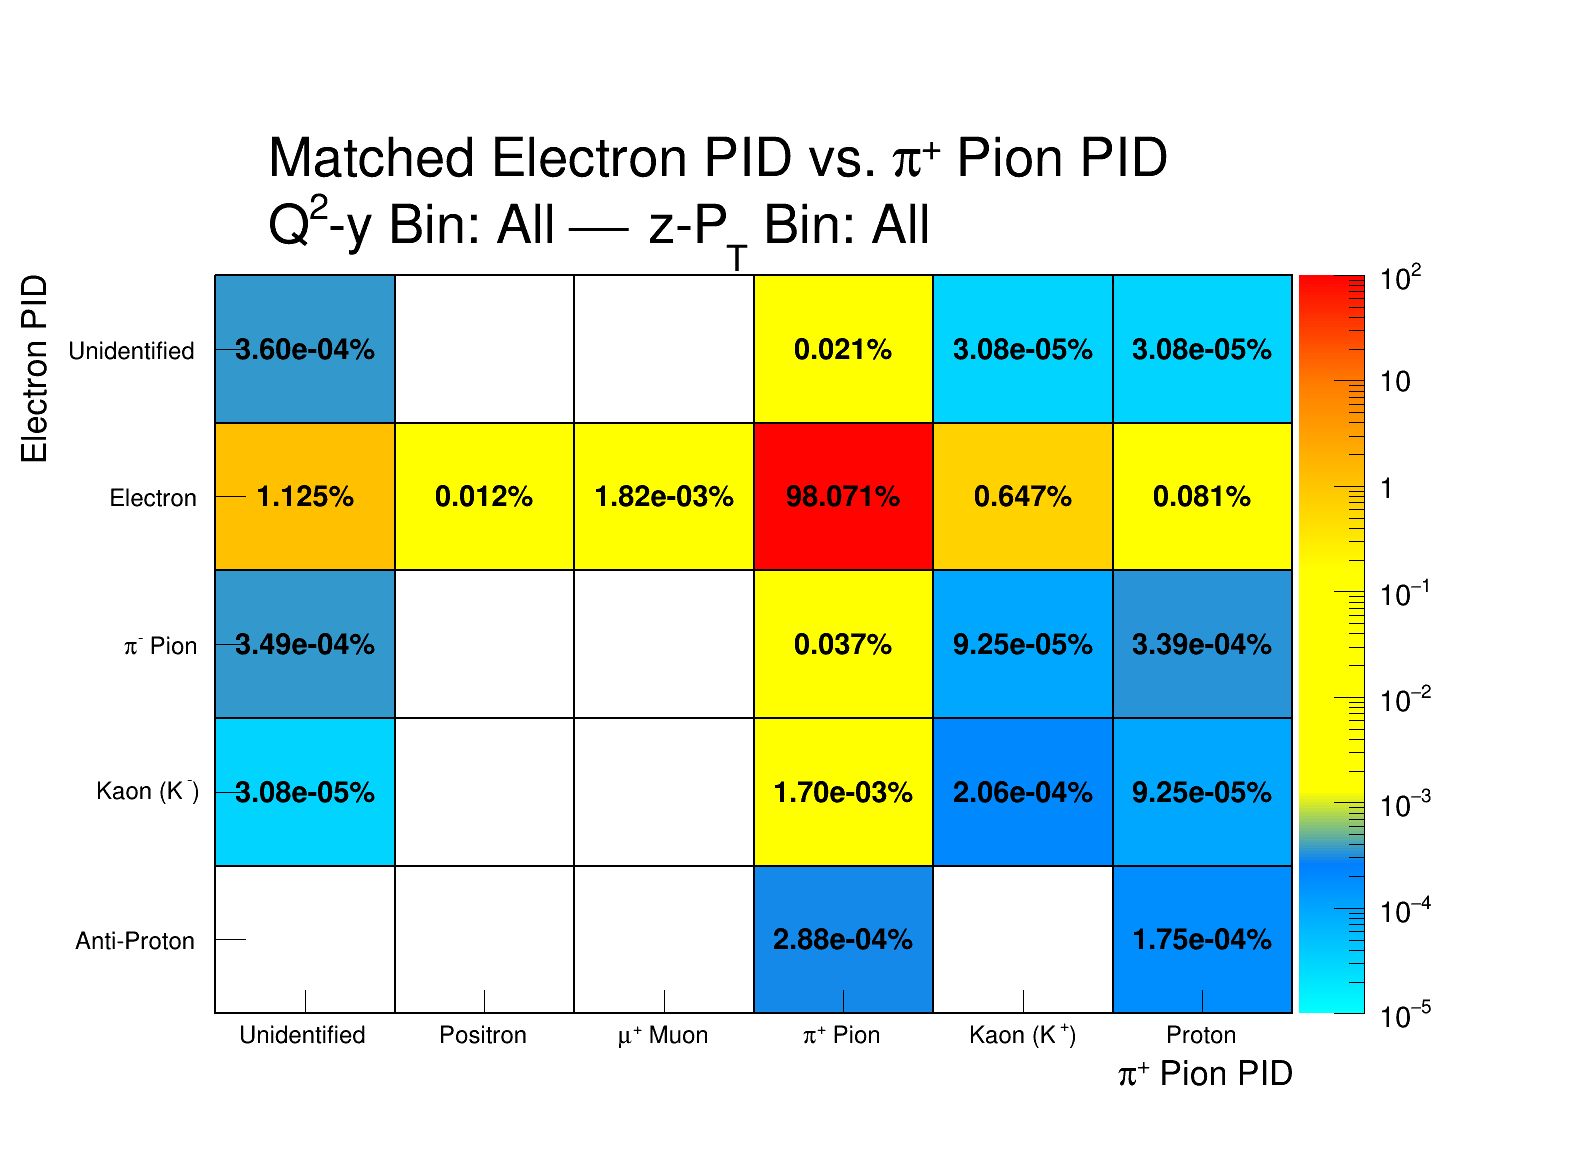

In [39]:
from array import array  # Correct import for the array
cut = "cut_Complete_SIDIS_eS6o"
cut = "cut_Complete_SIDIS"
# cut = "no_cut"

Q2_y_Bin = "All"
# Q2_y_Bin = "14"
Histo_Name_mdf = f"((Histo-Group='Normal_2D'), (Data-Type='mdf'), (Data-Cut='{cut}'), (Smear-Type=''), (Binning-Type='Y_bin'-[Q2-y-Bin={Q2_y_Bin}, z-PT-Bin=All]), (Var-D1='PID_el_idx'-[NumBins=11, MinBin=0.5, MaxBin=11.5]), (Var-D2='PID_pip_idx'-[NumBins=11, MinBin=0.5, MaxBin=11.5]))"
Histo_Name_bdf = str(Histo_Name_mdf.replace("Normal_2D", "Normal_Background_2D"))
# Histo_Name_rdf = str(Histo_Name_mdf.replace("mdf", "rdf"))
# Histo_Name_gdf = str(Histo_Name_mdf.replace("mdf", "gdf")).replace(f"{cut}", "no_cut")

# Histo_Name_Q2_y_mdf = f"((Histo-Group='Normal_2D'), (Data-Type='mdf'), (Data-Cut='{cut}'), (Smear-Type=''), (Binning-Type='Y_bin'-[Q2-y-Bin={Q2_y_Bin}, z-PT-Bin=All]), (Var-D1='Q2'-[NumBins=280, MinBin=0, MaxBin=14]), (Var-D2='y'-[NumBins=100, MinBin=0, MaxBin=1]))"
# Histo_Name_Q2_y_bdf = str(Histo_Name_Q2_y_mdf.replace("Normal_2D", "Normal_Background_2D"))
# # Histo_Name_Q2_y_rdf = str(Histo_Name_Q2_y_mdf.replace("mdf", "rdf"))
# # Histo_Name_Q2_y_gdf = str(Histo_Name_Q2_y_mdf.replace("mdf", "gdf")).replace(f"{cut}", "no_cut")

# Histo_Name_z_pT_mdf = f"((Histo-Group='Normal_2D'), (Data-Type='mdf'), (Data-Cut='{cut}'), (Smear-Type=''), (Binning-Type='Y_bin'-[Q2-y-Bin={Q2_y_Bin}, z-PT-Bin=All]), (Var-D1='z'-[NumBins=120, MinBin=0, MaxBin=1.2]), (Var-D2='pT'-[NumBins=200, MinBin=0, MaxBin=2.0]))"
# Histo_Name_z_pT_bdf = str(Histo_Name_z_pT_mdf.replace("Normal_2D", "Normal_Background_2D"))
# # Histo_Name_z_pT_rdf = str(Histo_Name_z_pT_mdf.replace("mdf", "rdf"))
# # Histo_Name_z_pT_gdf = str(Histo_Name_z_pT_mdf.replace("mdf", "gdf")).replace(f"{cut}", "no_cut")


# print(f"Histo_Name_mdf = {Histo_Name_mdf}")


Histo_mdf_3D      = mdf.Get(str(Histo_Name_mdf))
Histo_bdf_3D      = mdf.Get(str(Histo_Name_bdf))
# Histo_rdf_3D      = rdf.Get(str(Histo_Name_rdf))
# Histo_gdf_3D      = gdf.Get(str(Histo_Name_gdf))

# Histo_mdf_Q2_y_3D = mdf.Get(str(Histo_Name_Q2_y_mdf))
# Histo_bdf_Q2_y_3D = mdf.Get(str(Histo_Name_Q2_y_bdf))
# Histo_rdf_Q2_y_3D = rdf.Get(str(Histo_Name_Q2_y_rdf))
# Histo_gdf_Q2_y_3D = gdf.Get(str(Histo_Name_Q2_y_gdf))

# Histo_mdf_z_pT_3D = mdf.Get(str(Histo_Name_z_pT_mdf))
# Histo_bdf_z_pT_3D = mdf.Get(str(Histo_Name_z_pT_bdf))
# Histo_rdf_z_pT_3D = rdf.Get(str(Histo_Name_z_pT_rdf))
# Histo_gdf_z_pT_3D = gdf.Get(str(Histo_Name_z_pT_gdf))



z_pT_Bin_Unfold = "All"


if(z_pT_Bin_Unfold in [0, "All"]):
    Histo_mdf_3D.GetXaxis().SetRangeUser(1, 50)
    Histo_bdf_3D.GetXaxis().SetRangeUser(1, 50)
    # Histo_rdf_3D.GetXaxis().SetRangeUser(1, 50)
    # Histo_gdf_3D.GetXaxis().SetRangeUser(1, 50)
    
    # Histo_mdf_Q2_y_3D.GetXaxis().SetRangeUser(1, 50)
    # Histo_bdf_Q2_y_3D.GetXaxis().SetRangeUser(1, 50)
    # Histo_rdf_Q2_y_3D.GetXaxis().SetRangeUser(1, 50)
    # Histo_gdf_Q2_y_3D.GetXaxis().SetRangeUser(1, 50)
    
    # Histo_mdf_z_pT_3D.GetXaxis().SetRangeUser(1, 50)
    # Histo_bdf_z_pT_3D.GetXaxis().SetRangeUser(1, 50)
    # Histo_rdf_z_pT_3D.GetXaxis().SetRangeUser(1, 50)
    # Histo_gdf_z_pT_3D.GetXaxis().SetRangeUser(1, 50)
else:
    Histo_mdf_3D.GetXaxis().SetRangeUser(z_pT_Bin_Unfold, z_pT_Bin_Unfold)
    Histo_bdf_3D.GetXaxis().SetRangeUser(z_pT_Bin_Unfold, z_pT_Bin_Unfold)
    # Histo_rdf_3D.GetXaxis().SetRangeUser(z_pT_Bin_Unfold, z_pT_Bin_Unfold)
    # Histo_gdf_3D.GetXaxis().SetRangeUser(z_pT_Bin_Unfold, z_pT_Bin_Unfold)
    
    # Histo_mdf_Q2_y_3D.GetXaxis().SetRangeUser(z_pT_Bin_Unfold, z_pT_Bin_Unfold)
    # Histo_bdf_Q2_y_3D.GetXaxis().SetRangeUser(z_pT_Bin_Unfold, z_pT_Bin_Unfold)
    # Histo_rdf_Q2_y_3D.GetXaxis().SetRangeUser(z_pT_Bin_Unfold, z_pT_Bin_Unfold)
    # Histo_gdf_Q2_y_3D.GetXaxis().SetRangeUser(z_pT_Bin_Unfold, z_pT_Bin_Unfold)
    
    # Histo_mdf_z_pT_3D.GetXaxis().SetRangeUser(z_pT_Bin_Unfold, z_pT_Bin_Unfold)
    # Histo_bdf_z_pT_3D.GetXaxis().SetRangeUser(z_pT_Bin_Unfold, z_pT_Bin_Unfold)
    # Histo_rdf_z_pT_3D.GetXaxis().SetRangeUser(z_pT_Bin_Unfold, z_pT_Bin_Unfold)
    # Histo_gdf_z_pT_3D.GetXaxis().SetRangeUser(z_pT_Bin_Unfold, z_pT_Bin_Unfold)
    
    
    
Histo_mdf_2D = Histo_mdf_3D.Project3D("yz")
Histo_bdf_2D = Histo_bdf_3D.Project3D("yz")


Histo_PID = Histo_mdf_2D.Clone(f"Histo_PID_Q2_y_{Q2_y_Bin}_z_pT_{z_pT_Bin_Unfold}")
Histo_PID.Add(Histo_bdf_2D)

Histo_PID_Title = "".join(["#splitline{Matched Electron PID vs. #pi^{+} Pion PID}{Q^{2}-y Bin: ", str(Q2_y_Bin), " #topbar z-P_{T} Bin: ", str(z_pT_Bin_Unfold), "}"])

Histo_PID.SetTitle(Histo_PID_Title)

Histo_PID_Total = Histo_PID.GetEntries()
Histo_PID.Scale(100/Histo_PID_Total)

# Histo_PID.SetMarkerSize(0.8)
# Histo_PID.GetZaxis().SetLabelSize(0.05)

Histo_PID.SetMarkerSize(1.5)
Histo_PID.GetZaxis().SetLabelSize(0.03)

Histo_PID.SetLineColor(ROOT.kBlack)
Histo_PID.SetLineWidth(10)

Histo_PID = PID_Histo_Label(Histogram=Histo_PID)

ROOT.gStyle.SetTitleOffset(2.95, 'y')
ROOT.gStyle.SetGridColor(17)
ROOT.gStyle.SetPadGridX(0)
ROOT.gStyle.SetPadGridY(0)


Histo_PID.GetYaxis().SetRangeUser(0.5,  5.5)
Histo_PID.GetXaxis().SetRangeUser(4.5, 10.5)
# Assuming 'Histo_PID' is your TH2D histogram object
# Histo_PID.GetZaxis().SetRangeUser(1e-5,    2.2)
Histo_PID.GetZaxis().SetRangeUser(1e-5,    100)

# # Define the range of the color palette
# stops = array('d', [0.00, 0.05, 0.10, 0.50, 0.90, 1.0])  # Define transition points
# red   = array('d', [0.0, 0.0, 1.0, 1.0, 1.0, 1.0])  # Colors transitioning from blue to yellow to red
# green = array('d', [1.0, 0.5, 1.0, 1.0, 0.5, 0.0])
# blue  = array('d', [1.0, 1.0, 0.0, 0.0, 0.0, 0.0])

# # Create the custom color palette
# n_colors = 255
# ROOT.TColor.CreateGradientColorTable(len(stops), stops, red, green, blue, n_colors)
# ROOT.gStyle.SetNumberContours(n_colors)



# # Create a custom palette
# stops = array('d', [0, 0.1, 0.5, 2.0])  # Define transition points
# red   = array('d', [1.0, 0.0, 1.0, 1.0])  # Colors transitioning from white to yellow to blue
# green = array('d', [1.0, 0.0, 1.0, 0.0])
# blue  = array('d', [1.0, 1.0, 0.0, 0.0])
# ROOT.TColor.CreateGradientColorTable(len(stops), stops, red, green, blue, 255)
# ROOT.gStyle.SetNumberContours(255)

# Define the range of the color palette
# stops = array('d', [0.00, 0.50, 0.65, 0.70, 1.05, 2.0])  # Modify stops for transition
# stops = array('d', [0.00, 0.65, 0.75, 0.90, 1.05, 2.0])  # Modify stops for transition

# # stops = array('d', [0.00, 0.8, 0.9, 0.90, 1.05, 2.0])  # Modify stops for transition



# red   = array('d', [0.0, 0.0, 0.2, 0.5, 1.0, 1.0])  # Blue to yellow to red
# green = array('d', [1.0, 0.5, 1.0, 1.0, 0.5, 0.0])
# blue  = array('d', [2.0, 1.5, 0.95, 0.5, 0.0, 0.0])
# # red   = array('d', [0.0, 0.0, 1.0, 1.0, 1.0, 1.0])  # Blue to yellow to red
# # green = array('d', [1.0, 0.5, 1.0, 1.0, 0.5, 0.0])
# # blue  = array('d', [1.0, 1.0, 0.0, 0.0, 0.0, 0.0])

# # Create the custom color palette
# n_colors = 255
# ROOT.TColor.CreateGradientColorTable(len(stops), stops, red, green, blue, n_colors)
# ROOT.gStyle.SetNumberContours(n_colors)



stops = array('d', [0.00, 0.65, 0.75, 0.90, 1.05, 2.0])
red   = array('d', [0.0, 0.0, 0.2, 0.5, 1.0, 1.0])
green = array('d', [1.0, 0.5, 1.0, 1.0, 0.5, 0.0])
blue  = array('d', [2.0, 1.5, 0.95, 0.5, 0.0, 0.0])
n_colors = 255

# Initialize the color gradient
stops = array('d', [0.00, 0.65, 0.75, 0.90, 1.05, 2.0])
red   = array('d', [0.0, 0.0, 0.2, 0.5, 1.0, 1.0])
green = array('d', [1.0, 0.5, 1.0, 1.0, 0.5, 0.0])
blue  = array('d', [2.0, 1.5, 0.95, 0.5, 0.0, 0.0])
n_colors = 255
ROOT.TColor.CreateGradientColorTable(len(stops), stops, red, green, blue, n_colors)
ROOT.gStyle.SetNumberContours(n_colors)

# Function to choose format based on value
def choose_format(value):
    if((value < 0.01 or value > 100) and not (value == 0)):
        return "{:.2e}".format(value)  # Scientific notation
    else:
        return "{:.3f}".format(value)  # Fixed point notation


canvas_main  = Canvas_Create(Name="Name", Num_Columns=1, Num_Rows=1, Size_X=1600, Size_Y=1200, cd_Space=0)
canvas_main.Draw()
Draw_Canvas(canvas=canvas_main, cd_num=1, left_add=0.15, right_add=0.1, up_add=0.15, down_add=0.15)
# Histo_PID.DrawNormalized("col text")
Histo_PID.Draw("colz")
ROOT.gPad.SetLogz(1)

canvas_main.Update()
box, count = {}, 0
for ii in range(5, Histo_PID.GetNbinsX()):
    for jj in range(1, Histo_PID.GetNbinsY() - 5):
        count += 1
        x1 = Histo_PID.GetXaxis().GetBinLowEdge(ii)
        x2 = Histo_PID.GetXaxis().GetBinUpEdge(ii)
        y1 = Histo_PID.GetYaxis().GetBinLowEdge(jj)
        y2 = Histo_PID.GetYaxis().GetBinUpEdge(jj)
        box[count] = ROOT.TBox(x1, y1, x2, y2)
        box[count].SetFillStyle(0)
        box[count].SetLineColor(ROOT.kBlack)
        box[count].SetLineWidth(2)
        box[count].Draw("l same")
        
# Draw text manually based on the condition
t = {}
# for i in range(1, Histo_PID.GetNbinsX() + 1):
for ii in range(5, Histo_PID.GetNbinsX()):
#     for j in range(1, Histo_PID.GetNbinsY() + 1):
    for jj in range(1, Histo_PID.GetNbinsY() - 5):
        value = Histo_PID.GetBinContent(ii, jj)
        text  = choose_format(value)
        if(str(text) not in ["0.00", "0.000", "0.0000"]):
            # Create text objects and place them at the center of each bin
            t[f"{ii}_{jj}"] = ROOT.TText(Histo_PID.GetXaxis().GetBinCenter(ii), Histo_PID.GetYaxis().GetBinCenter(jj), f"{text}%")
            t[f"{ii}_{jj}"].SetTextAlign(22)  # Center alignment
            t[f"{ii}_{jj}"].SetTextSize(0.03)  # Set text size
            t[f"{ii}_{jj}"].Draw("same")  # Draw text on the canvas
        
# ROOT.gStyle.SetPaintTextFormat(".2f")
canvas_main.Update()
canvas_main.Draw()

bin_num = 0
Miss_Electron, UnId_Electron, Miss_Pip_Pion, UnId_Pip_Pion = 0, 0, 0, 0
for ii in range(1, Histo_PID.GetNbinsX() + 1):
    for jj in range(1, Histo_PID.GetNbinsY() + 1):
        X_bin_label = Histo_PID.GetXaxis().GetBinLabel(ii)
        Y_bin_label = Histo_PID.GetYaxis().GetBinLabel(jj)
        # print(f"Bin {bin_num}:\nX-axis: {X_bin_label}\nY-axis: {Y_bin_label}\n")
        bin_num += 1
        if(Y_bin_label not in ["Electron",     "Unidentified"]):
            Miss_Electron += Histo_PID.GetBinContent(ii, jj)
        if(Y_bin_label     in ["Unidentified"]):
            UnId_Electron += Histo_PID.GetBinContent(ii, jj)
        if(X_bin_label not in ["#pi^{+} Pion", "Unidentified"]):
            Miss_Pip_Pion += Histo_PID.GetBinContent(ii, jj)
        if(X_bin_label     in ["Unidentified"]):
            UnId_Pip_Pion += Histo_PID.GetBinContent(ii, jj)
            
print(f"\nMiss_Electron = {round(Miss_Electron, 7)}")
print(f"UnId_Electron = {round(UnId_Electron,   7)}")
print(f"\nMiss_Pip_Pion = {round(Miss_Pip_Pion, 7)}")
print(f"UnId_Pip_Pion = {round(UnId_Pip_Pion,   7)}")

print(f"\n\nTotal (Identified) Background   = {round(Miss_Electron + Miss_Pip_Pion, 7)}")
print(f"Total (Unidentified) Background = {round(UnId_Electron + UnId_Pip_Pion, 7)}")
print(f"Total Background                = {round(Miss_Electron + UnId_Electron + Miss_Pip_Pion + UnId_Pip_Pion, 7)}\n\n")

# canvas_main  = Canvas_Create(Name="Name", Num_Columns=1, Num_Rows=2, Size_X=1200, Size_Y=1200, cd_Space=0)
# canvas_upper = canvas_main.cd(1)
# # canvas_lower = canvas_main.cd(2)
# canvas_upper.Divide(3, 1)
# # canvas_lower.Divide(3, 1)
# # # ROOT.gPad.SetLogz(1)
# canvas_main.Draw()
# Draw_Canvas(canvas=canvas_upper, cd_num=1, left_add=0.1, right_add=0.1, up_add=0.1, down_add=0.1)
# Histo_mdf_2D.Draw("colz")
# Draw_Canvas(canvas=canvas_upper, cd_num=2, left_add=0.1, right_add=0.1, up_add=0.1, down_add=0.1)
# Histo_bdf_2D.Draw("colz")
# # Draw_Canvas(canvas=canvas_upper, cd_num=3, left_add=0.1, right_add=0.1, up_add=0.1, down_add=0.1)
# # Histo_rdf_3D.Draw("colz")

"""Miss_Electron = 1.0185815
UnId_Electron = 0.9978742

Miss_Pip_Pion = 0.6121589
UnId_Pip_Pion = 4.1757504


Total Background = 6.804365"""


"""Miss_Electron = 0.0407491
UnId_Electron = 0.0342657

Miss_Pip_Pion = 0.7387616
UnId_Pip_Pion = 1.1268983


Total (Identified) Background   = 0.7795108
Total (Unidentified) Background = 1.161164
Total Background                = 1.9406748"""


"""Miss_Electron = 0.0387346
UnId_Electron = 0.0372737

Miss_Pip_Pion = 0.7499048
UnId_Pip_Pion = 1.1538722


Total (Identified) Background   = 0.7886394
Total (Unidentified) Background = 1.1911459
Total Background                = 1.9797853"""

print("Done")



Ave_Miss_Electron       = 0.0237
Ave_UnId_Electron       = 0.00295
Ave_Miss_Pip_Pion       = 0.70294
Ave_UnId_Pip_Pion       = 1.01909
Identified___Background = 0.72664
	    (% of total = 41.5536%)
Unidentified_Background = 1.02204
	    (% of total = 58.4464%)
Total_Background        = 1.74868
	(Non-Background = 98.25132)
Min_Background          = [1.4082303, 'Q2-y: 11 - z-pT: All']
	(Non-Background = 98.5917697)
Max_Background          = [2.5114932, 'Q2-y: 9 - z-pT: All']
	(Non-Background = 97.4885068)



Done


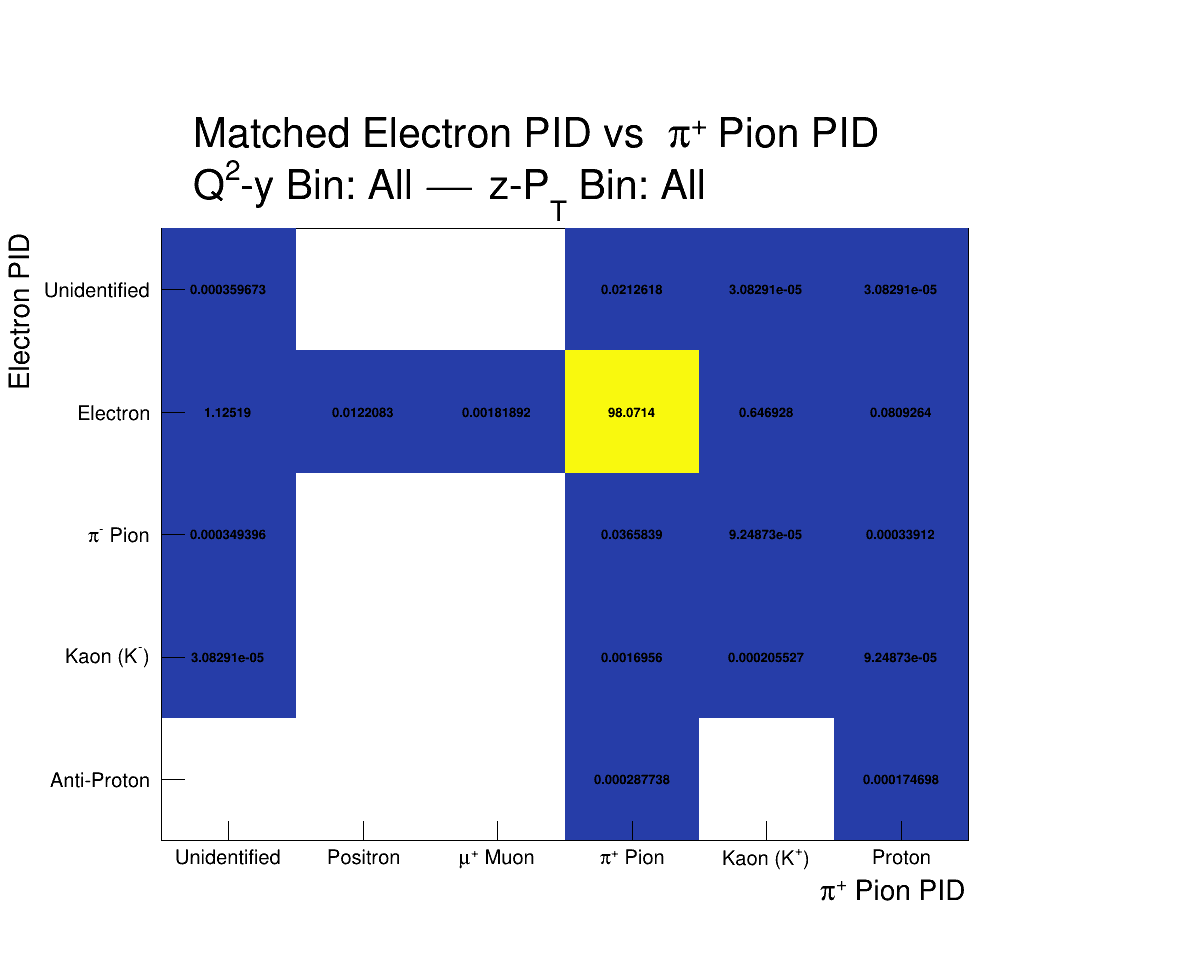

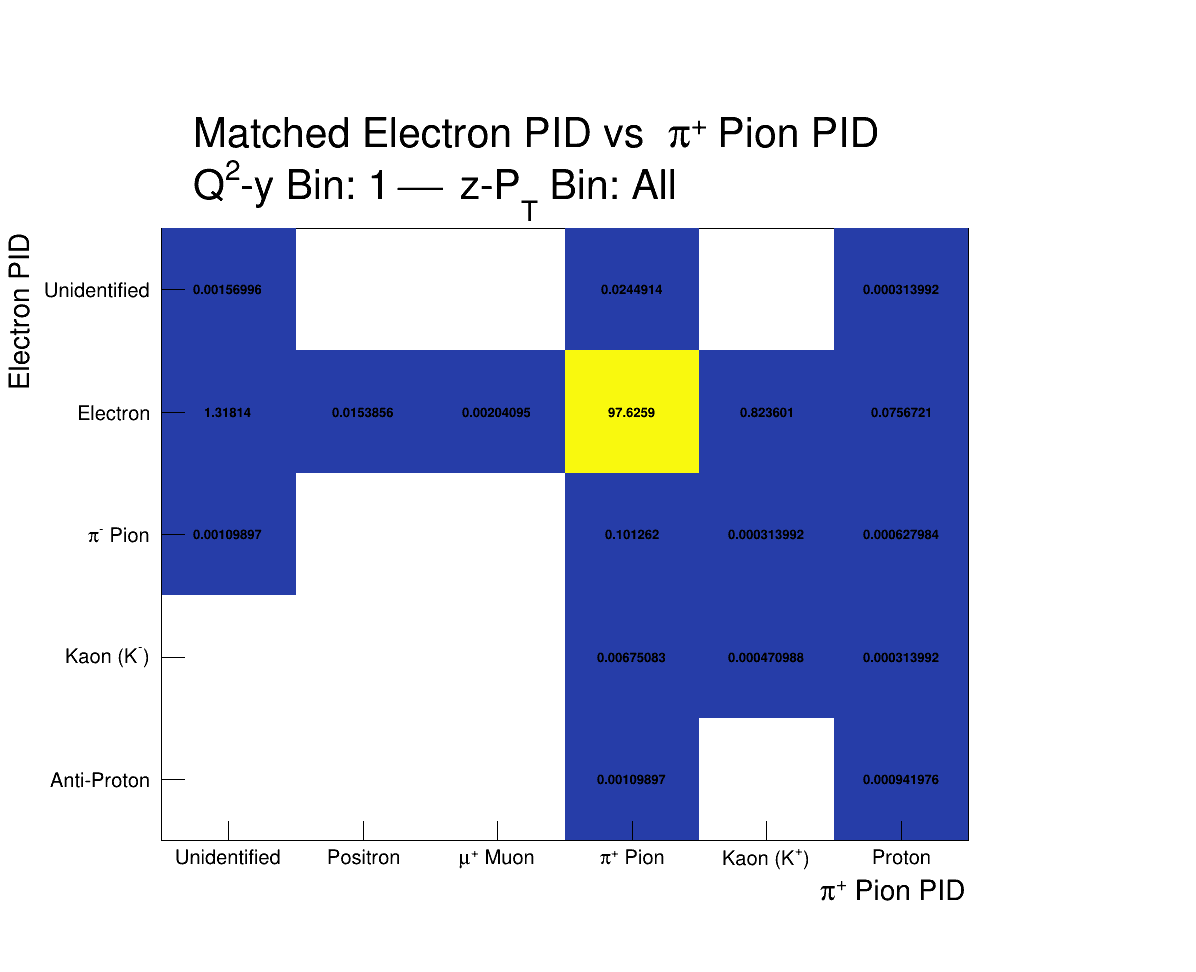

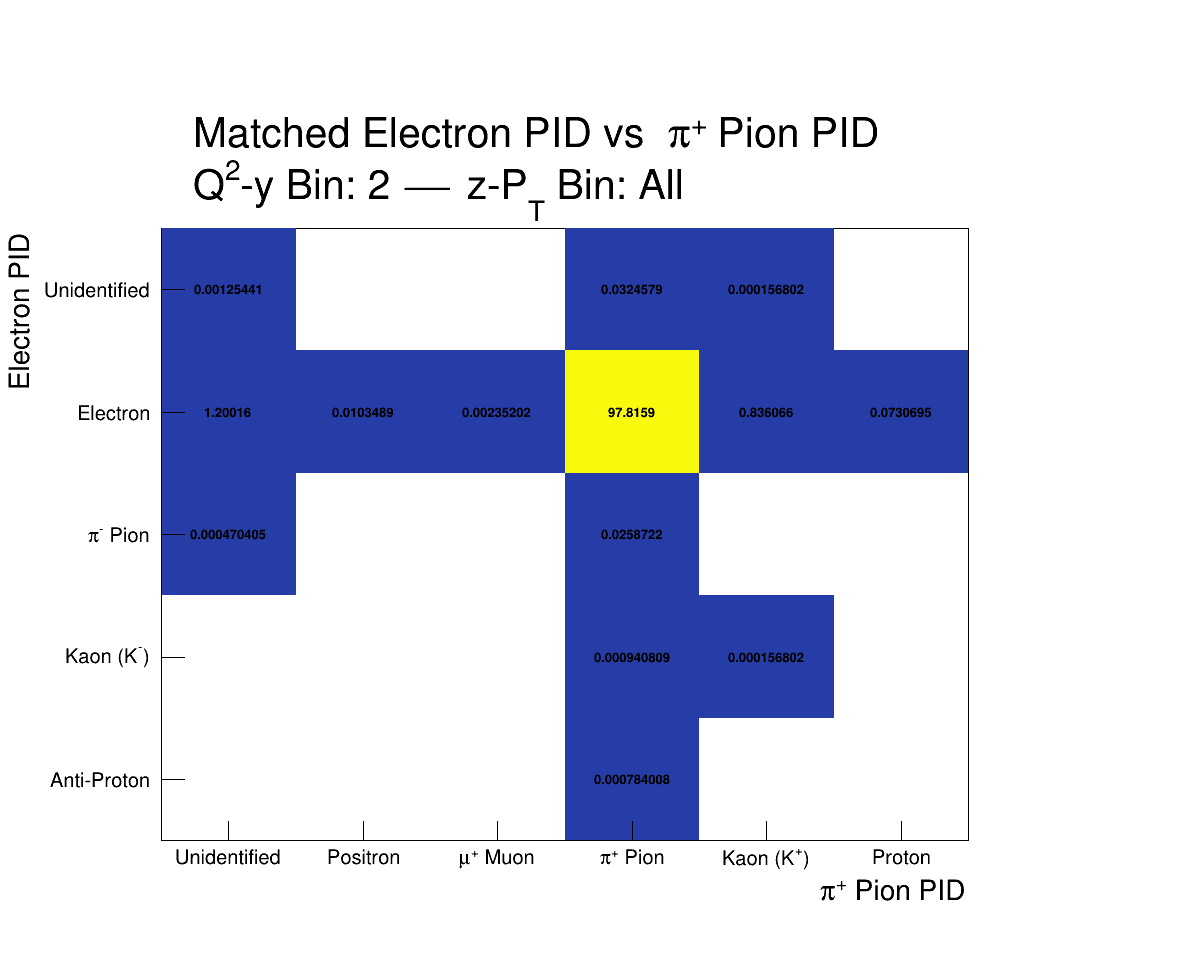

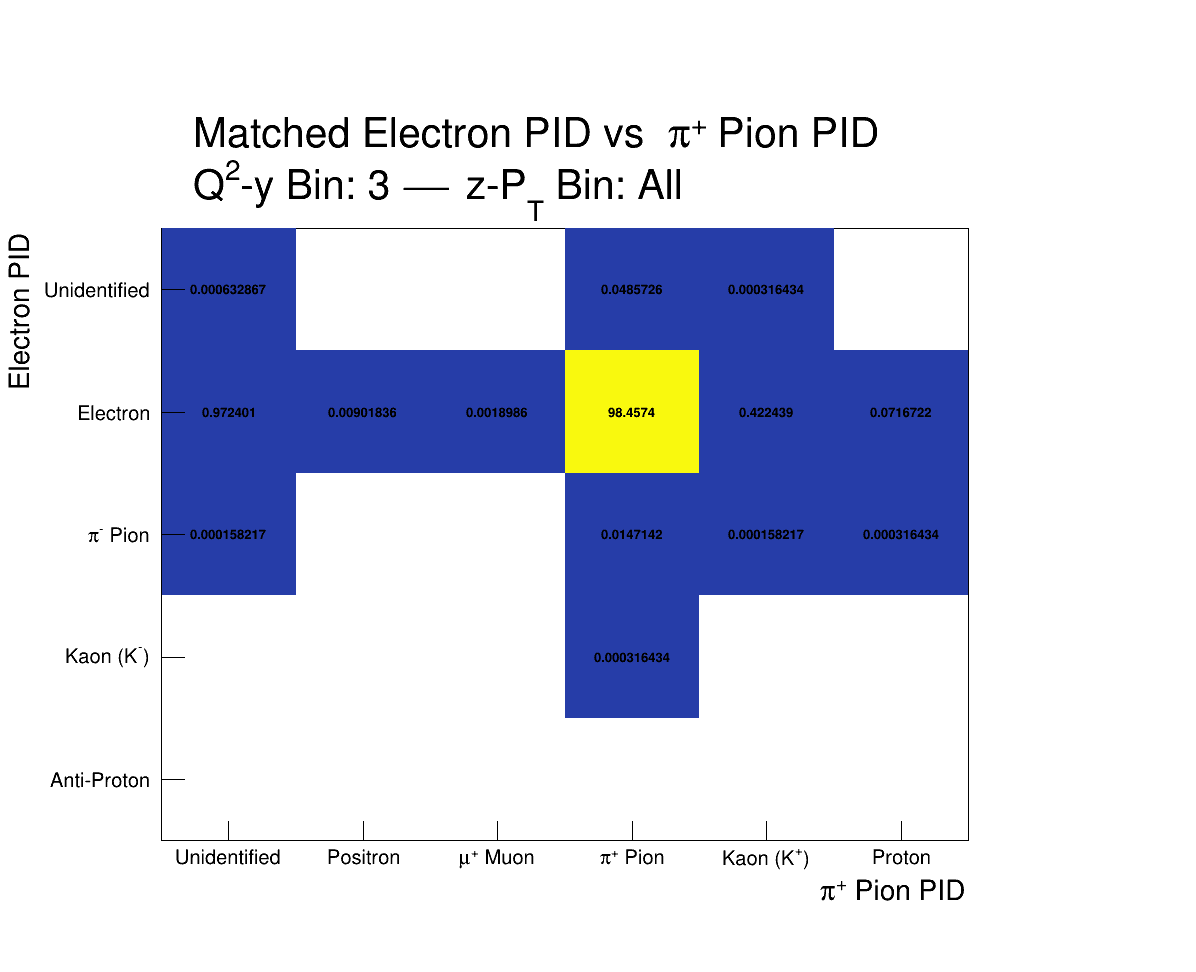

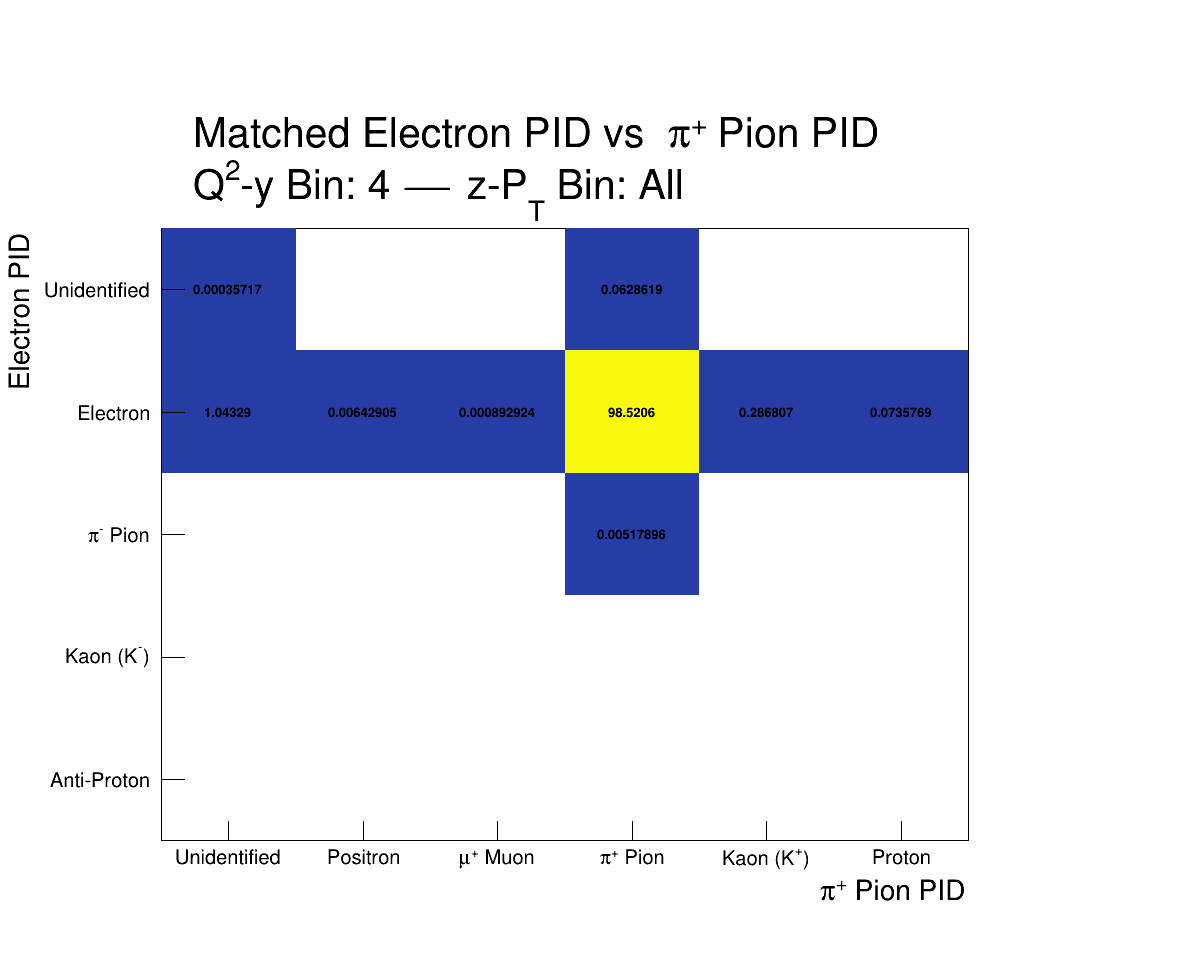

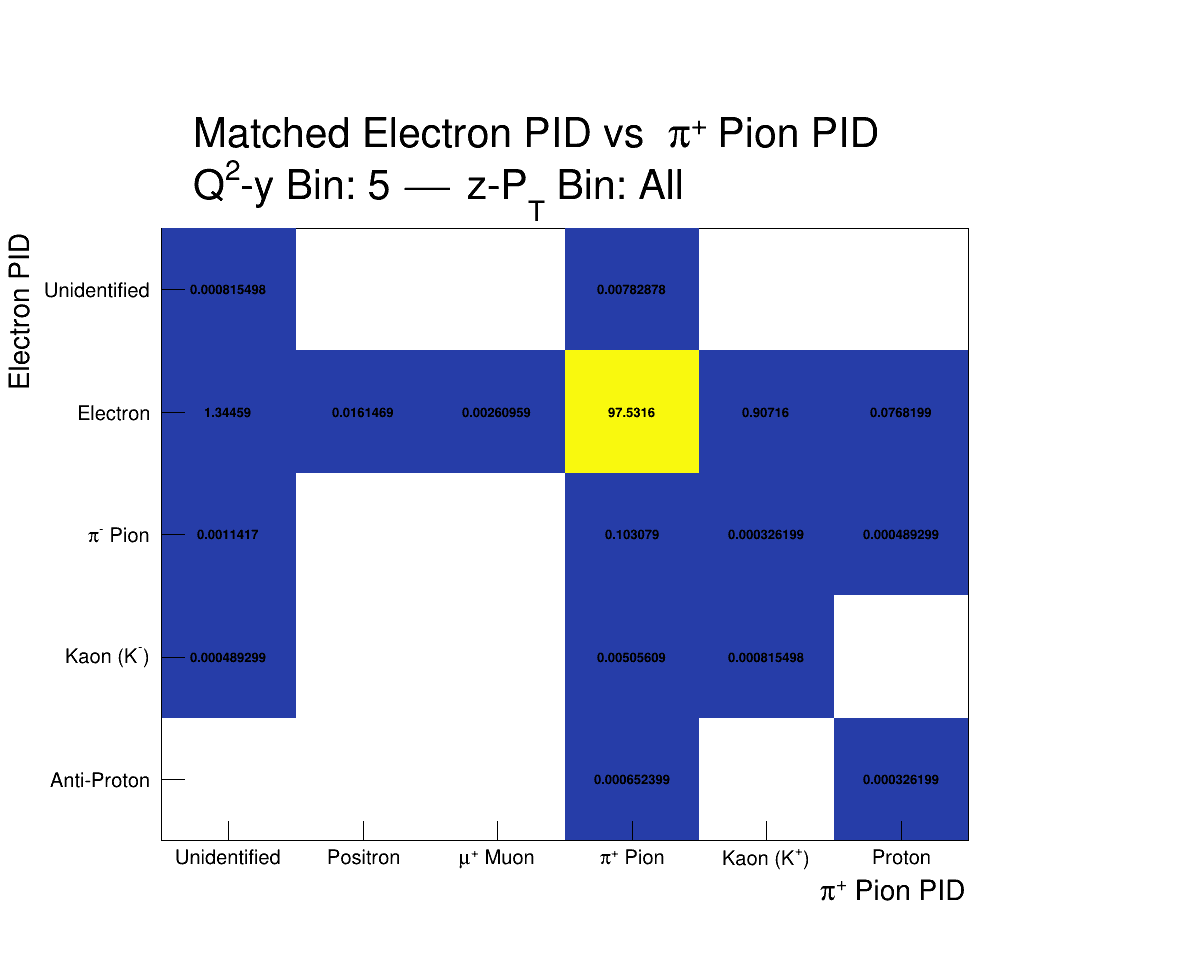

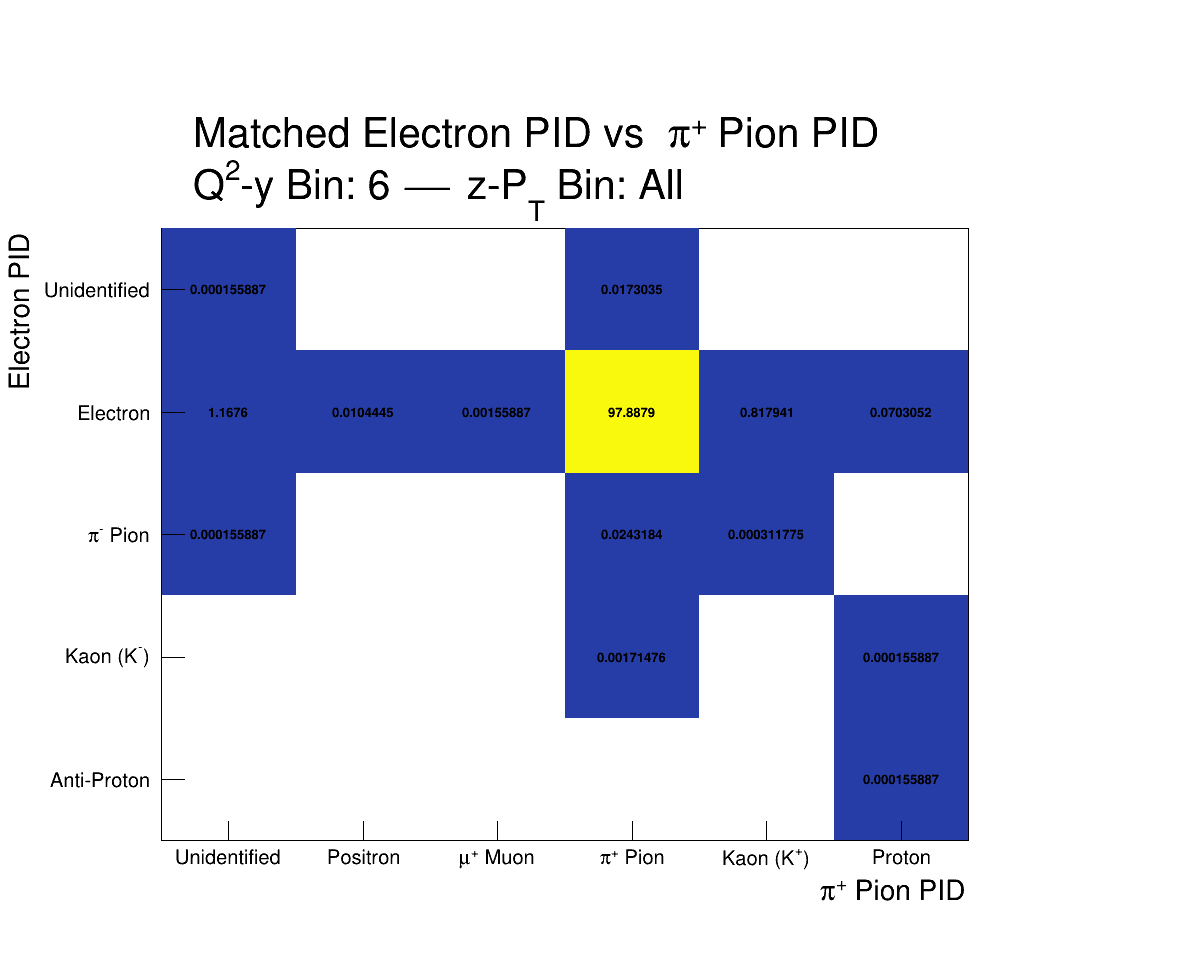

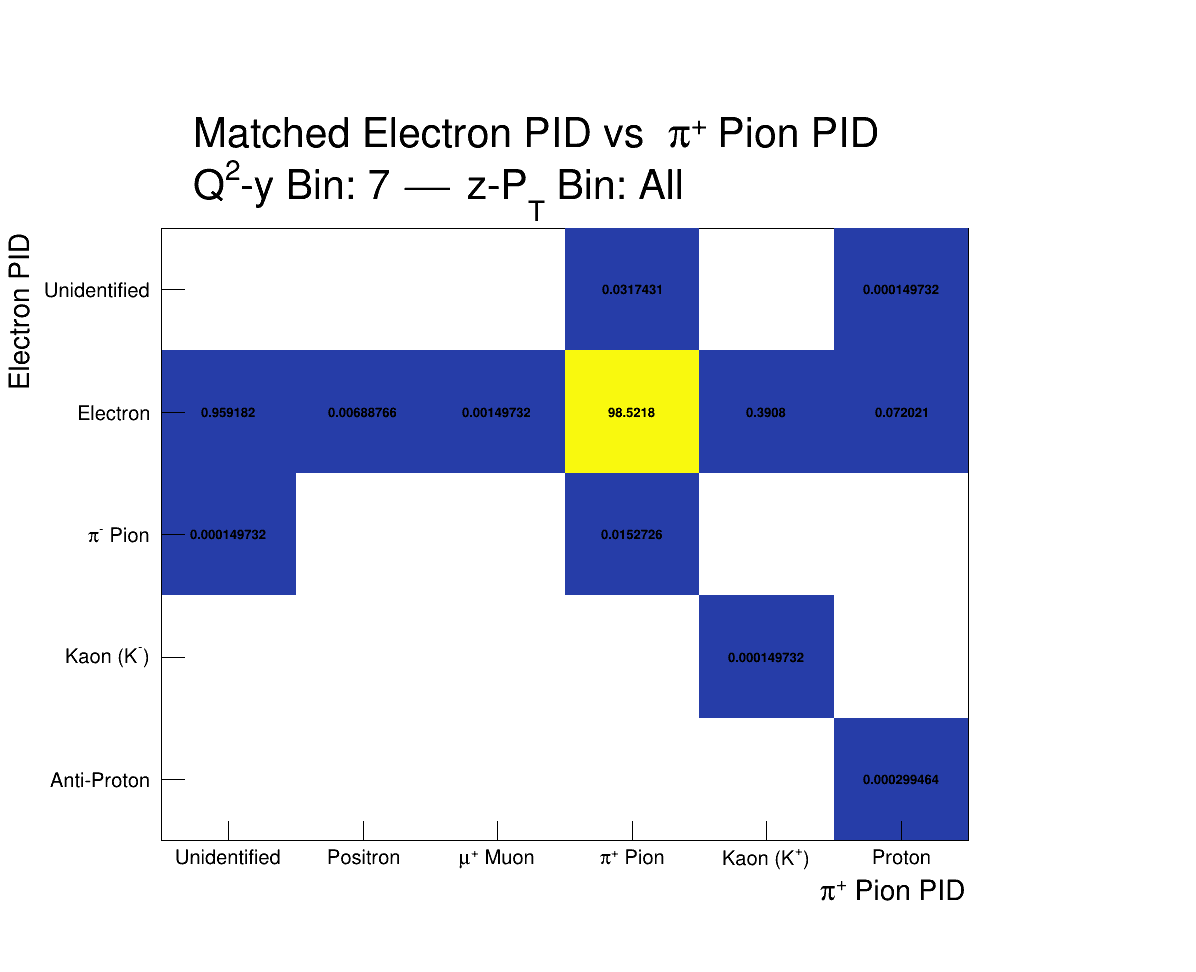

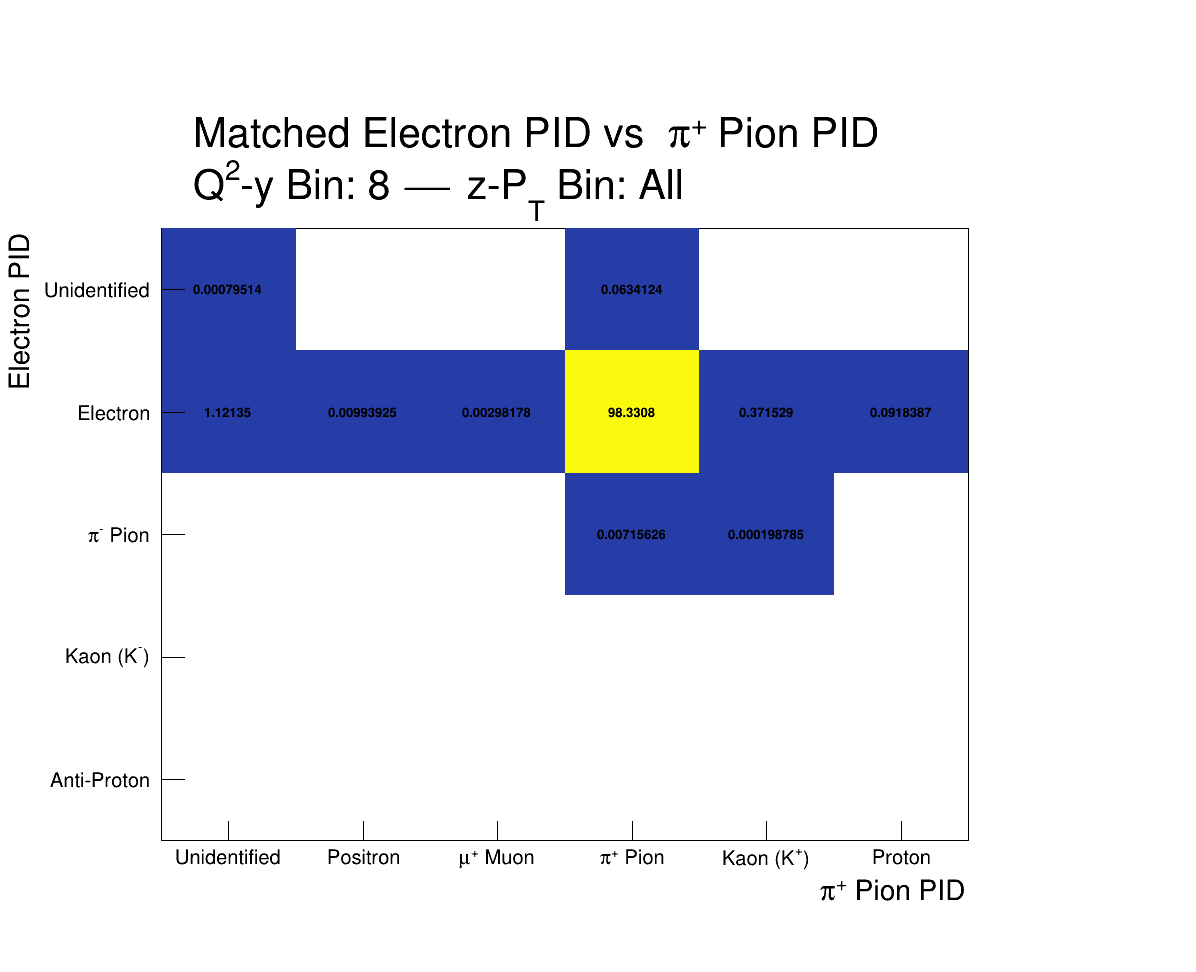

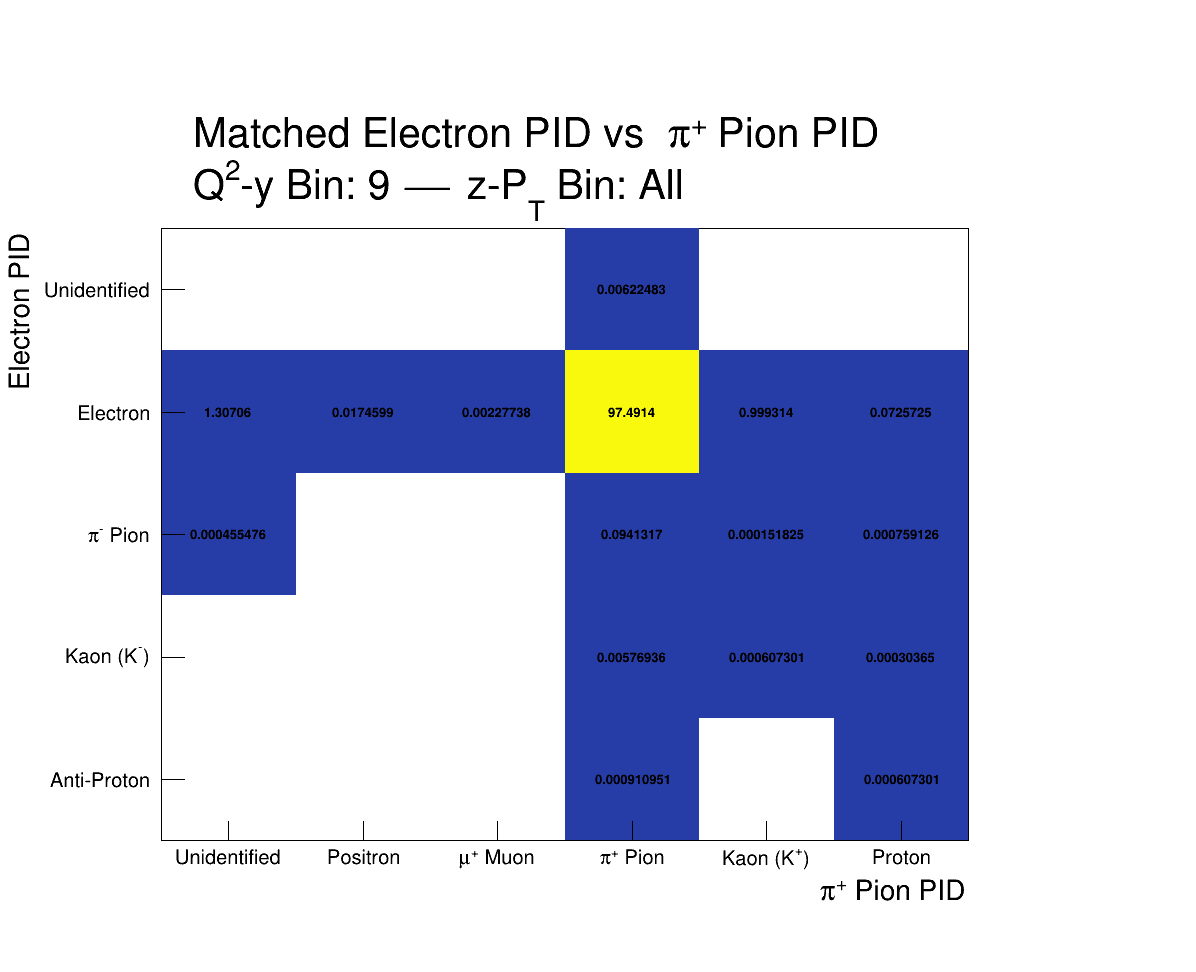

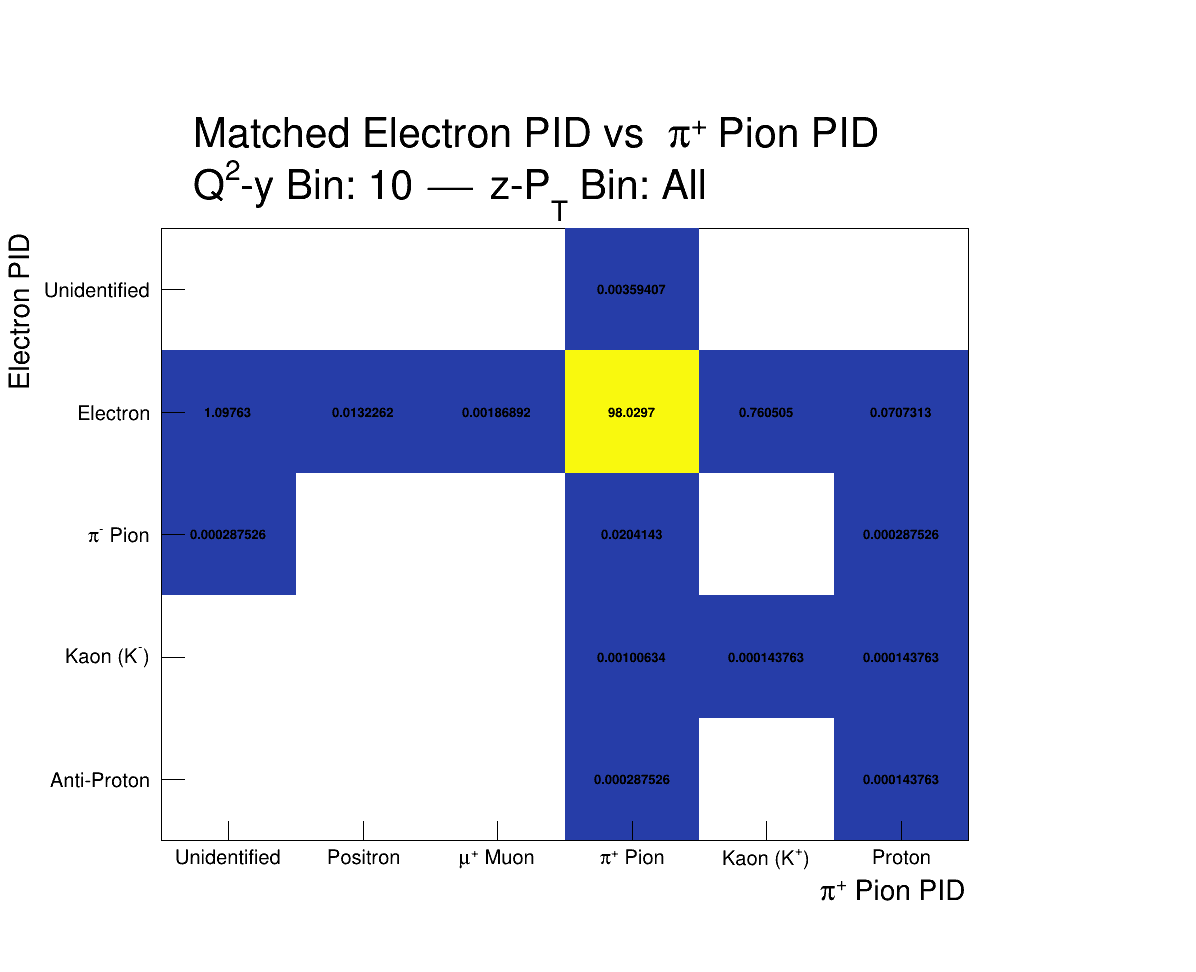

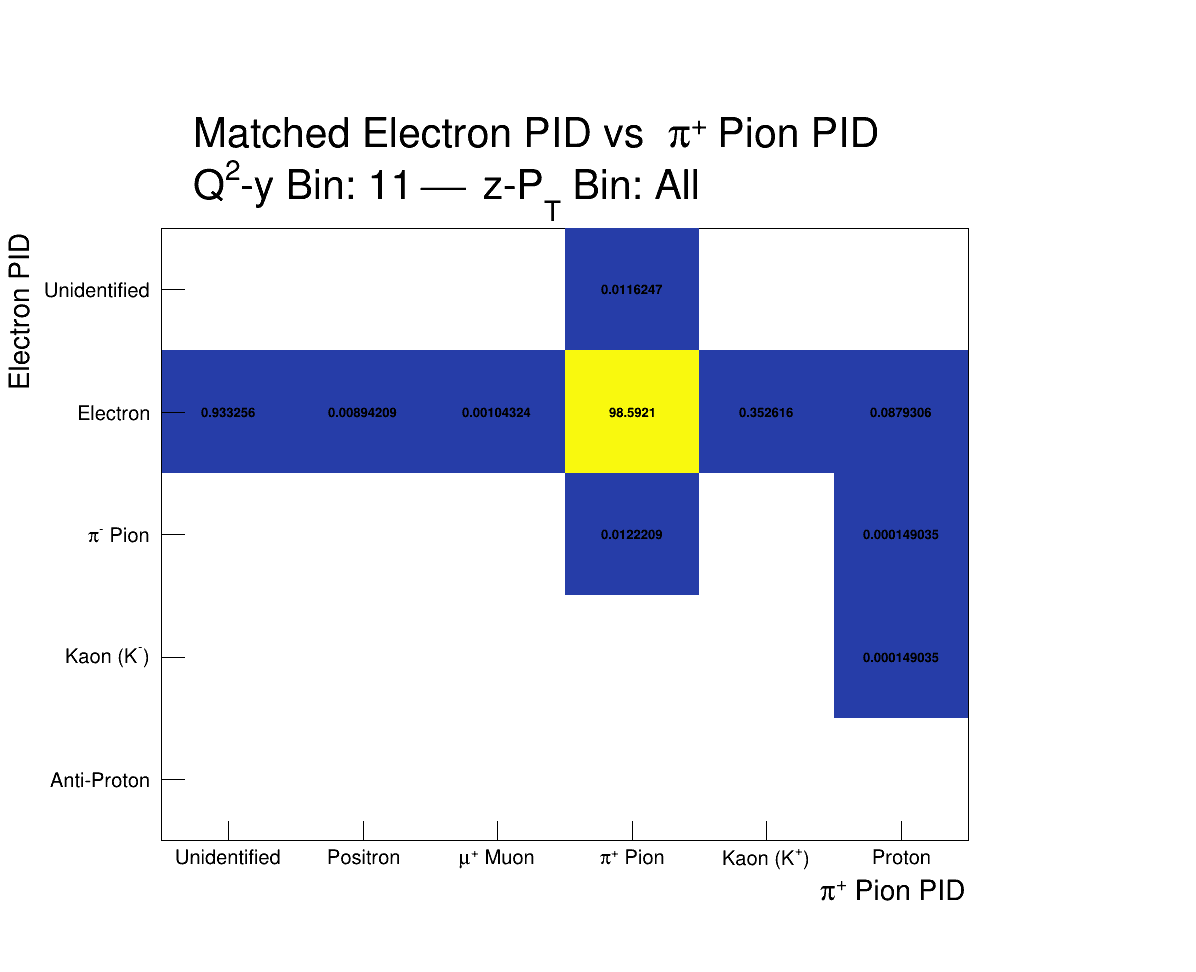

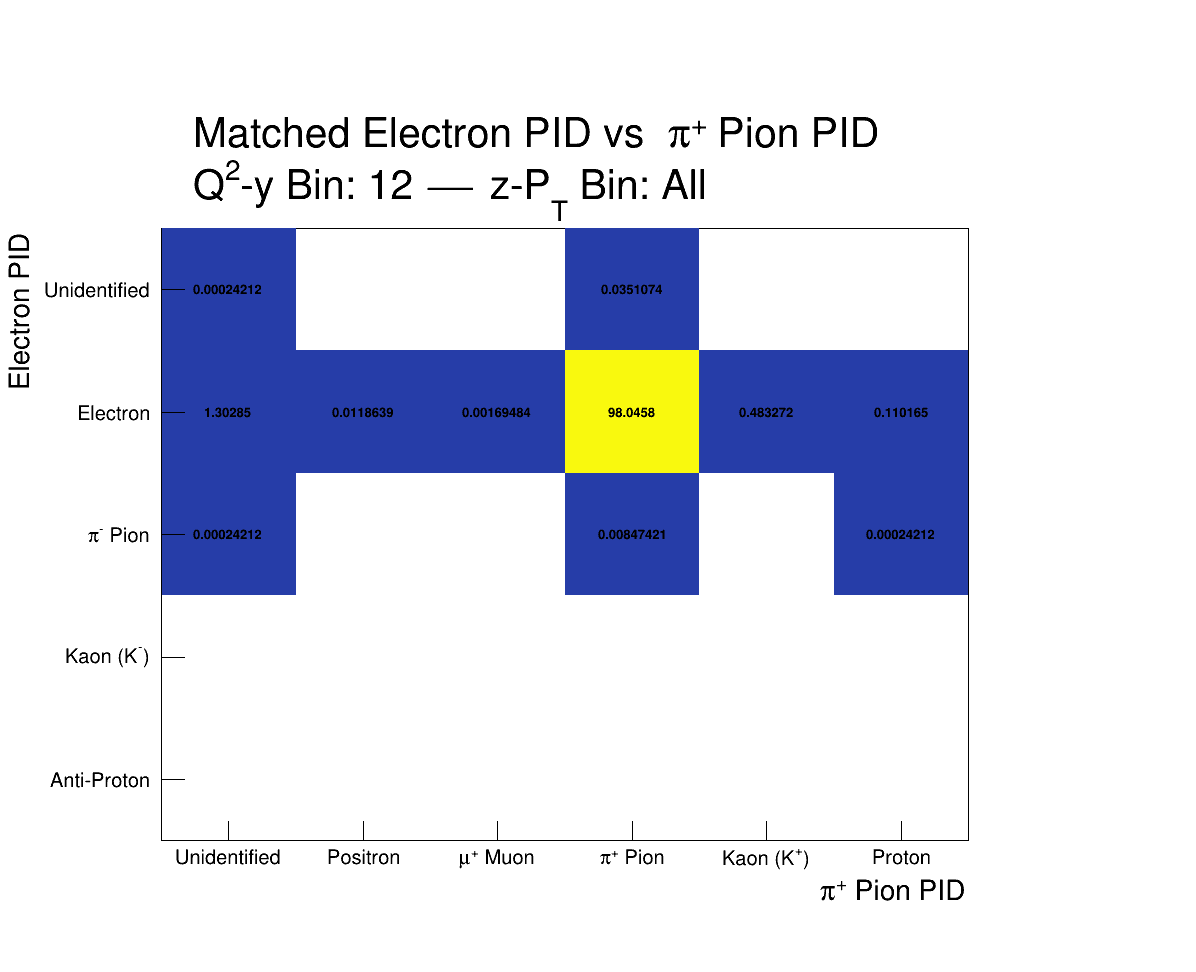

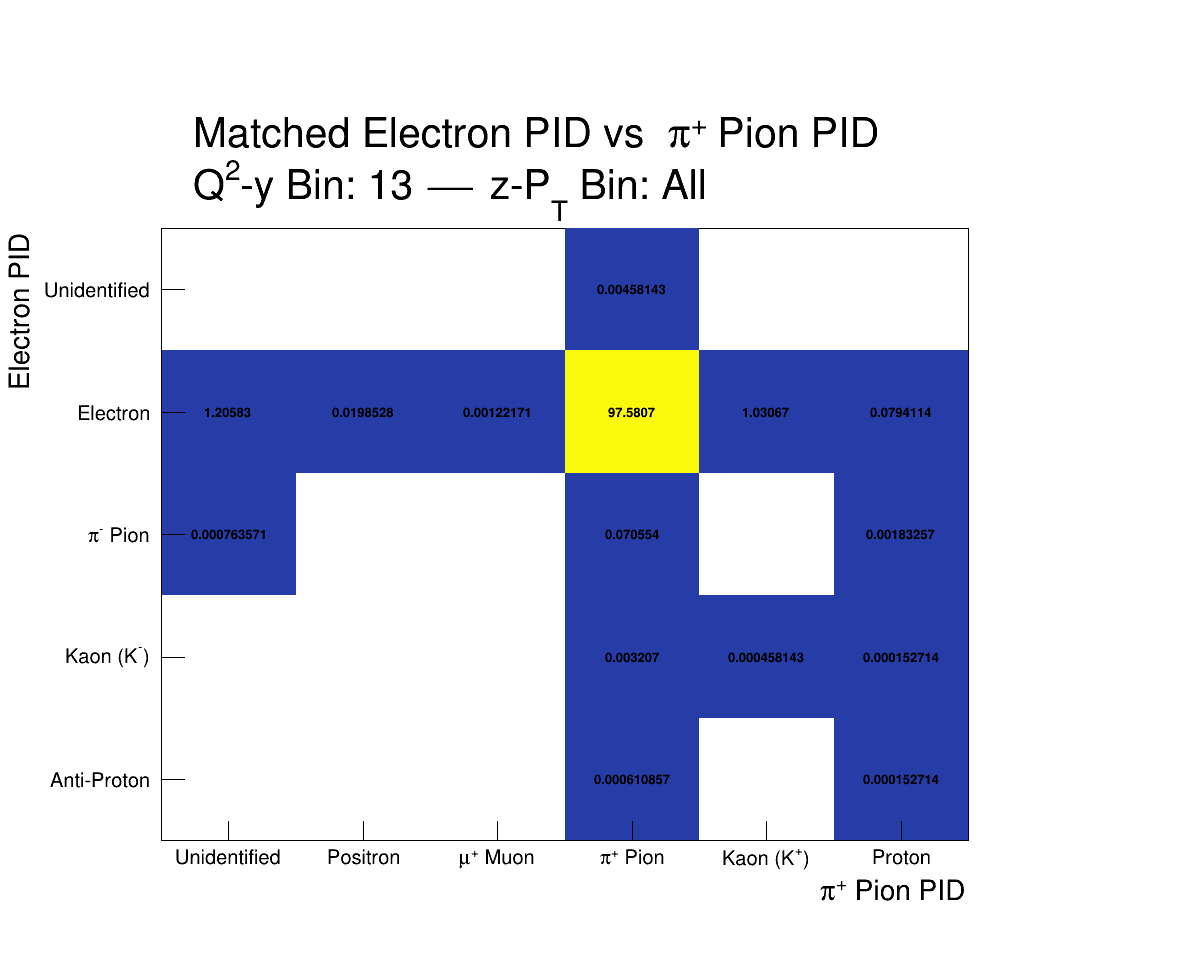

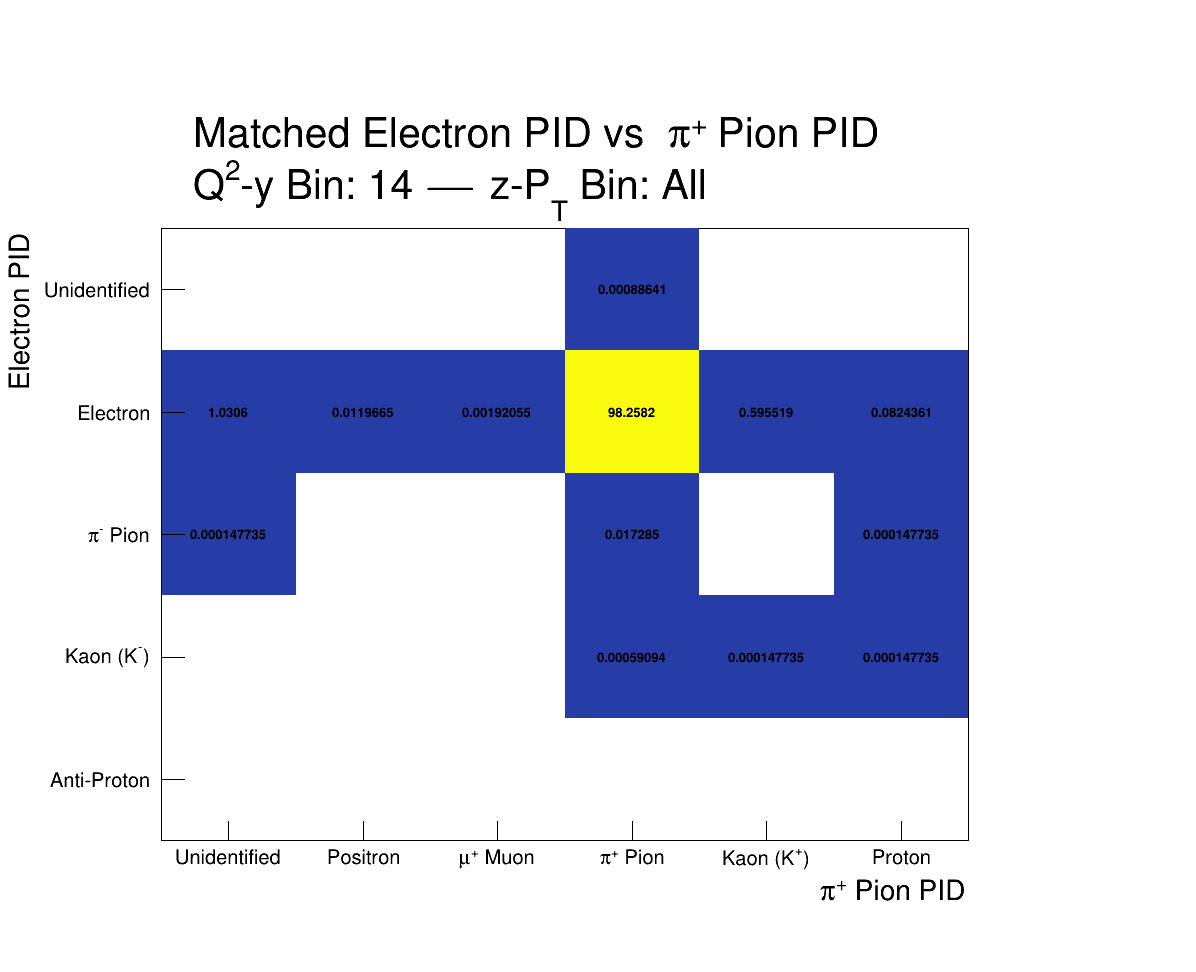

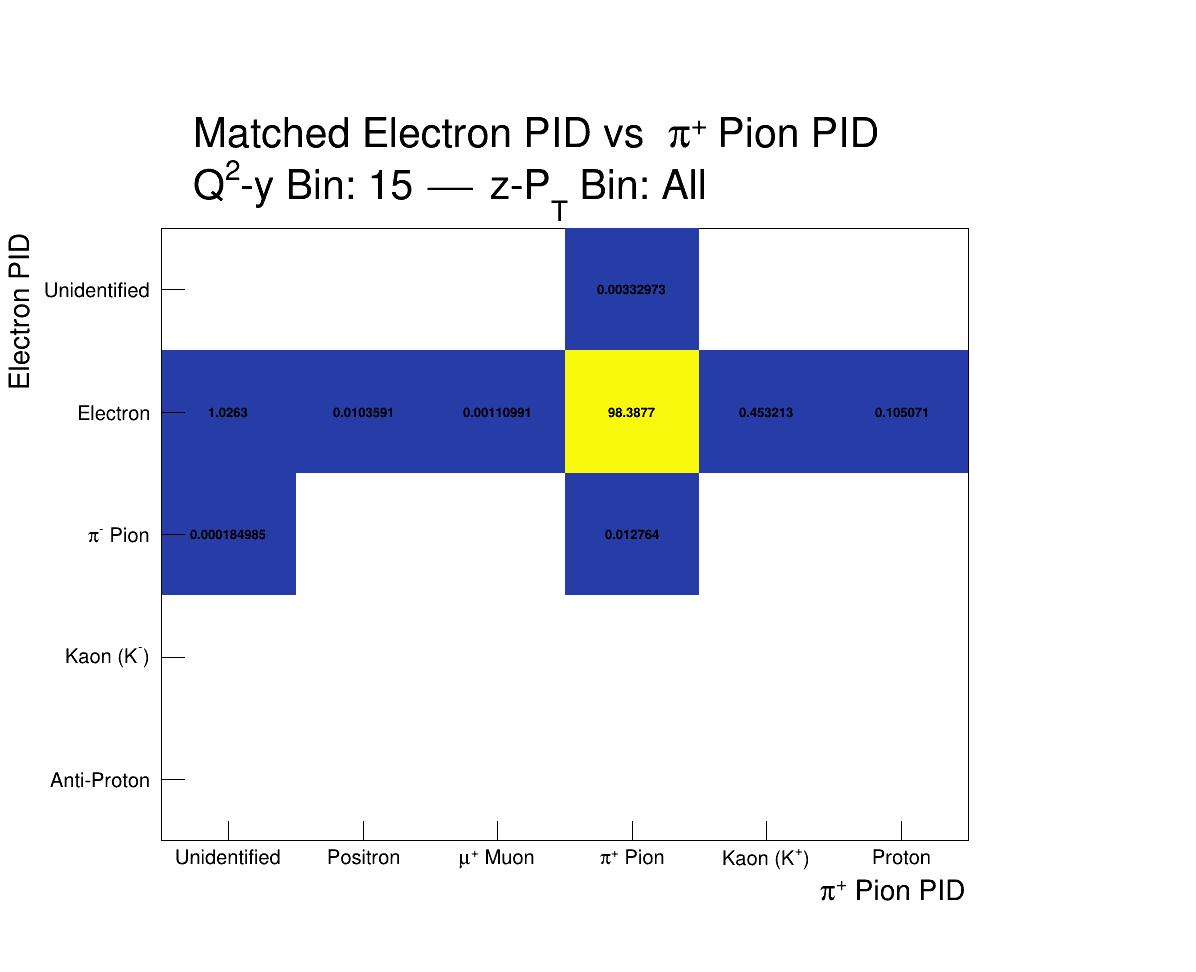

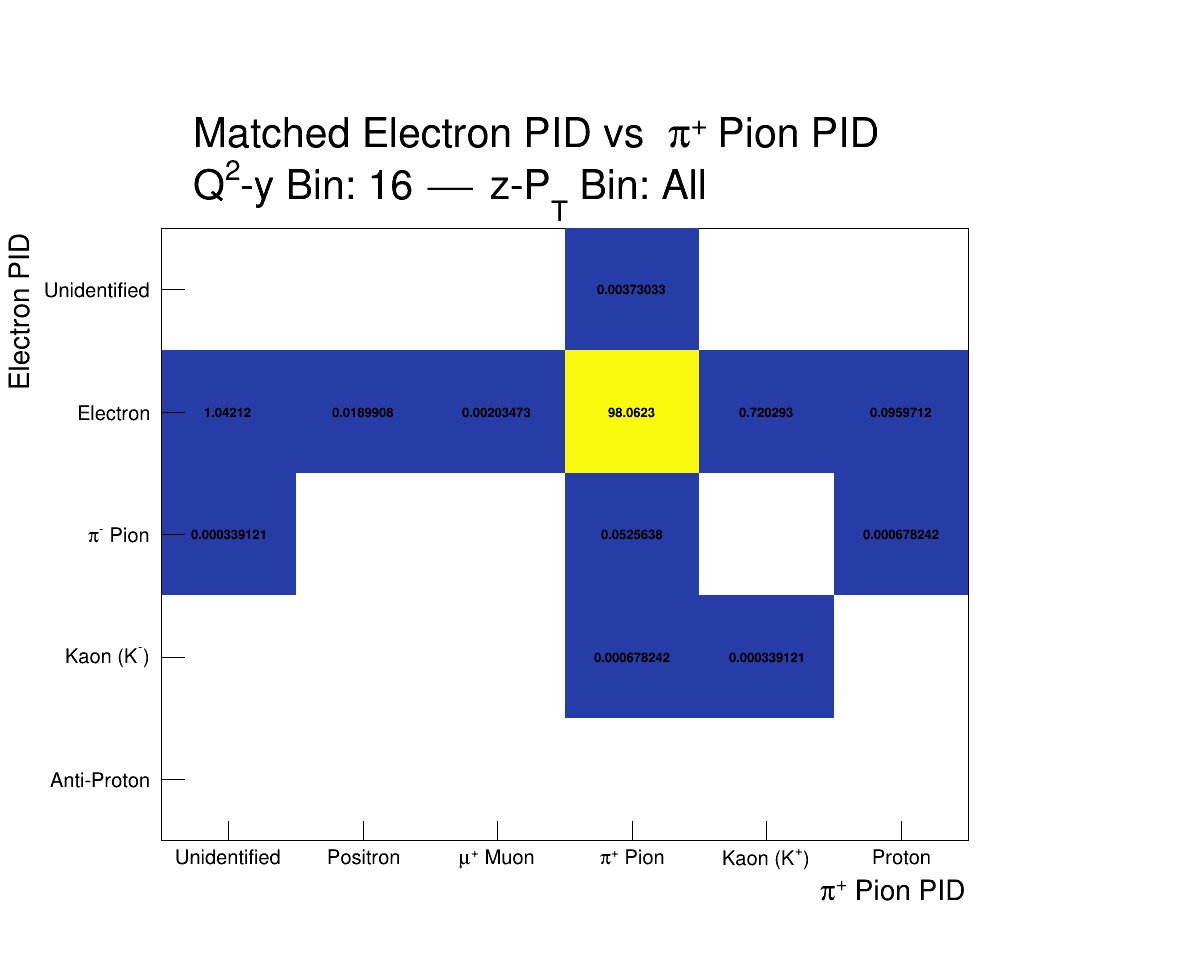

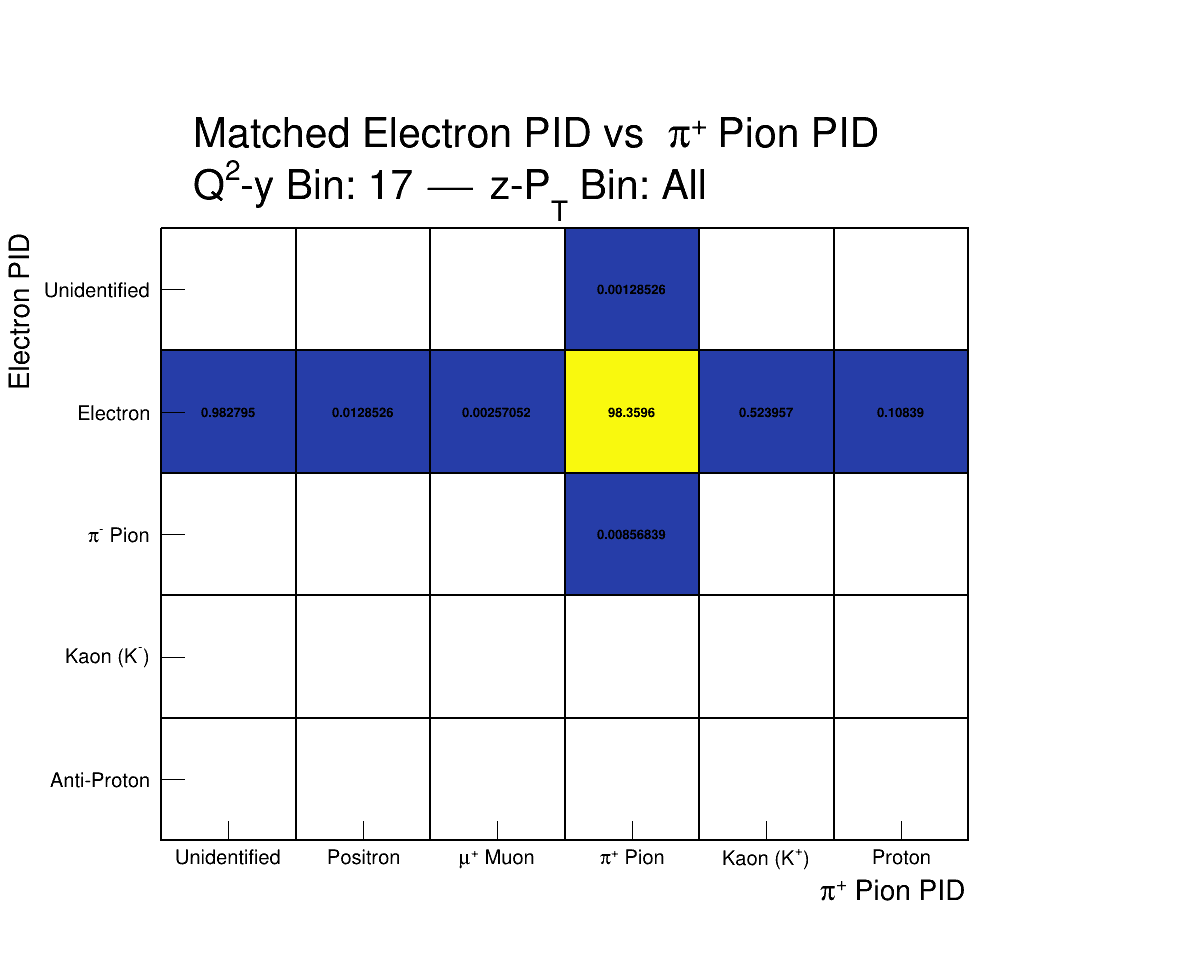

In [37]:
cut = "cut_Complete_SIDIS_eS6o"
cut = "cut_Complete_SIDIS"
# cut = "no_cut"

Q2_y_Bin = "All"
# Q2_y_Bin = "3"

Q2_y_Bin_List = ["All", 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

# Q2_y_Bin_List = ["All"]
# Q2_y_Bin_List = [6]
# Q2_y_Bin_List = ["All", 5, 14]

Histo_mdf_3D = {}
Histo_bdf_3D = {}
Histo_mdf_2D = {}
Histo_bdf_2D = {}
Histo_PID    = {}
canvas_main  = {}


Ave_Miss_Electron = 0
Ave_UnId_Electron = 0
Ave_Miss_Pip_Pion = 0
Ave_UnId_Pip_Pion = 0

Min_Miss_Electron = [100, "BIN"]
Min_UnId_Electron = [100, "BIN"]
Min_Miss_Pip_Pion = [100, "BIN"]
Min_UnId_Pip_Pion = [100, "BIN"]

Max_Miss_Electron = [0, "BIN"]
Max_UnId_Electron = [0, "BIN"]
Max_Miss_Pip_Pion = [0, "BIN"]
Max_UnId_Pip_Pion = [0, "BIN"]

Identified___Background = 0
Unidentified_Background = 0
Total_Background = 0

Max_Background = [0,   "BIN"]
Min_Background = [100, "BIN"]


for Q2_y_Bin in Q2_y_Bin_List:

    Histo_Name_mdf = f"((Histo-Group='Normal_2D'), (Data-Type='mdf'), (Data-Cut='{cut}'), (Smear-Type=''), (Binning-Type='Y_bin'-[Q2-y-Bin={Q2_y_Bin}, z-PT-Bin=All]), (Var-D1='PID_el_idx'-[NumBins=11, MinBin=0.5, MaxBin=11.5]), (Var-D2='PID_pip_idx'-[NumBins=11, MinBin=0.5, MaxBin=11.5]))"
    Histo_Name_bdf = str(Histo_Name_mdf.replace("Normal_2D", "Normal_Background_2D"))

    # Histo_Name_Q2_y_mdf = f"((Histo-Group='Normal_2D'), (Data-Type='mdf'), (Data-Cut='{cut}'), (Smear-Type=''), (Binning-Type='Y_bin'-[Q2-y-Bin={Q2_y_Bin}, z-PT-Bin=All]), (Var-D1='Q2'-[NumBins=280, MinBin=0, MaxBin=14]), (Var-D2='y'-[NumBins=100, MinBin=0, MaxBin=1]))"
    # Histo_Name_Q2_y_bdf = str(Histo_Name_Q2_y_mdf.replace("Normal_2D", "Normal_Background_2D"))

    # Histo_Name_z_pT_mdf = f"((Histo-Group='Normal_2D'), (Data-Type='mdf'), (Data-Cut='{cut}'), (Smear-Type=''), (Binning-Type='Y_bin'-[Q2-y-Bin={Q2_y_Bin}, z-PT-Bin=All]), (Var-D1='z'-[NumBins=120, MinBin=0, MaxBin=1.2]), (Var-D2='pT'-[NumBins=200, MinBin=0, MaxBin=2.0]))"
    # Histo_Name_z_pT_bdf = str(Histo_Name_z_pT_mdf.replace("Normal_2D", "Normal_Background_2D"))


    Histo_mdf_3D[f"{Q2_y_Bin}"]      = mdf.Get(str(Histo_Name_mdf))
    Histo_bdf_3D[f"{Q2_y_Bin}"]      = mdf.Get(str(Histo_Name_bdf))

    # Histo_mdf_Q2_y_3D = mdf.Get(str(Histo_Name_Q2_y_mdf))
    # Histo_bdf_Q2_y_3D = mdf.Get(str(Histo_Name_Q2_y_bdf))

    # Histo_mdf_z_pT_3D = mdf.Get(str(Histo_Name_z_pT_mdf))
    # Histo_bdf_z_pT_3D = mdf.Get(str(Histo_Name_z_pT_bdf))

    z_pT_Bin_Unfold = "All"
    
    z_pT_Bin_Unfold_List = ["All"]
    if(Q2_y_Bin not in ["All"]):
        z_pT_Bin_Unfold_List.extend(range(1, Get_Num_of_z_pT_Bins_w_Migrations(Q2_y_Bin_Num_In=Q2_y_Bin)[1] + 1))
#     print(z_pT_Bin_Unfold_List)
    z_pT_Bin_Unfold_List = ["All"]
    
    for z_pT_Bin_Unfold in z_pT_Bin_Unfold_List:
        if(z_pT_Bin_Unfold in [0, "All"]):
            Histo_mdf_3D[f"{Q2_y_Bin}"].GetXaxis().SetRangeUser(1, 50)
            Histo_bdf_3D[f"{Q2_y_Bin}"].GetXaxis().SetRangeUser(1, 50)

            # Histo_mdf_Q2_y_3D.GetXaxis().SetRangeUser(1, 50)
            # Histo_bdf_Q2_y_3D.GetXaxis().SetRangeUser(1, 50)

            # Histo_mdf_z_pT_3D.GetXaxis().SetRangeUser(1, 50)
            # Histo_bdf_z_pT_3D.GetXaxis().SetRangeUser(1, 50)
        else:
            if(skip_condition_z_pT_bins(Q2_Y_BIN=Q2_y_Bin, Z_PT_BIN=z_pT_Bin_Unfold, BINNING_METHOD="_Y_bin")):
                continue
            
            Histo_mdf_3D[f"{Q2_y_Bin}"].GetXaxis().SetRangeUser(z_pT_Bin_Unfold, z_pT_Bin_Unfold)
            Histo_bdf_3D[f"{Q2_y_Bin}"].GetXaxis().SetRangeUser(z_pT_Bin_Unfold, z_pT_Bin_Unfold)

            # Histo_mdf_Q2_y_3D.GetXaxis().SetRangeUser(z_pT_Bin_Unfold, z_pT_Bin_Unfold)
            # Histo_bdf_Q2_y_3D.GetXaxis().SetRangeUser(z_pT_Bin_Unfold, z_pT_Bin_Unfold)

            # Histo_mdf_z_pT_3D.GetXaxis().SetRangeUser(z_pT_Bin_Unfold, z_pT_Bin_Unfold)
            # Histo_bdf_z_pT_3D.GetXaxis().SetRangeUser(z_pT_Bin_Unfold, z_pT_Bin_Unfold)


        Histo_mdf_2D[f"{Q2_y_Bin}_{z_pT_Bin_Unfold}"]  = Histo_mdf_3D[f"{Q2_y_Bin}"] .Project3D("yz")
        Histo_bdf_2D[f"{Q2_y_Bin}_{z_pT_Bin_Unfold}"]  = Histo_bdf_3D[f"{Q2_y_Bin}"] .Project3D("yz")


        Histo_PID[f"{Q2_y_Bin}_{z_pT_Bin_Unfold}"] = Histo_mdf_2D[f"{Q2_y_Bin}_{z_pT_Bin_Unfold}"].Clone(f"Histo_PID_Q2_y_{Q2_y_Bin}_z_pT_{z_pT_Bin_Unfold}")
        Histo_PID[f"{Q2_y_Bin}_{z_pT_Bin_Unfold}"].Add(Histo_bdf_2D[f"{Q2_y_Bin}_{z_pT_Bin_Unfold}"])

        Histo_PID_Title = "".join(["#splitline{Matched Electron PID vs #pi^{+} Pion PID}{Q^{2}-y Bin: ", str(Q2_y_Bin), " #topbar z-P_{T} Bin: ", str(z_pT_Bin_Unfold), "}"])

        Histo_PID[f"{Q2_y_Bin}_{z_pT_Bin_Unfold}"].SetTitle(Histo_PID_Title)

        Histo_PID_Total = Histo_PID[f"{Q2_y_Bin}_{z_pT_Bin_Unfold}"].GetEntries()
        
        if(Histo_PID_Total == 0):
            print(f"{color.Error}Skipping Bin {Q2_y_Bin}_{z_pT_Bin_Unfold} (No Entries){color.END}")
            continue
        
        Histo_PID[f"{Q2_y_Bin}_{z_pT_Bin_Unfold}"].Scale(100/Histo_PID_Total)

        Histo_PID[f"{Q2_y_Bin}_{z_pT_Bin_Unfold}"].SetMarkerSize(0.8)
        Histo_PID[f"{Q2_y_Bin}_{z_pT_Bin_Unfold}"].GetZaxis().SetLabelSize(0.05)

        Histo_PID[f"{Q2_y_Bin}_{z_pT_Bin_Unfold}"].SetLineColor(ROOT.kBlack)
        Histo_PID[f"{Q2_y_Bin}_{z_pT_Bin_Unfold}"].SetLineWidth(10)

        Histo_PID[f"{Q2_y_Bin}_{z_pT_Bin_Unfold}"] = PID_Histo_Label(Histogram=Histo_PID[f"{Q2_y_Bin}_{z_pT_Bin_Unfold}"])

        ROOT.gStyle.SetTitleOffset(2.95, 'y')
        ROOT.gStyle.SetGridColor(17)
        ROOT.gStyle.SetPadGridX(0)
        ROOT.gStyle.SetPadGridY(0)


        Histo_PID[f"{Q2_y_Bin}_{z_pT_Bin_Unfold}"].GetYaxis().SetRangeUser(0.5, 5.5)
        Histo_PID[f"{Q2_y_Bin}_{z_pT_Bin_Unfold}"].GetXaxis().SetRangeUser(4.5, 10.5)

        canvas_main[f"{Q2_y_Bin}_{z_pT_Bin_Unfold}"]  = Canvas_Create(Name=f"Canvas_{Q2_y_Bin}_{z_pT_Bin_Unfold}", Num_Columns=1, Num_Rows=1, Size_X=1200, Size_Y=1000, cd_Space=0)
        canvas_main[f"{Q2_y_Bin}_{z_pT_Bin_Unfold}"].Draw()
        Draw_Canvas(canvas=canvas_main[f"{Q2_y_Bin}_{z_pT_Bin_Unfold}"], cd_num=1, left_add=0.15, right_add=0.1, up_add=0.15, down_add=0.15)
        Histo_PID[f"{Q2_y_Bin}_{z_pT_Bin_Unfold}"].Draw("col text")
        # ROOT.gPad.SetLogz(1)

        canvas_main[f"{Q2_y_Bin}_{z_pT_Bin_Unfold}"].Update()
        box, count = {}, 0
        for ii in range(5, Histo_PID[f"{Q2_y_Bin}_{z_pT_Bin_Unfold}"].GetNbinsX()):
            for jj in range(1, Histo_PID[f"{Q2_y_Bin}_{z_pT_Bin_Unfold}"].GetNbinsY() - 5):
                count += 1
                x1 = Histo_PID[f"{Q2_y_Bin}_{z_pT_Bin_Unfold}"].GetXaxis().GetBinLowEdge(ii)
                x2 = Histo_PID[f"{Q2_y_Bin}_{z_pT_Bin_Unfold}"].GetXaxis().GetBinUpEdge(ii)
                y1 = Histo_PID[f"{Q2_y_Bin}_{z_pT_Bin_Unfold}"].GetYaxis().GetBinLowEdge(jj)
                y2 = Histo_PID[f"{Q2_y_Bin}_{z_pT_Bin_Unfold}"].GetYaxis().GetBinUpEdge(jj)
                box[count] = ROOT.TBox(x1, y1, x2, y2)
                box[count].SetFillStyle(0)
                box[count].SetLineColor(ROOT.kBlack)
                box[count].SetLineWidth(2)
                box[count].Draw("l same")
        canvas_main[f"{Q2_y_Bin}_{z_pT_Bin_Unfold}"].Update()
        canvas_main[f"{Q2_y_Bin}_{z_pT_Bin_Unfold}"].Draw()

        bin_num = 0
        Miss_Electron, UnId_Electron, Miss_Pip_Pion, UnId_Pip_Pion = 0, 0, 0, 0
        for ii in range(1, Histo_PID[f"{Q2_y_Bin}_{z_pT_Bin_Unfold}"].GetNbinsX() + 1):
            for jj in range(1, Histo_PID[f"{Q2_y_Bin}_{z_pT_Bin_Unfold}"].GetNbinsY() + 1):
                X_bin_label =  Histo_PID[f"{Q2_y_Bin}_{z_pT_Bin_Unfold}"].GetXaxis().GetBinLabel(ii)
                Y_bin_label =  Histo_PID[f"{Q2_y_Bin}_{z_pT_Bin_Unfold}"].GetYaxis().GetBinLabel(jj)
                # print(f"Bin {bin_num}:\nX-axis: {X_bin_label}\nY-axis: {Y_bin_label}\n")
                bin_num += 1
                if(Y_bin_label not in ["Electron",     "Unidentified"]):
                    Miss_Electron += Histo_PID[f"{Q2_y_Bin}_{z_pT_Bin_Unfold}"].GetBinContent(ii, jj)
                if(Y_bin_label     in ["Unidentified"]):
                    UnId_Electron += Histo_PID[f"{Q2_y_Bin}_{z_pT_Bin_Unfold}"].GetBinContent(ii, jj)
                if(X_bin_label not in ["#pi^{+} Pion", "Unidentified"]):
                    Miss_Pip_Pion += Histo_PID[f"{Q2_y_Bin}_{z_pT_Bin_Unfold}"].GetBinContent(ii, jj)
                if(X_bin_label     in ["Unidentified"]):
                    UnId_Pip_Pion += Histo_PID[f"{Q2_y_Bin}_{z_pT_Bin_Unfold}"].GetBinContent(ii, jj)

#             print(f"\n{color.BOLD}Q2-y Bin {Q2_y_Bin}:{color.END}")
        #     print(f"\tMiss_Electron = {round(Miss_Electron, 7)}")
        #     print(f"\tUnId_Electron = {round(UnId_Electron, 7)}")
        #     print(f"\tMiss_Pip_Pion = {round(Miss_Pip_Pion, 7)}")
        #     print(f"\tUnId_Pip_Pion = {round(UnId_Pip_Pion, 7)}")


        #     print(f"\tTotal (Identified) Background   = {round(Miss_Electron + Miss_Pip_Pion, 7)}")
        #     print(f"\tTotal (Unidentified) Background = {round(UnId_Electron + UnId_Pip_Pion, 7)}")
#             print(f"\tTotal Background                = {round(Miss_Electron + UnId_Electron + Miss_Pip_Pion + UnId_Pip_Pion, 7)}")

        Ave_Miss_Electron       = round(Miss_Electron, 7)                                                 if(Q2_y_Bin == Q2_y_Bin_List[0]) else ((Ave_Miss_Electron       + round(Miss_Electron, 7))/2)
        Ave_UnId_Electron       = round(UnId_Electron, 7)                                                 if(Q2_y_Bin == Q2_y_Bin_List[0]) else ((Ave_UnId_Electron       + round(UnId_Electron, 7))/2)
        Ave_Miss_Pip_Pion       = round(Miss_Pip_Pion, 7)                                                 if(Q2_y_Bin == Q2_y_Bin_List[0]) else ((Ave_Miss_Pip_Pion       + round(Miss_Pip_Pion, 7))/2)
        Ave_UnId_Pip_Pion       = round(UnId_Pip_Pion, 7)                                                 if(Q2_y_Bin == Q2_y_Bin_List[0]) else ((Ave_UnId_Pip_Pion       + round(UnId_Pip_Pion, 7))/2)
        Identified___Background = round(Miss_Electron + Miss_Pip_Pion, 7)                                 if(Q2_y_Bin == Q2_y_Bin_List[0]) else ((Identified___Background + round(Miss_Electron + Miss_Pip_Pion, 7))/2)
        Unidentified_Background = round(UnId_Electron + UnId_Pip_Pion, 7)                                 if(Q2_y_Bin == Q2_y_Bin_List[0]) else ((Unidentified_Background + round(UnId_Electron + UnId_Pip_Pion, 7))/2)
        Total_Background        = round(Miss_Electron + UnId_Electron + Miss_Pip_Pion + UnId_Pip_Pion, 7) if(Q2_y_Bin == Q2_y_Bin_List[0]) else ((Total_Background        + round(Miss_Electron + UnId_Electron + Miss_Pip_Pion + UnId_Pip_Pion, 7))/2)

        if(Min_Miss_Electron[0] >= Miss_Electron):
            Min_Miss_Electron.append(f"Q2-y: {Q2_y_Bin} - z-pT: {z_pT_Bin_Unfold}")
        if(Min_Miss_Electron[0] > Miss_Electron):
            Min_Miss_Electron   = [round(Miss_Electron, 5), f"Q2-y: {Q2_y_Bin} - z-pT: {z_pT_Bin_Unfold}"]
        if(Min_UnId_Electron[0] >= UnId_Electron):
            Min_UnId_Electron.append(f"Q2-y: {Q2_y_Bin} - z-pT: {z_pT_Bin_Unfold}")
        if(Min_UnId_Electron[0] > UnId_Electron):
            Min_UnId_Electron   = [round(UnId_Electron, 5), f"Q2-y: {Q2_y_Bin} - z-pT: {z_pT_Bin_Unfold}"]
        if(Min_Miss_Pip_Pion[0] >= Miss_Pip_Pion):
            Min_Miss_Pip_Pion.append(f"Q2-y: {Q2_y_Bin} - z-pT: {z_pT_Bin_Unfold}")
        if(Min_Miss_Pip_Pion[0] > Miss_Pip_Pion):
            Min_Miss_Pip_Pion   = [round(Miss_Pip_Pion, 5), f"Q2-y: {Q2_y_Bin} - z-pT: {z_pT_Bin_Unfold}"]
        if(Min_UnId_Pip_Pion[0] >= UnId_Pip_Pion):
            Min_UnId_Pip_Pion.append(f"Q2-y: {Q2_y_Bin} - z-pT: {z_pT_Bin_Unfold}")
        if(Min_UnId_Pip_Pion[0] > UnId_Pip_Pion):
            Min_UnId_Pip_Pion   = [round(UnId_Pip_Pion, 5), f"Q2-y: {Q2_y_Bin} - z-pT: {z_pT_Bin_Unfold}"]

        if(Max_Miss_Electron[0] <= Miss_Electron):
            Max_Miss_Electron.append(f"Q2-y: {Q2_y_Bin} - z-pT: {z_pT_Bin_Unfold}")
        if(Max_Miss_Electron[0] < Miss_Electron):
            Max_Miss_Electron   = [round(Miss_Electron, 5), f"Q2-y: {Q2_y_Bin} - z-pT: {z_pT_Bin_Unfold}"]
        if(Max_UnId_Electron[0] <= UnId_Electron):
            Max_UnId_Electron.append(f"Q2-y: {Q2_y_Bin} - z-pT: {z_pT_Bin_Unfold}")
        if(Max_UnId_Electron[0] < UnId_Electron):
            Max_UnId_Electron   = [round(UnId_Electron, 5), f"Q2-y: {Q2_y_Bin} - z-pT: {z_pT_Bin_Unfold}"]
        if(Max_Miss_Pip_Pion[0] <= Miss_Pip_Pion):
            Max_Miss_Pip_Pion.append(f"Q2-y: {Q2_y_Bin} - z-pT: {z_pT_Bin_Unfold}")
        if(Max_Miss_Pip_Pion[0] < Miss_Pip_Pion):
            Max_Miss_Pip_Pion   = [round(Miss_Pip_Pion, 5), f"Q2-y: {Q2_y_Bin} - z-pT: {z_pT_Bin_Unfold}"]
        if(Max_UnId_Pip_Pion[0] <= UnId_Pip_Pion):
            Max_UnId_Pip_Pion.append(f"Q2-y: {Q2_y_Bin} - z-pT: {z_pT_Bin_Unfold}")
        if(Max_UnId_Pip_Pion[0] < UnId_Pip_Pion):
            Max_UnId_Pip_Pion   = [round(UnId_Pip_Pion, 5), f"Q2-y: {Q2_y_Bin} - z-pT: {z_pT_Bin_Unfold}"]
            
        if(Min_Background[0] > (round(Miss_Electron + UnId_Electron + Miss_Pip_Pion + UnId_Pip_Pion, 7))):
            Min_Background   = [round(Miss_Electron + UnId_Electron + Miss_Pip_Pion + UnId_Pip_Pion, 7), f"Q2-y: {Q2_y_Bin} - z-pT: {z_pT_Bin_Unfold}"]
        if(Max_Background[0] < (round(Miss_Electron + UnId_Electron + Miss_Pip_Pion + UnId_Pip_Pion, 7))):
            Max_Background   = [round(Miss_Electron + UnId_Electron + Miss_Pip_Pion + UnId_Pip_Pion, 7), f"Q2-y: {Q2_y_Bin} - z-pT: {z_pT_Bin_Unfold}"]
            




print(f"\n{color.BOLD}")
print(f"Ave_Miss_Electron       = {round(Ave_Miss_Electron,       5)}")
print(f"Ave_UnId_Electron       = {round(Ave_UnId_Electron,       5)}")
print(f"Ave_Miss_Pip_Pion       = {round(Ave_Miss_Pip_Pion,       5)}")
print(f"Ave_UnId_Pip_Pion       = {round(Ave_UnId_Pip_Pion,       5)}")
print(f"Identified___Background = {round(Identified___Background, 5)}")
print(f"\t    (% of total = {round(Identified___Background/Total_Background, 6)*100}%)")
print(f"Unidentified_Background = {round(Unidentified_Background, 5)}")
print(f"\t    (% of total = {round(Unidentified_Background/Total_Background, 6)*100}%)")
print(f"Total_Background        = {round(Total_Background,        5)}")
print(f"\t(Non-Background = {100 - round(Total_Background,        5)})")
# print(f"\tRatio of Identified to Unidentified Background = {round(Identified___Background/Unidentified_Background, 5)}")
print(f"Min_Background          = {Min_Background}")
print(f"\t(Non-Background = {100 - Min_Background[0]})")
print(f"Max_Background          = {Max_Background}")
print(f"\t(Non-Background = {100 - Max_Background[0]})")
print("")
# print(f"Min_Miss_Electron       = {Min_Miss_Electron}\n\t(count = {len(Min_Miss_Electron) - 1})")
# print(f"Min_UnId_Electron       = {Min_UnId_Electron}\n\t(count = {len(Min_UnId_Electron) - 1})")
# print(f"Min_Miss_Pip_Pion       = {Min_Miss_Pip_Pion}\n\t(count = {len(Min_Miss_Pip_Pion) - 1})")
# print(f"Min_UnId_Pip_Pion       = {Min_UnId_Pip_Pion}\n\t(count = {len(Min_UnId_Pip_Pion) - 1})")
# print(f"Max_Miss_Electron       = {Max_Miss_Electron}")
# print(f"Max_UnId_Electron       = {Max_UnId_Electron}")
# print(f"Max_Miss_Pip_Pion       = {Max_Miss_Pip_Pion}")
# print(f"Max_UnId_Pip_Pion       = {Max_UnId_Pip_Pion}")
print(f"\n{color.END}")


print("Done")

Background_Events[Q2_y_Bin_5_row_1_PID] = [676, 612, 604, 681, 746, 846]
Background_Events[Q2_y_Bin_5_row_2_PID] = [407, 397, 335, 357, 434, 471]
Background_Events[Q2_y_Bin_5_row_3_PID] = [453, 355, 334, 347, 409, 328]
Background_Events[Q2_y_Bin_5_row_4_PID] = [559, 517, 466, 417, 389]
Background_Events[Q2_y_Bin_5_row_5_PID] = [768, 639, 563, 478, 430]
Background_Events[Q2_y_Bin_5_row_6_PID] = [968, 857, 685, 585]


Background_Events[Q2_y_Bin_5_row_1_MM] = [16, 22, 16, 23, 52, 124]
Background_Events[Q2_y_Bin_5_row_2_MM] = [3, 9, 14, 58, 42, 96]
Background_Events[Q2_y_Bin_5_row_3_MM] = [10, 11, 11, 8, 24, 46]
Background_Events[Q2_y_Bin_5_row_4_MM] = [1, 1, 2, 6, 6]
Background_Events[Q2_y_Bin_5_row_5_MM] = [0, 0, 1, 0, 3]
Background_Events[Q2_y_Bin_5_row_6_MM] = [0, 2, 1, 0]


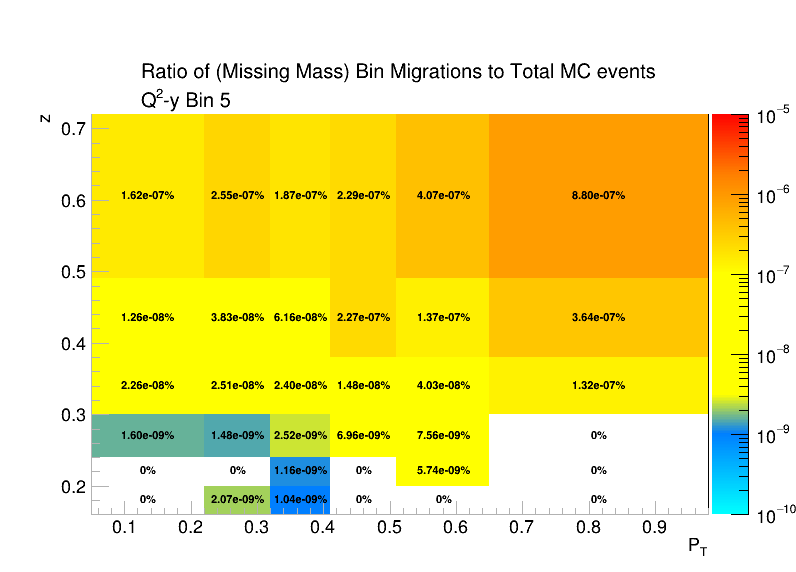

In [52]:
from array import array  # Correct import for the array
Background_Events = {}
Monte_CarloEvents = {}

def choose_format(value):
    if((value < 0.01 or value > 100) and not (value == 0)):
        return "{:.2e}".format(value)  # Scientific notation
    else:
        return "{:.2f}".format(value)  # Fixed point notation

Monte_CarloEvents["Q2_y_Bin_5_row_1"] = [9938,           9285,      9259, 1.002e+04, 1.131e+04, 1.187e+04]
Monte_CarloEvents["Q2_y_Bin_5_row_2"] = [1.542e+04, 1.532e+04, 1.507e+04,   1.6e+04, 1.748e+04, 1.623e+04]
Monte_CarloEvents["Q2_y_Bin_5_row_3"] = [2.103e+04, 2.094e+04, 2.141e+04, 2.326e+04,  2.44e+04, 1.868e+04]
Monte_CarloEvents["Q2_y_Bin_5_row_4"] = [2.499e+04, 2.596e+04, 2.819e+04, 2.936e+04, 2.817e+04]
Monte_CarloEvents["Q2_y_Bin_5_row_5"] = [2.339e+04, 2.731e+04, 2.936e+04, 2.848e+04, 2.287e+04]
Monte_CarloEvents["Q2_y_Bin_5_row_6"] = [2.403e+04,  3.11e+04, 3.103e+04, 2.737e+04]

Background_Events["Q2_y_Bin_5_row_1_all_new_cuts"] = [585, 547, 529, 609, 689, 814]
Background_Events["Q2_y_Bin_5_row_2_all_new_cuts"] = [362, 340, 304, 366, 402, 491]
Background_Events["Q2_y_Bin_5_row_3_all_new_cuts"] = [398, 317, 308, 298, 351, 318]
Background_Events["Q2_y_Bin_5_row_4_all_new_cuts"] = [500, 447, 404, 362, 334]
Background_Events["Q2_y_Bin_5_row_5_all_new_cuts"] = [645, 544, 480, 420, 382]
Background_Events["Q2_y_Bin_5_row_6_all_new_cuts"] = [837, 733, 584, 507]

Background_Events["Q2_y_Bin_5_row_1_all"] = [692, 634, 620, 704, 798, 970]
Background_Events["Q2_y_Bin_5_row_2_all"] = [410, 406, 349, 415, 476, 567]
Background_Events["Q2_y_Bin_5_row_3_all"] = [463, 366, 345, 355, 433, 374]
Background_Events["Q2_y_Bin_5_row_4_all"] = [560, 518, 468, 423, 395]
Background_Events["Q2_y_Bin_5_row_5_all"] = [768, 639, 564, 478, 433]
Background_Events["Q2_y_Bin_5_row_6_all"] = [968, 859, 686, 585]


Background_Events["Q2_y_Bin_5_row_1_PID_ele_NoM"] = [2, 1, 0, 1, 1, 2]
Background_Events["Q2_y_Bin_5_row_2_PID_ele_NoM"] = [2, 0, 0, 1, 3, 1]
Background_Events["Q2_y_Bin_5_row_3_PID_ele_NoM"] = [1, 3, 1, 2, 0, 2]
Background_Events["Q2_y_Bin_5_row_4_PID_ele_NoM"] = [5, 7, 2, 2, 1]
Background_Events["Q2_y_Bin_5_row_5_PID_ele_NoM"] = [5, 7, 8, 0, 1]
Background_Events["Q2_y_Bin_5_row_6_PID_ele_NoM"] = [3, 8, 3, 6]


Background_Events["Q2_y_Bin_5_row_1_PID_ele_Mis"] = [2,   4,  5,  8,  8,  7]
Background_Events["Q2_y_Bin_5_row_2_PID_ele_Mis"] = [6,  21,  7, 13, 27, 19]
Background_Events["Q2_y_Bin_5_row_3_PID_ele_Mis"] = [11, 18, 14, 24, 35, 28]
Background_Events["Q2_y_Bin_5_row_4_PID_ele_Mis"] = [16, 26, 26, 35, 37]
Background_Events["Q2_y_Bin_5_row_5_PID_ele_Mis"] = [25, 37, 36, 39, 46]
Background_Events["Q2_y_Bin_5_row_6_PID_ele_Mis"] = [35, 42, 44, 49]


Background_Events["Q2_y_Bin_5_row_1_PID_pip_NoM"] = [99,   88,  61,  63,  56,  74]
Background_Events["Q2_y_Bin_5_row_2_PID_pip_NoM"] = [204, 149, 130, 116, 101, 139]
Background_Events["Q2_y_Bin_5_row_3_PID_pip_NoM"] = [334, 241, 200, 205, 232, 148]
Background_Events["Q2_y_Bin_5_row_4_PID_pip_NoM"] = [444, 393, 354, 313, 275]
Background_Events["Q2_y_Bin_5_row_5_PID_pip_NoM"] = [622, 497, 423, 360, 292]
Background_Events["Q2_y_Bin_5_row_6_PID_pip_NoM"] = [835, 731, 584, 467]

Background_Events["Q2_y_Bin_5_row_1_PID_pip_Mis"] = [573, 519, 538, 609, 681, 763]
Background_Events["Q2_y_Bin_5_row_2_PID_pip_Mis"] = [195, 227, 198, 227, 303, 312]
Background_Events["Q2_y_Bin_5_row_3_PID_pip_Mis"] = [107,  93, 119, 116, 142, 150]
Background_Events["Q2_y_Bin_5_row_4_PID_pip_Mis"] = [94,   91,  84,  67,  76]
Background_Events["Q2_y_Bin_5_row_5_PID_pip_Mis"] = [116,  98,  96,  79,  91]
Background_Events["Q2_y_Bin_5_row_6_PID_pip_Mis"] = [95,   76,  54,  63]

ROOT.gStyle.SetTitleOffset(1.05, 'y')

for row in range(1, 7):
    Background_Events[f"Q2_y_Bin_5_row_{row}_PID"] = Background_Events[f"Q2_y_Bin_5_row_{row}_PID_ele_NoM"]
    for source in ["_PID_ele_Mis", "_PID_pip_NoM", "_PID_pip_Mis"]:
        for column in range(0, len(Background_Events[f"Q2_y_Bin_5_row_{row}_PID"])):
            Background_Events[f"Q2_y_Bin_5_row_{row}_PID"][column] += Background_Events[f"Q2_y_Bin_5_row_{row}{source}"][column]
    print("".join(["Background_Events[Q2_y_Bin_5_row_", str(row), "_PID] = ", str(Background_Events[f"Q2_y_Bin_5_row_{row}_PID"])]))
    
print("\n")
for row in range(1, 7):
    Background_Events[f"Q2_y_Bin_5_row_{row}_MM"] = Background_Events[f"Q2_y_Bin_5_row_{row}_all"]
    for column in range(0, len(Background_Events[f"Q2_y_Bin_5_row_{row}_PID"])):
        Background_Events[f"Q2_y_Bin_5_row_{row}_MM"][column] += -Background_Events[f"Q2_y_Bin_5_row_{row}_PID"][column]
    print("".join(["Background_Events[Q2_y_Bin_5_row_", str(row), "_MM] = ", str(Background_Events[f"Q2_y_Bin_5_row_{row}_MM"])]))
    

for BG_source in ["_all", "_MM", "_PID_ele_NoM", "_PID_ele_Mis", "_PID_pip_NoM", "_PID_pip_Mis"]:
    for row in range(1, 7):
        Background_Events[f"Q2_y_Bin_5_row_{row}_Ratio{BG_source}"] = Background_Events[f"Q2_y_Bin_5_row_{row}{BG_source}"]
        for column in range(0, len(Background_Events[f"Q2_y_Bin_5_row_{row}_Ratio{BG_source}"])):
            Background_Events[f"Q2_y_Bin_5_row_{row}_Ratio{BG_source}"][column] = Background_Events[f"Q2_y_Bin_5_row_{row}_Ratio{BG_source}"][column]/Monte_CarloEvents[f"Q2_y_Bin_5_row_{row}"][column]

canvas, histo = {}, {}
t = {}
# for BG_source in ["_all", "_MM", "_PID_ele_NoM", "_PID_ele_Mis", "_PID_pip_NoM", "_PID_pip_Mis", "_PID"]:
for BG_source in ["_MM"]:
    # Create a new TCanvas to draw the histogram
    canvas[f"canvas{BG_source}"] = ROOT.TCanvas(f"canvas{BG_source}", "6x6 Histogram Canvas", 800, 600)
    
    x_bin_edges = [0.05, 0.22, 0.32, 0.41, 0.51, 0.65, 0.98]
    y_bin_edges = [0.16, 0.20, 0.24, 0.30, 0.38, 0.49, 0.72]
    
    Default_Title = "#scale[2]{#splitline{Ratio of SOURCE to Total MC events}{Q^{2}-y Bin 5}};P_{T};z"
    Default_Title = Default_Title.replace("SOURCE", "All #beta-Vector Contributions" if(BG_source in ["_all"]) else "(Missing Mass) Bin Migrations" if(BG_source in ["_MM"]) else "Any Incorrect Particle Identification" if(BG_source in ["_PID"]) else "".join(["Incorrectly Identified ", "Pions" if("pip" in BG_source) else "Electrons"]) if(BG_source in ["_PID_ele_Mis", "_PID_pip_Mis"]) else "".join(["Unmatched ", "Pions" if("pip" in BG_source) else "Electrons"]))

    Draw_Canvas(canvas=canvas[f"canvas{BG_source}"], cd_num=1, left_add=0.115, right_add=0.11, up_add=0.2, down_add=0.1)
    # Create a TH2D histogram with custom bin edges
    histo[f"histo{BG_source}"] = ROOT.TH2D(f"histo{BG_source}", Default_Title, len(x_bin_edges) - 1, array('d', x_bin_edges), len(y_bin_edges) - 1, array('d', y_bin_edges))


    # Fill the histogram with some example data
    # Here I'm simply filling each bin with its bin center value for illustration
    for ix in range(1, len(x_bin_edges)):
        for iy in range(1, len(y_bin_edges)):
            if(ix > len(Background_Events[f"Q2_y_Bin_5_row_{7-iy}_Ratio{BG_source}"])):
                continue
            x_center = 0.5 * (x_bin_edges[ix-1] + x_bin_edges[ix])
            y_center = 0.5 * (y_bin_edges[iy-1] + y_bin_edges[iy])
            # print(f"iy = {iy}\nix-1 = {ix-1}")
            value = Background_Events[f"Q2_y_Bin_5_row_{7-iy}_Ratio{BG_source}"][ix-1]
            histo[f"histo{BG_source}"].Fill(x_center, y_center, value)

    # Draw the histogram
    histo[f"histo{BG_source}"].Draw("COLZ")  # Draw with color scale and bin values
    histo[f"histo{BG_source}"].GetZaxis().SetRangeUser(1e-10, 1e-05)
    ROOT.gPad.SetLogz(1)

    # Draw text manually based on the condition

    for ii in range(1, histo[f"histo{BG_source}"].GetNbinsX()+1):
        for jj in range(1, histo[f"histo{BG_source}"].GetNbinsY()+1):
            value = histo[f"histo{BG_source}"].GetBinContent(ii, jj)
            text  = choose_format(value)
            if(str(text) not in ["0.00", "0.000", "0.0000"]):
                t[f"histo{BG_source}{ii}_{jj}"] = ROOT.TText(histo[f"histo{BG_source}"].GetXaxis().GetBinCenter(ii), histo[f"histo{BG_source}"].GetYaxis().GetBinCenter(jj), f"{text}%")
            else:
                t[f"histo{BG_source}{ii}_{jj}"] = ROOT.TText(histo[f"histo{BG_source}"].GetXaxis().GetBinCenter(ii), histo[f"histo{BG_source}"].GetYaxis().GetBinCenter(jj), "0%")
            t[f"histo{BG_source}{ii}_{jj}"].SetTextAlign(22)  # Center alignment
            t[f"histo{BG_source}{ii}_{jj}"].SetTextSize(0.02)  # Set text size
            t[f"histo{BG_source}{ii}_{jj}"].Draw("same")  # Draw text on the canvas

    # Update the canvas to show the histogram
    canvas[f"canvas{BG_source}"].Update()
    canvas[f"canvas{BG_source}"].Draw()